In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#rom tqdm import tqdm

#from bcnf.simulation.physics import physics_ODE_simulation, calculate_point_of_impact
#from bcnf.simulation.camera import record_trajectory
from bcnf.simulation.sampling import generate_data

print('Start')

generate_data(print_acc_rej=True, n=2000, type='parameters', T=4, name='preliminary_data_4s')

Start


100%|██████████| 2000/2000 [1:24:34<00:00,  2.54s/it, accepted=2000, ratio=0.129, rejected=13458]


Text(0.5, 0, '% of visibility')

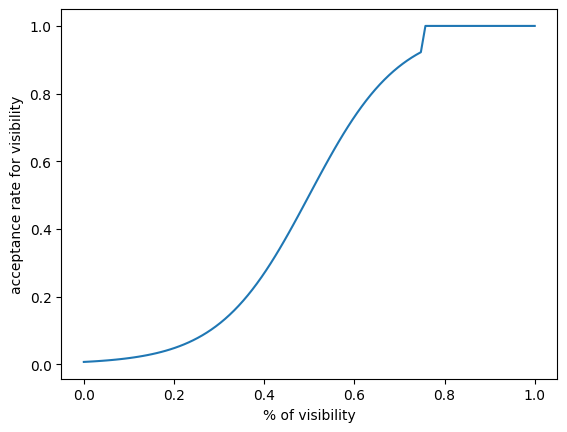

In [2]:
def mod_sigmoid(x):
    if x > 0.75:
        return 1
    else: 
        return 1 / (1 + np.exp(-(x-0.5)*10))
    
# plot mod_sigmoid
    
x = np.linspace(0, 1, 100)
y = [mod_sigmoid(i) for i in x]

plt.plot(x, y)
plt.ylabel('acceptance rate for visibility')
plt.xlabel('% of visibility')

Text(0.5, 0, '% of travel distance (reference: 50 m)')

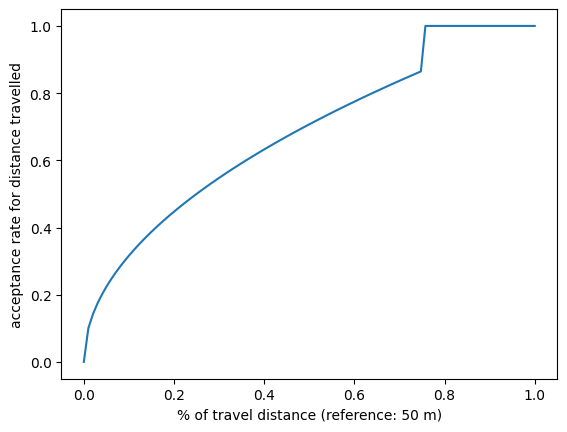

In [3]:
def mod_sqrt(x):
    if x > 0.75:
        return 1
    else: 
        return np.sqrt(x)
    
# plot mod_sigmoid
    
x = np.linspace(0, 1, 100)
y = [mod_sqrt(i) for i in x]

plt.plot(x, y)
plt.ylabel('acceptance rate for distance travelled')
plt.xlabel('% of travel distance (reference: 50 m)')

In [9]:
# load df from pickle

from bcnf.utils import get_dir
import pickle
import os

with open(os.path.join(get_dir('data', 'bcnf-data'), 'preliminary_data_4s.pkl'), 'rb') as f:
    data = pickle.load(f)

# print length of data
print(len(data['x0_x']))

2000


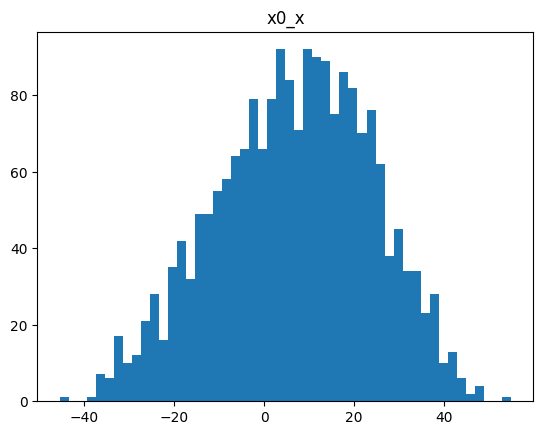

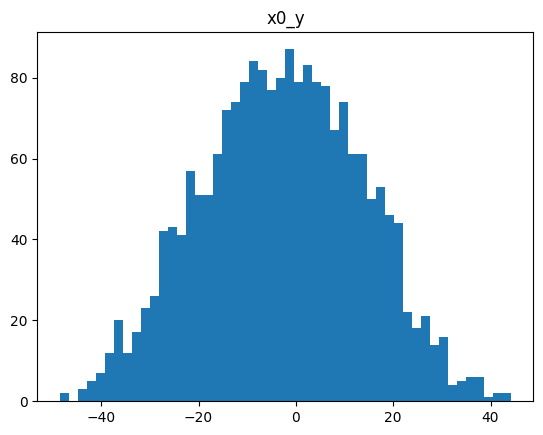

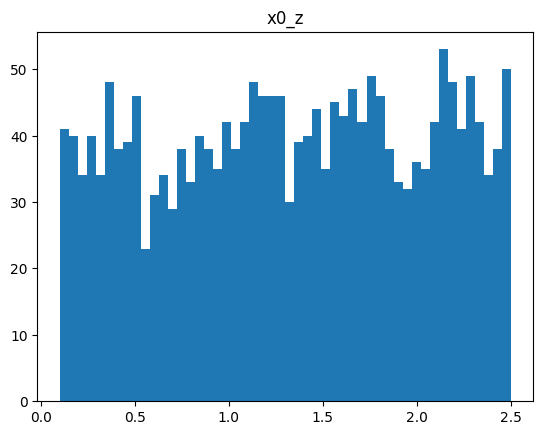

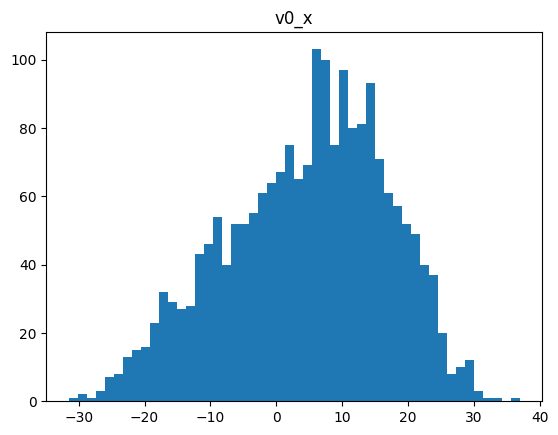

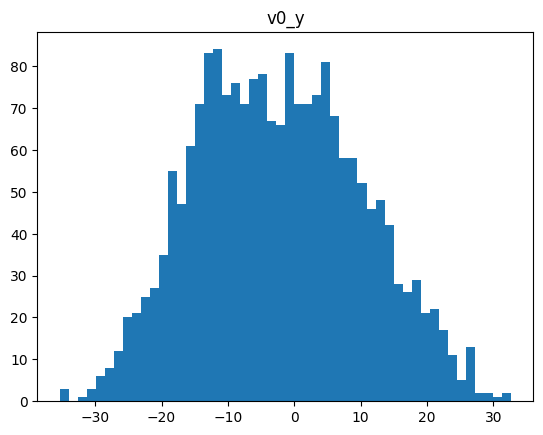

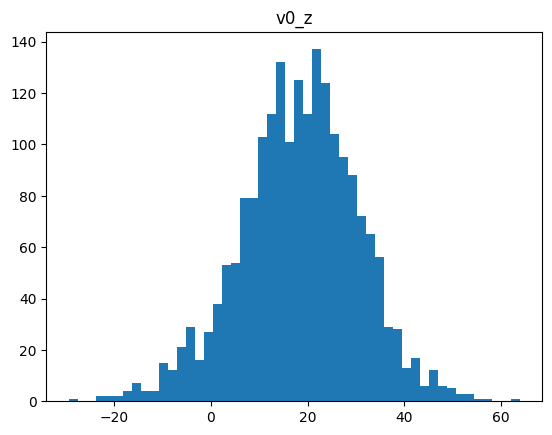

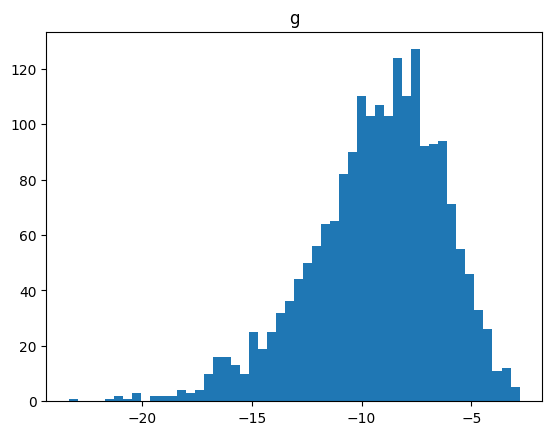

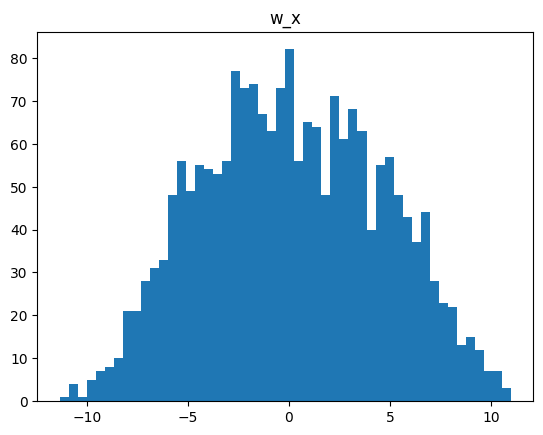

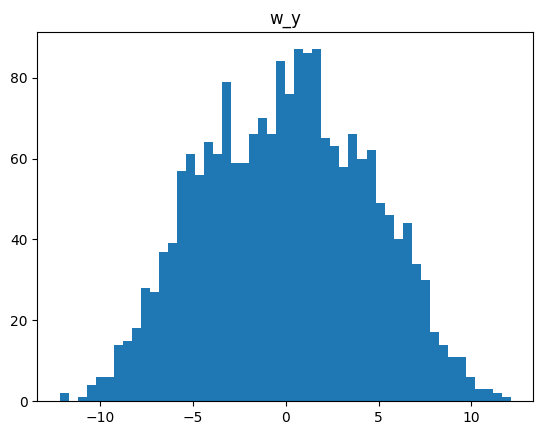

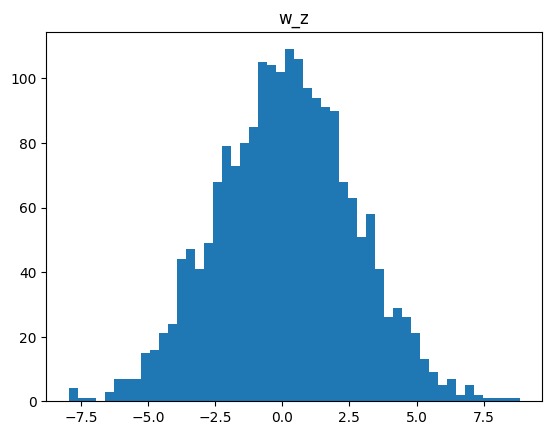

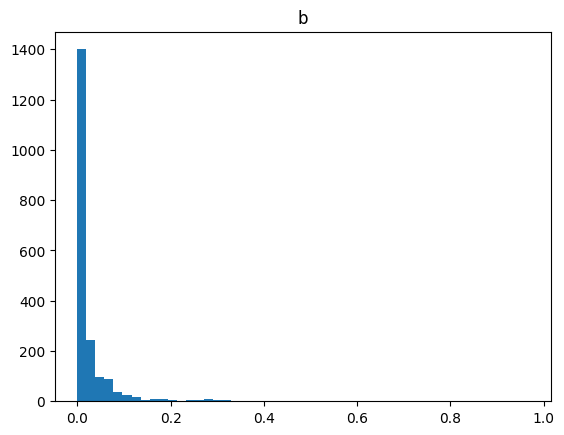

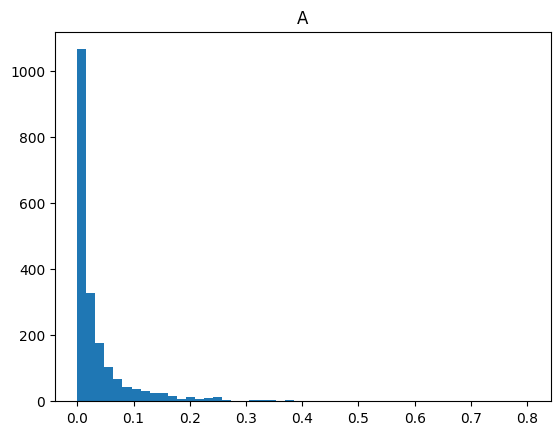

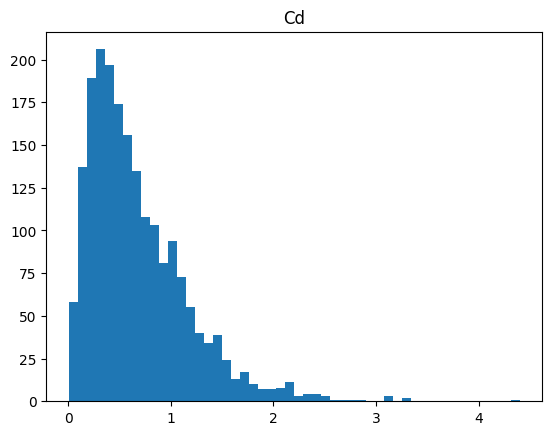

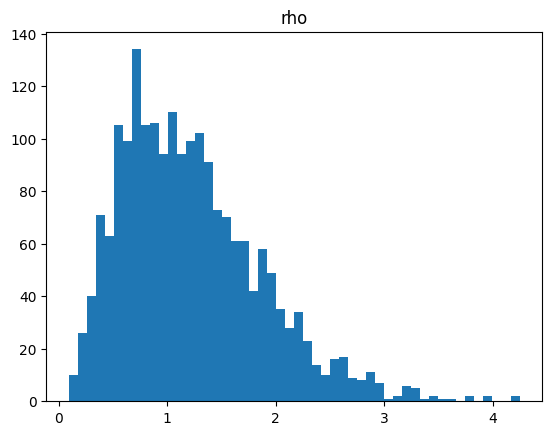

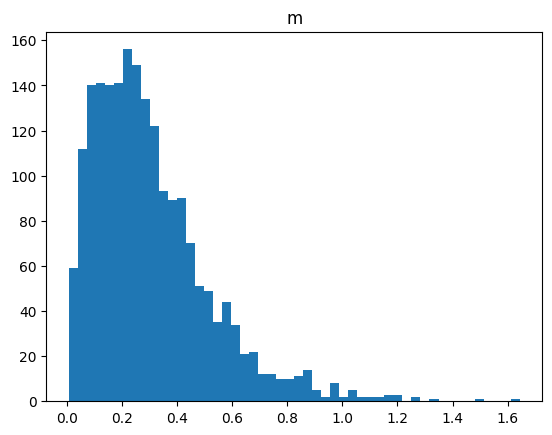

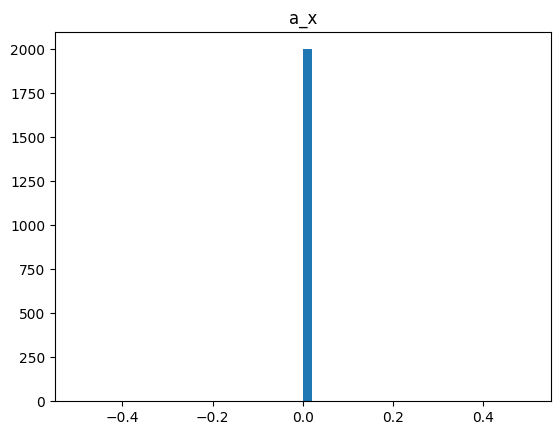

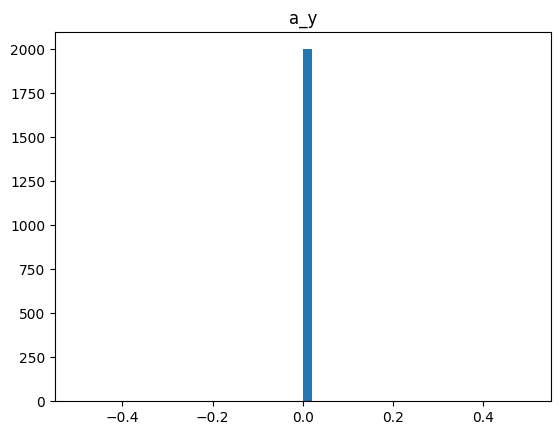

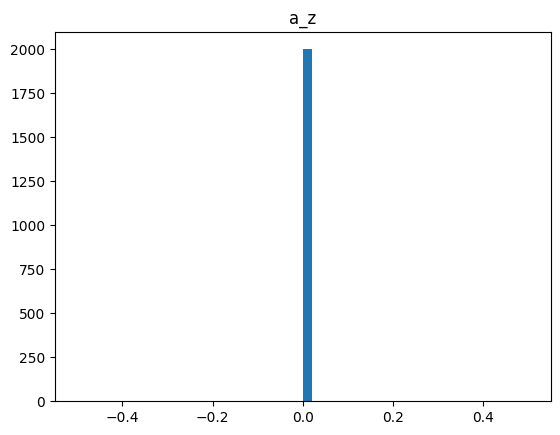

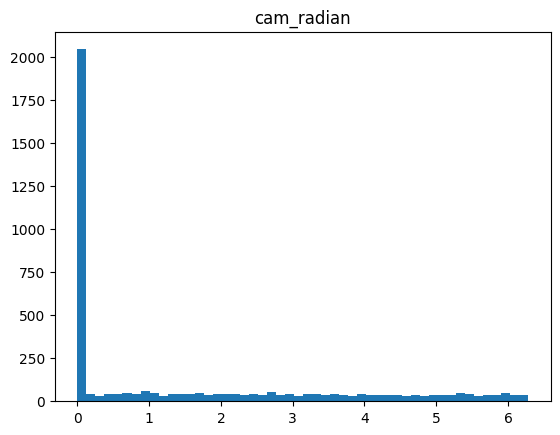

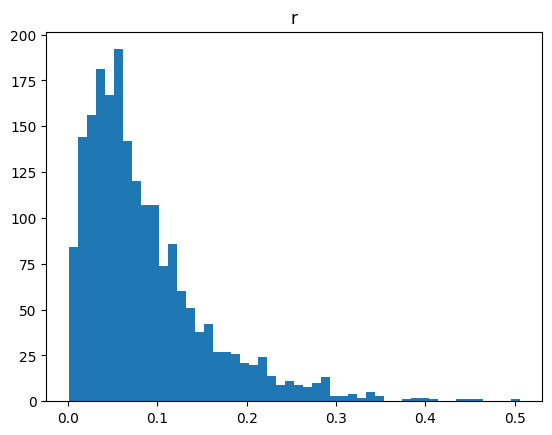

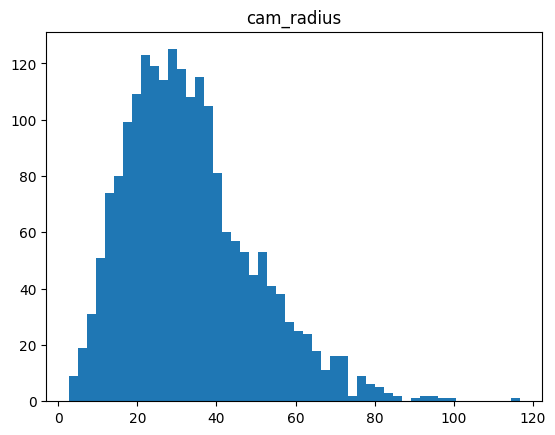

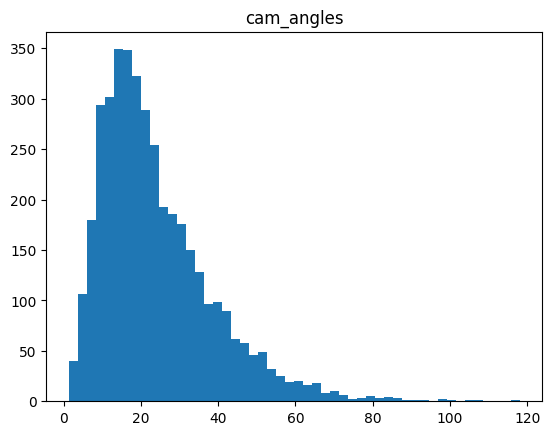

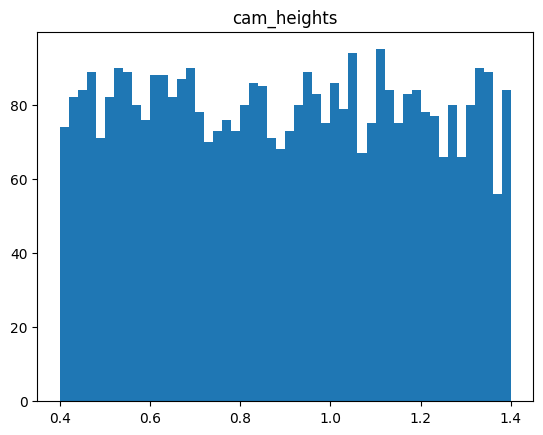

In [10]:
# plot histogram of each variable 
for key in data.keys():
    if (key == 'cams') or (key == 'traj'):
        continue

    if (key != 'cam_radian') and (key != 'cam_angles') and (key != 'cam_heights'):
        plt.hist(data[key], bins=50)
        plt.title(key)
        plt.show()
    else:
        concatenated = np.concatenate(data[key])
        plt.hist(concatenated, bins=50)
        plt.title(key)
        plt.show()

In [4]:
from bcnf.utils import get_dir
import pickle
import os

from bcnf.plots.data.data_to_df import data_to_df

df = data_to_df('preliminary_data_4s')

#plt.matshow(df.corr(method=cov_coeff))
#plt.xticks(range(df.shape[1]), df.columns, rotation=90)
#plt.yticks(range(df.shape[1]), df.columns)
#plt.colorbar()
#plt.show()

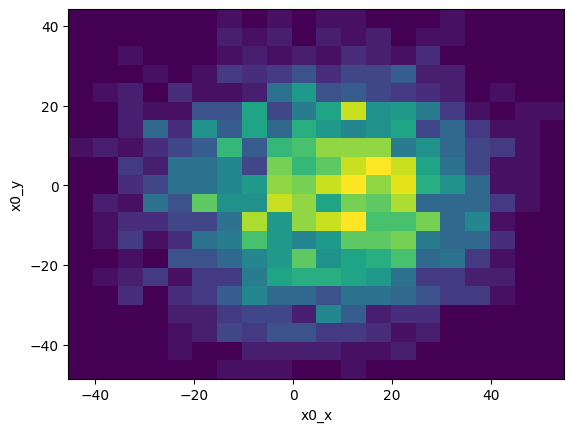

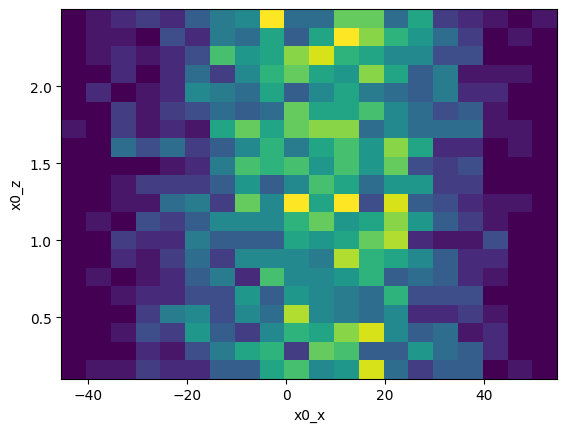

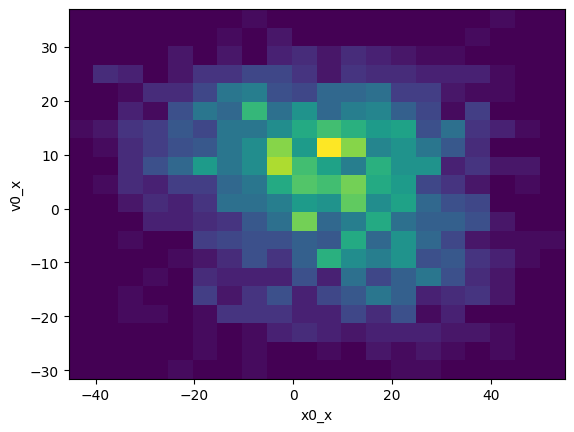

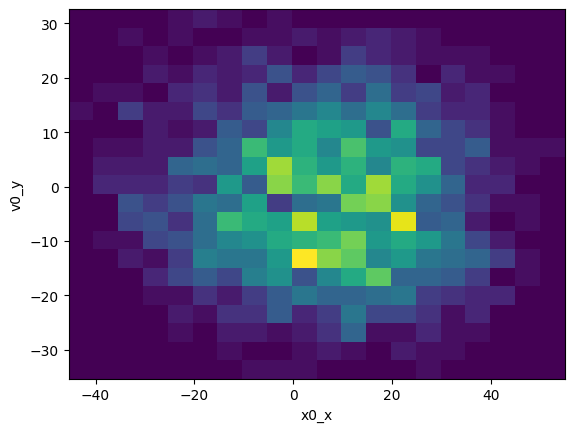

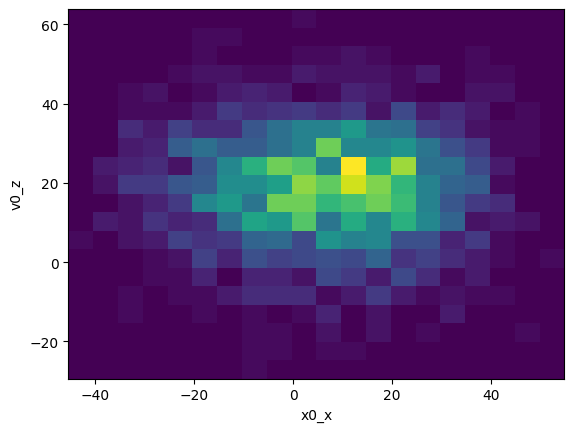

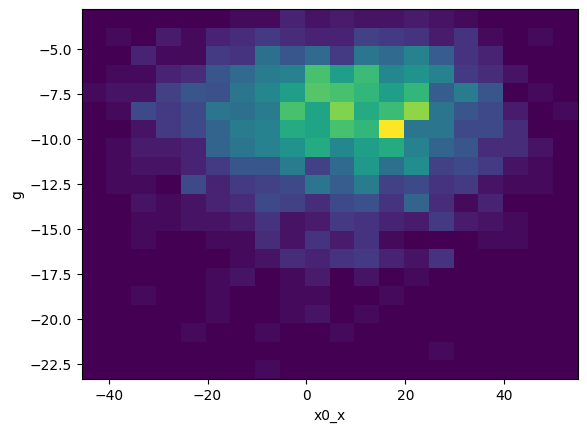

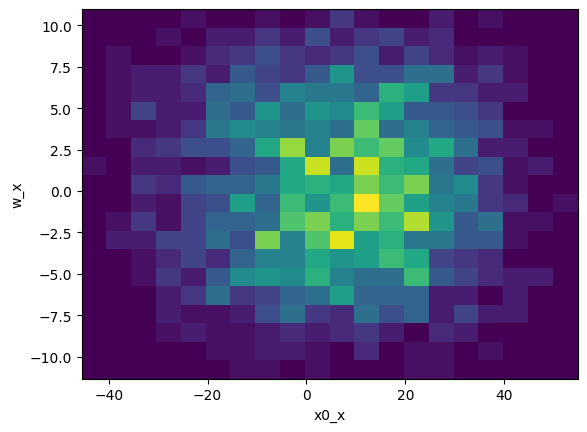

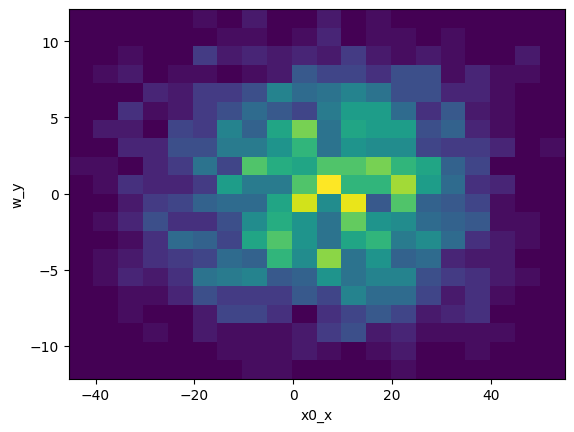

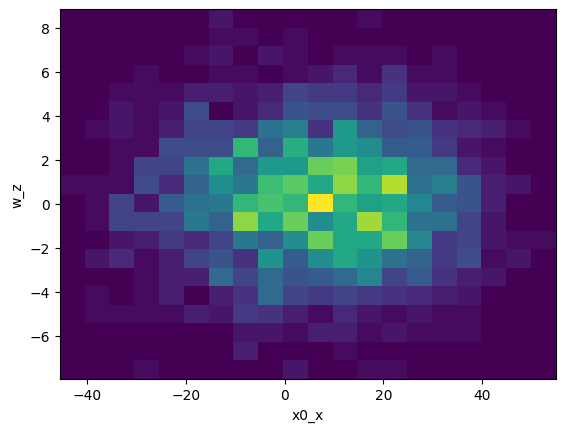

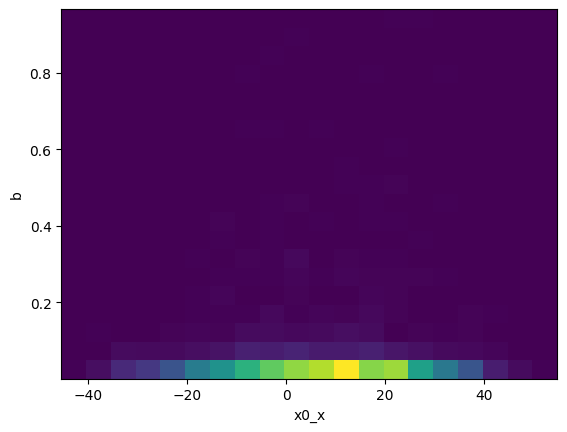

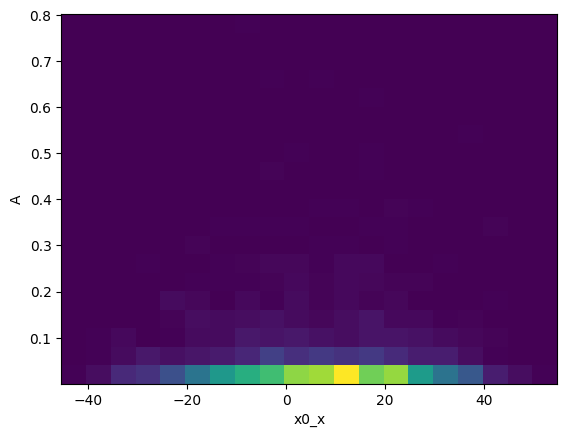

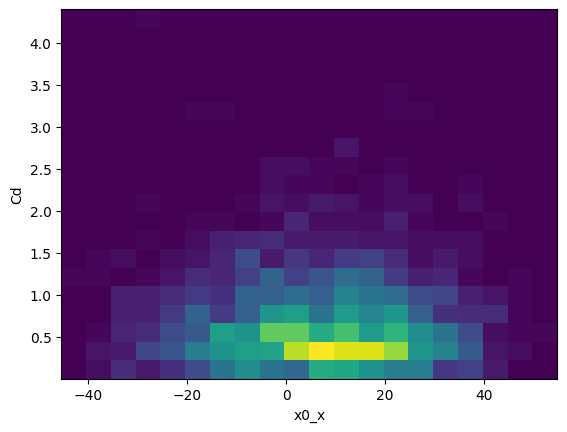

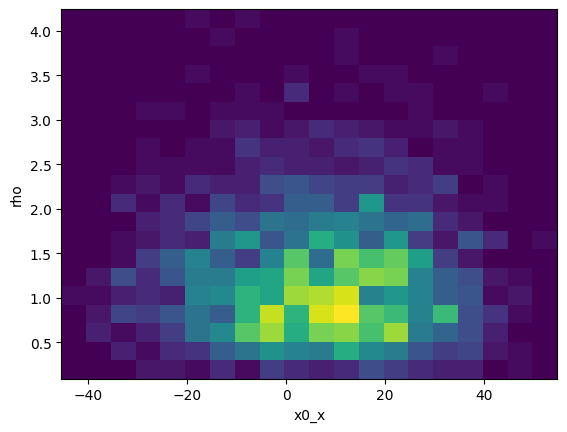

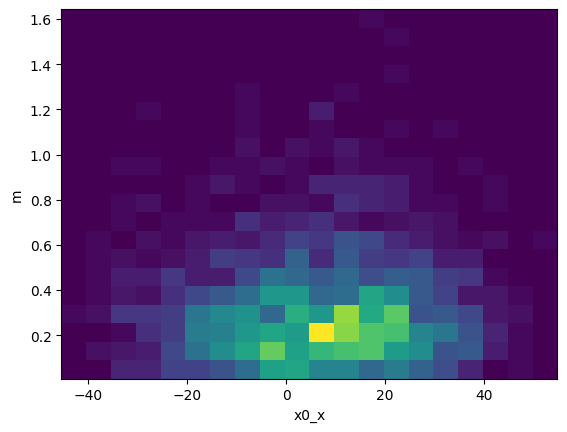

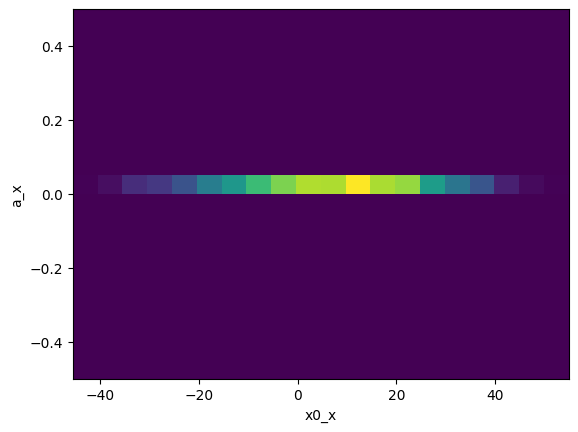

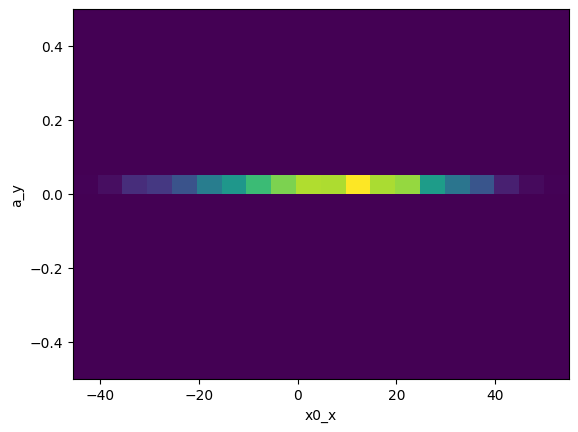

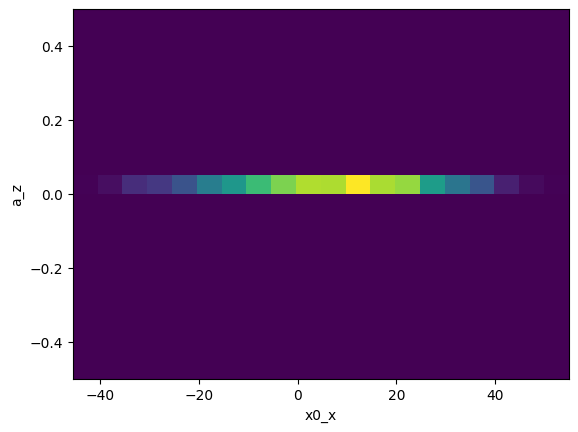

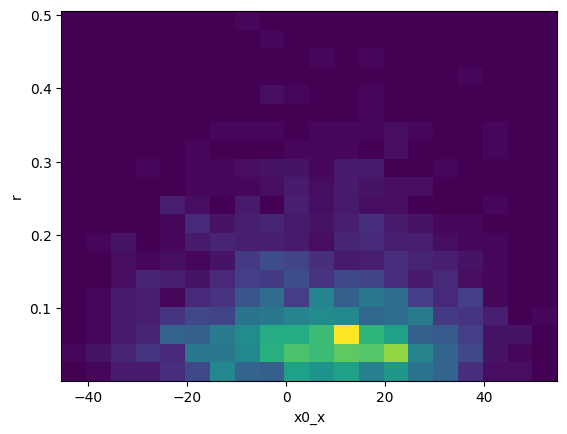

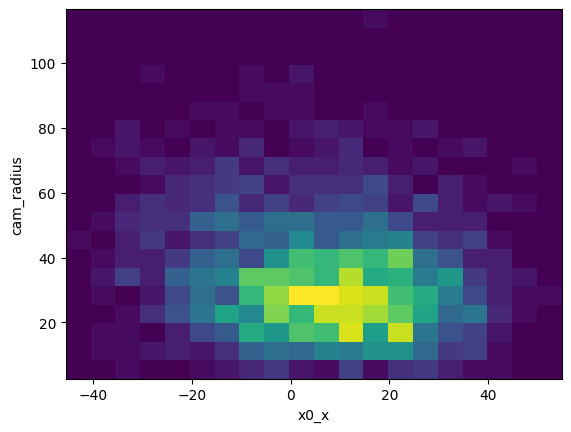

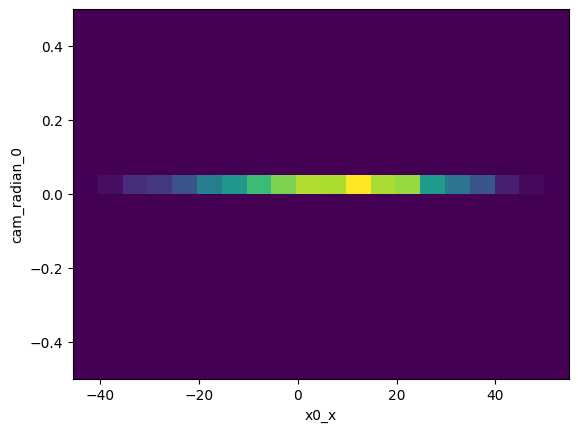

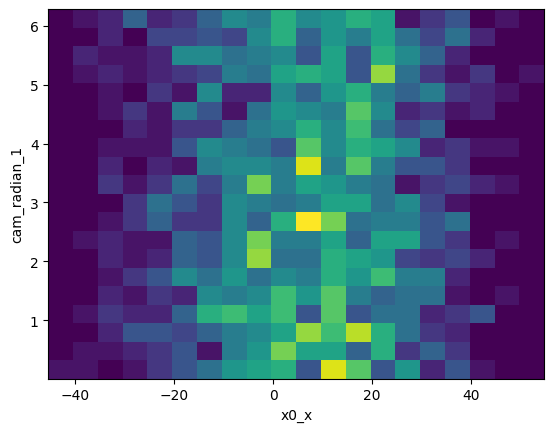

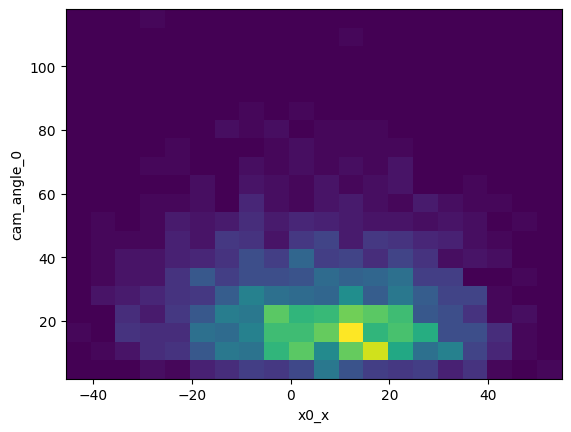

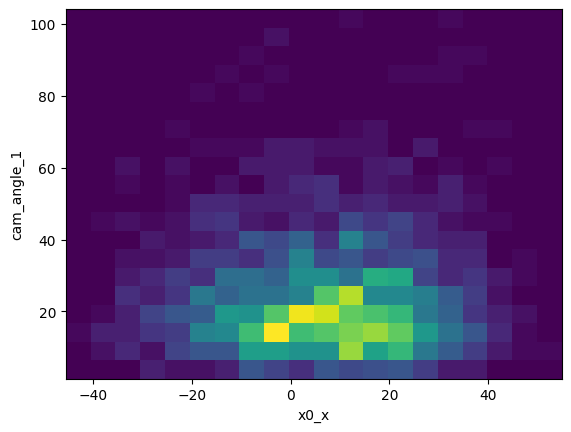

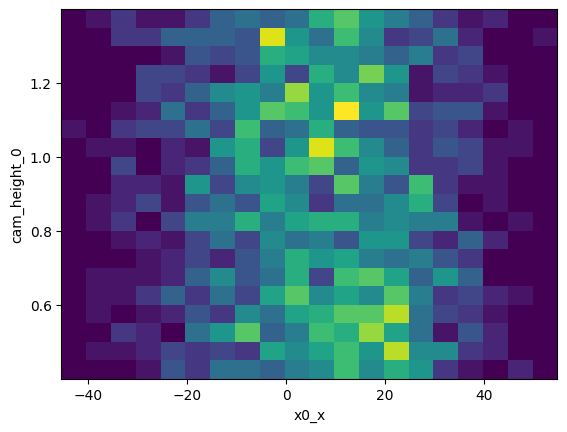

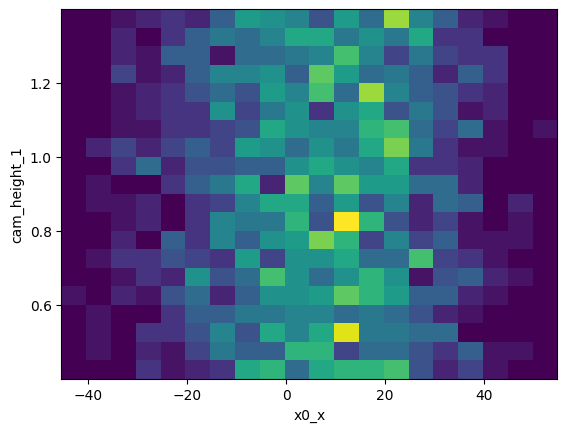

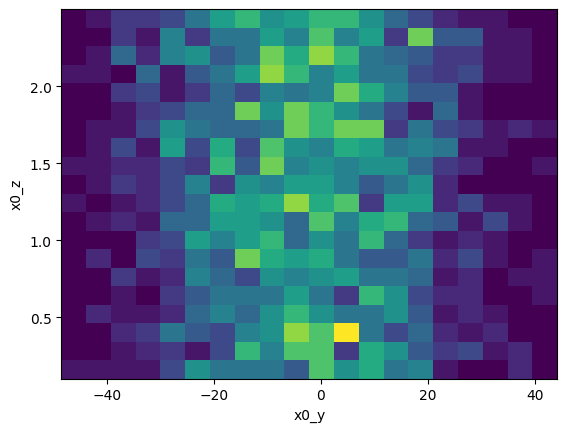

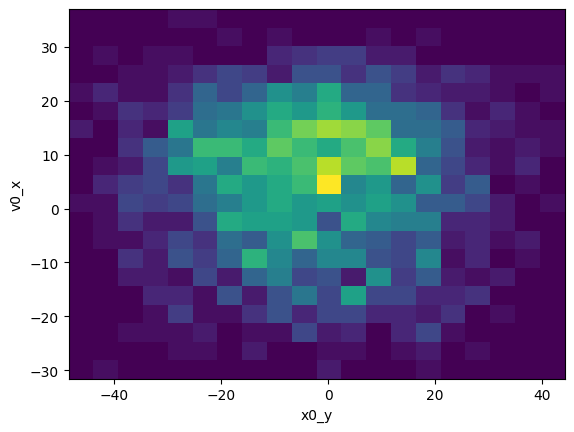

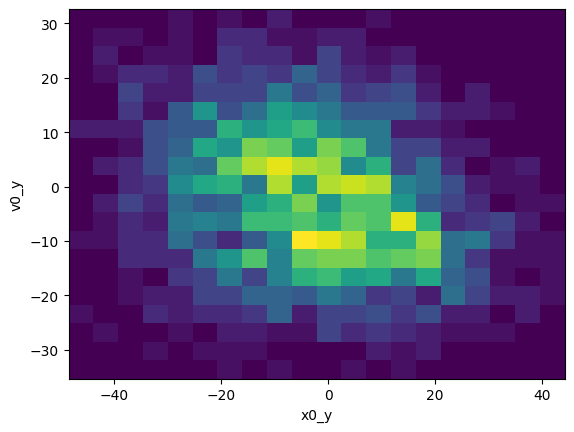

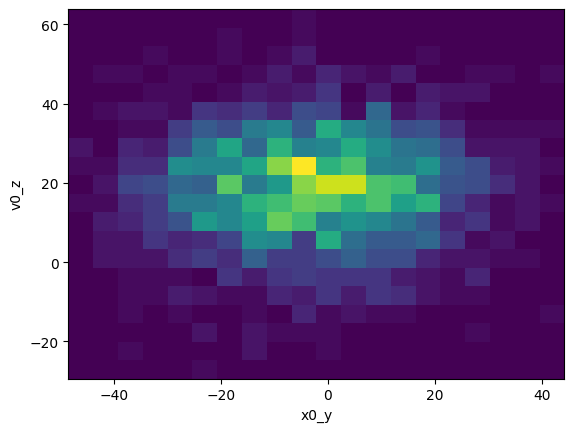

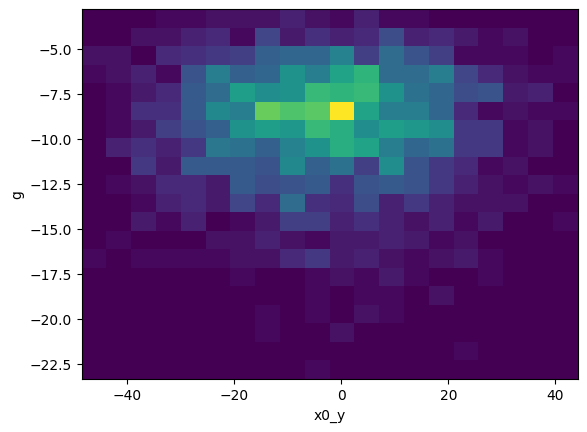

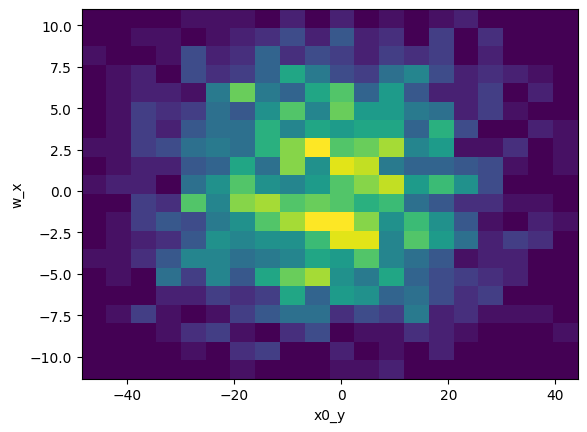

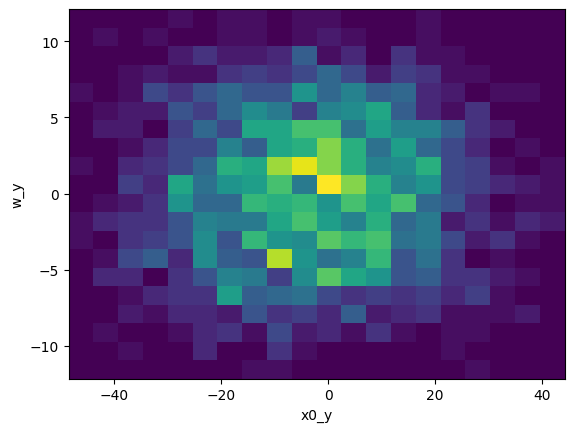

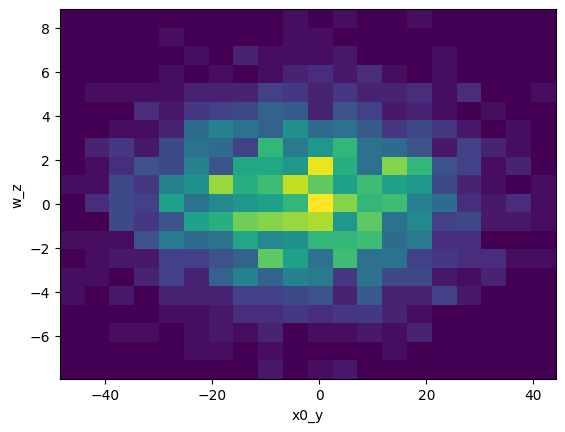

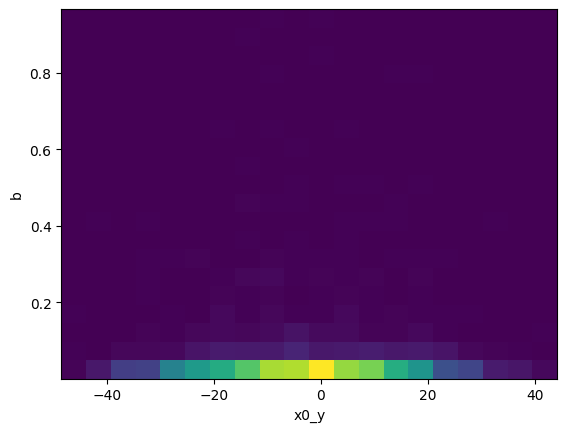

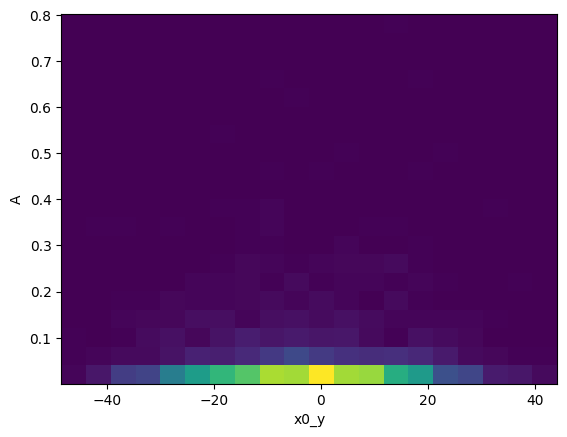

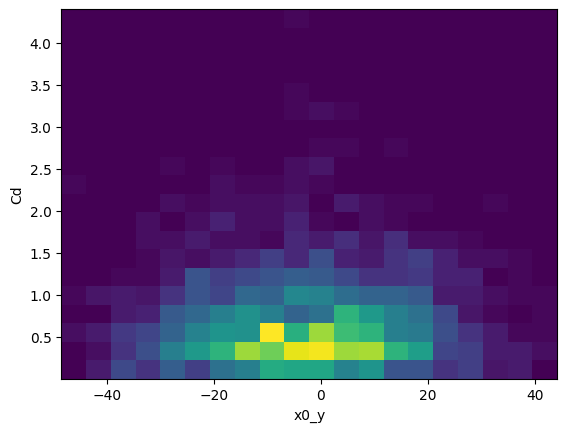

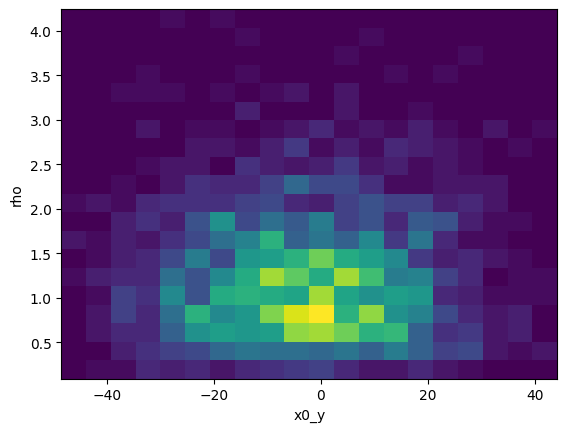

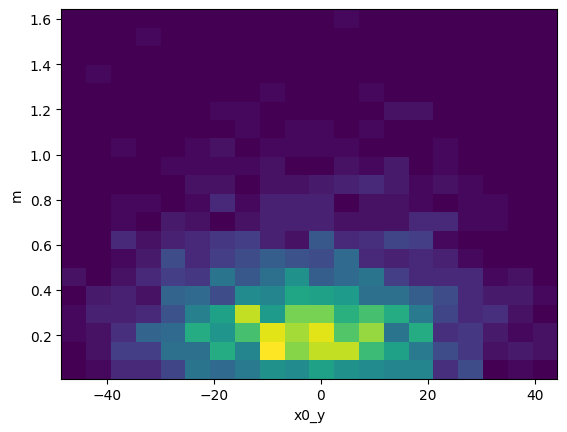

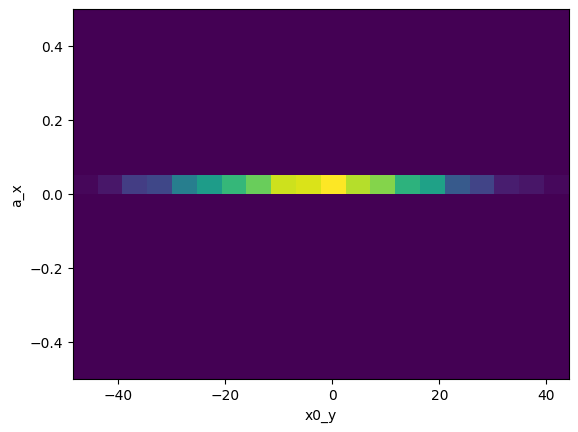

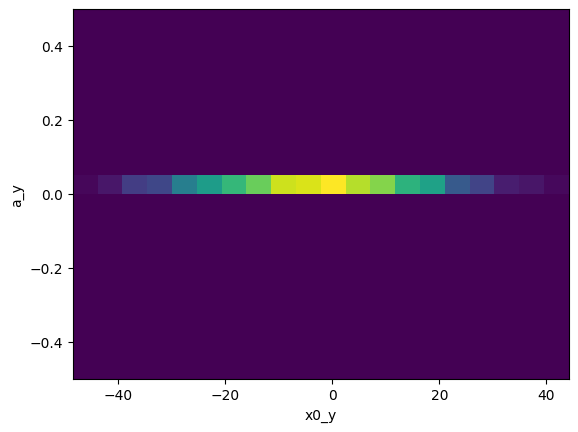

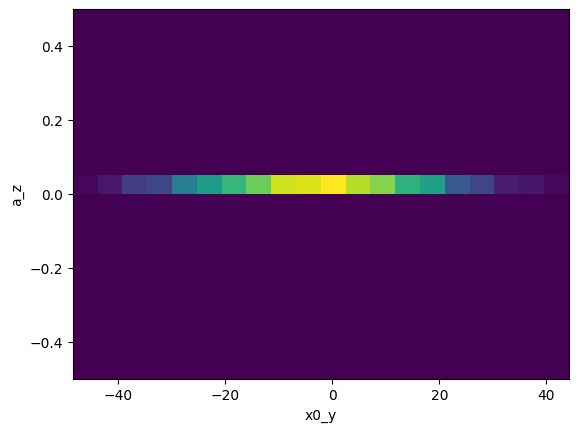

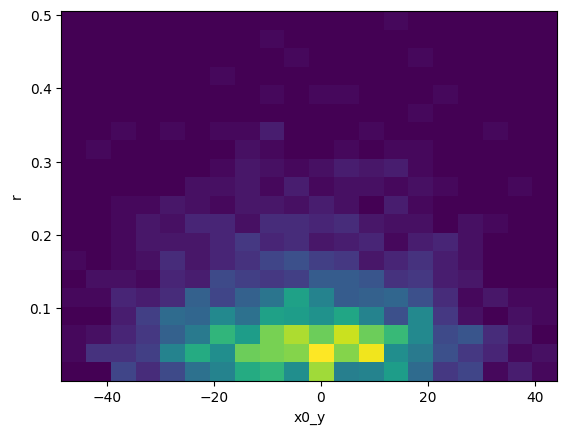

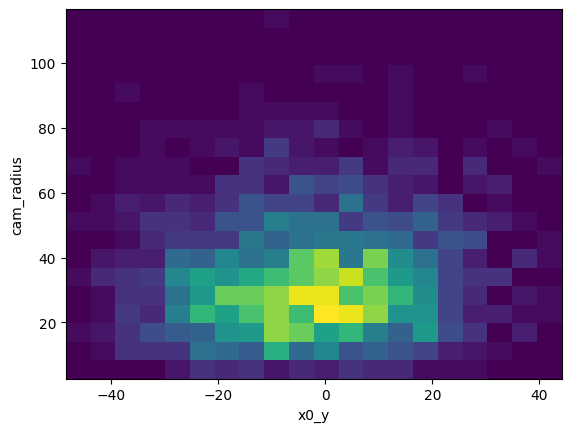

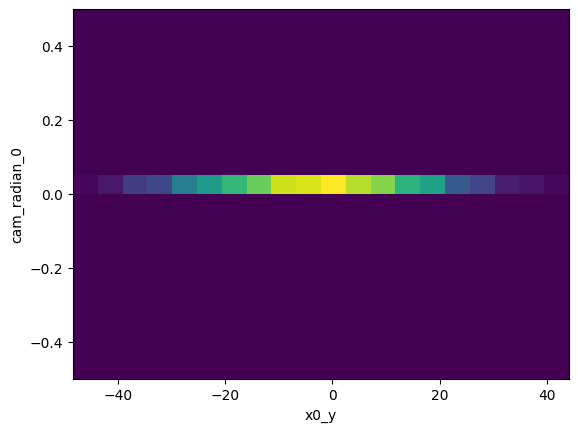

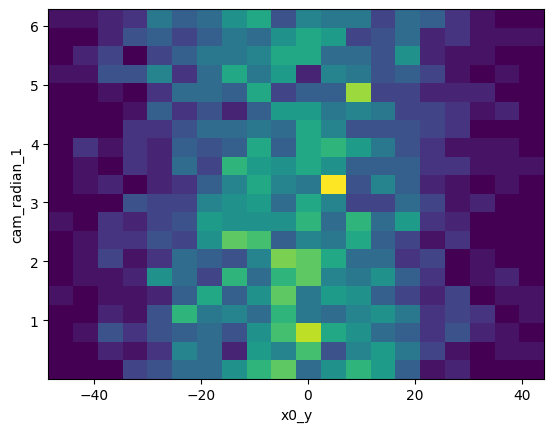

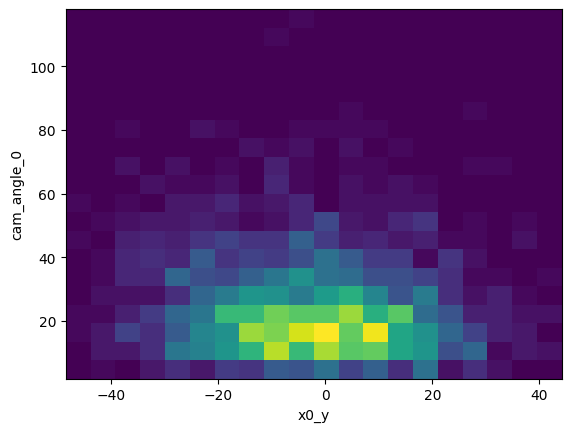

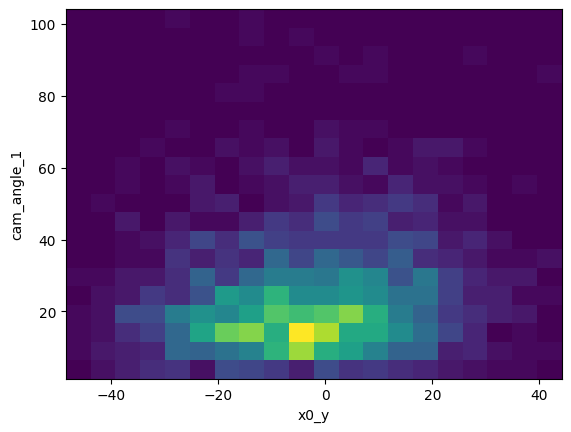

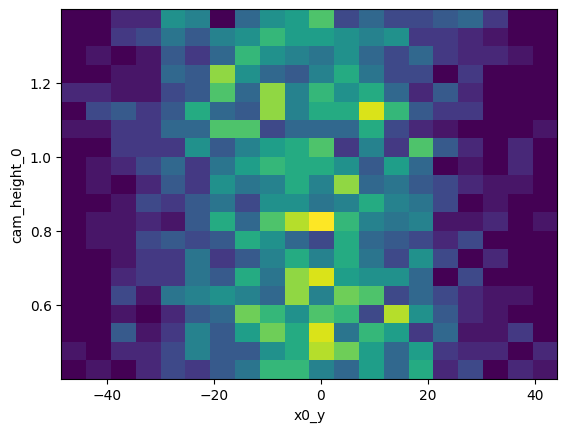

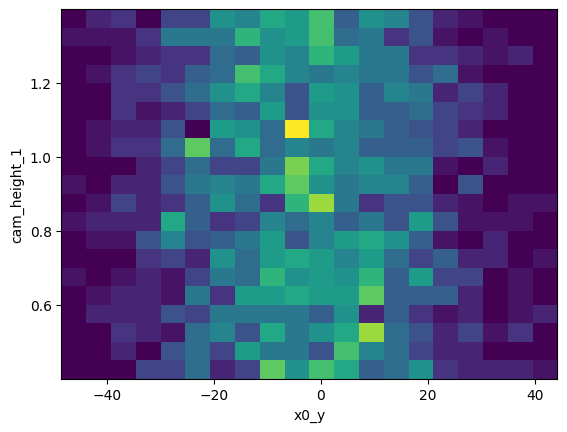

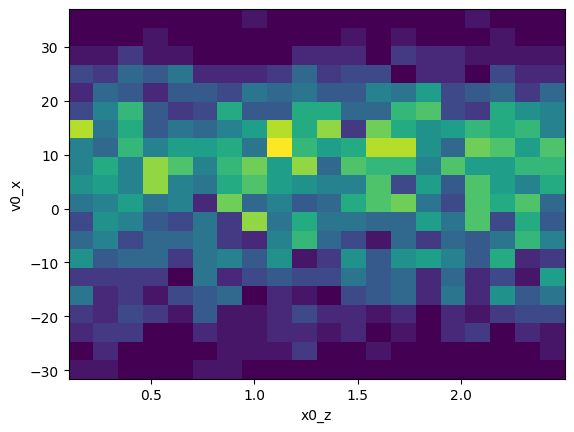

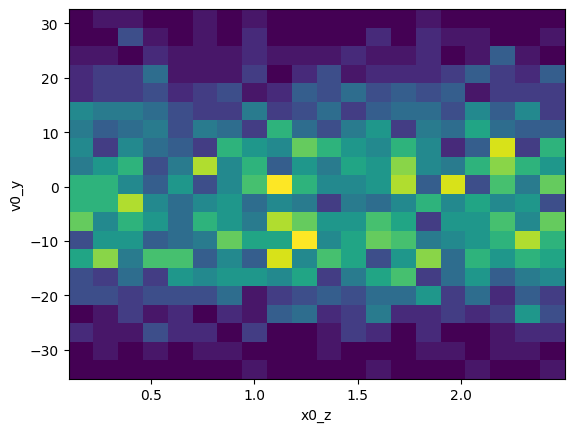

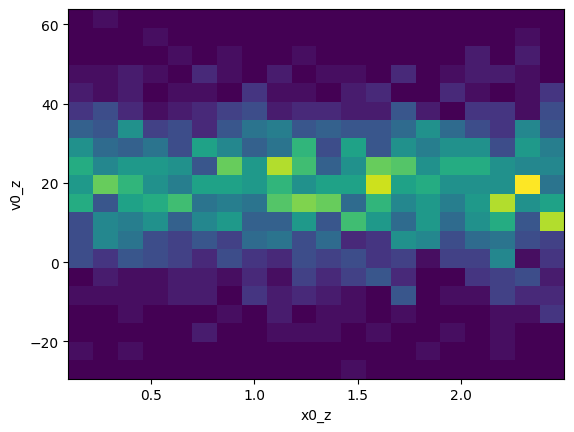

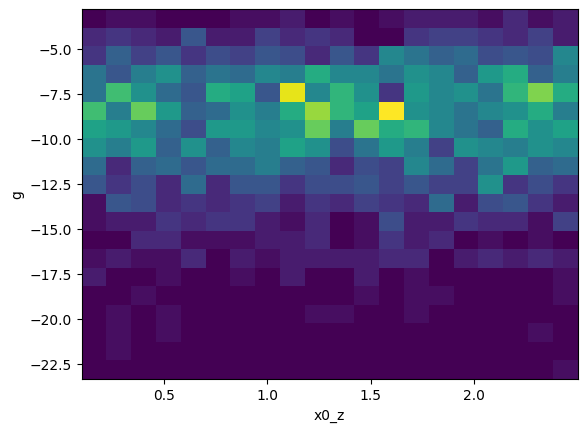

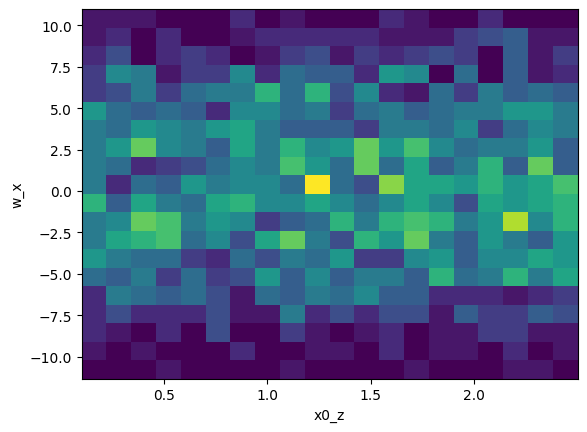

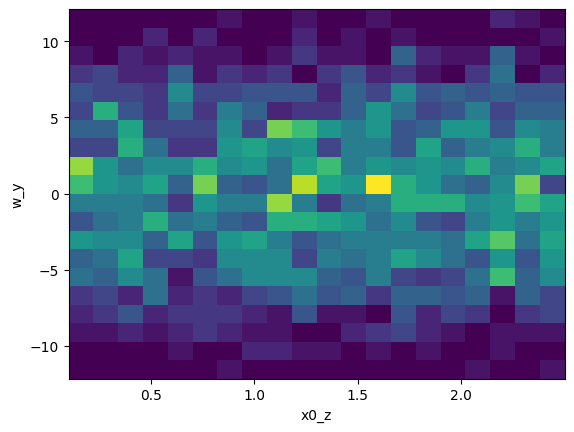

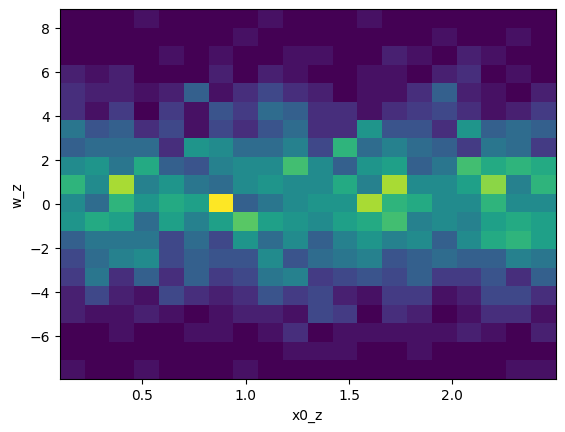

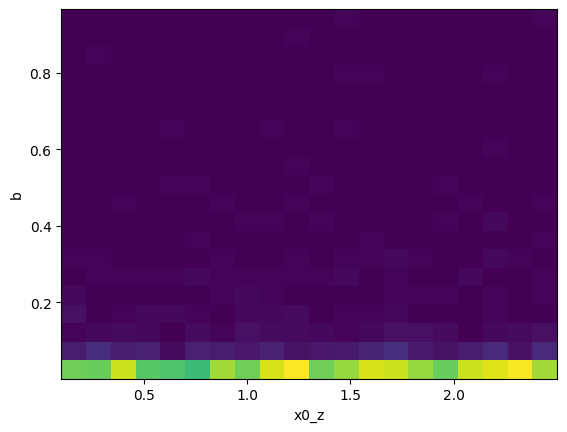

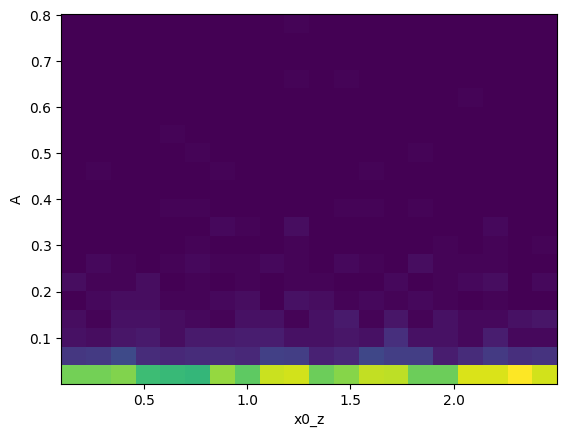

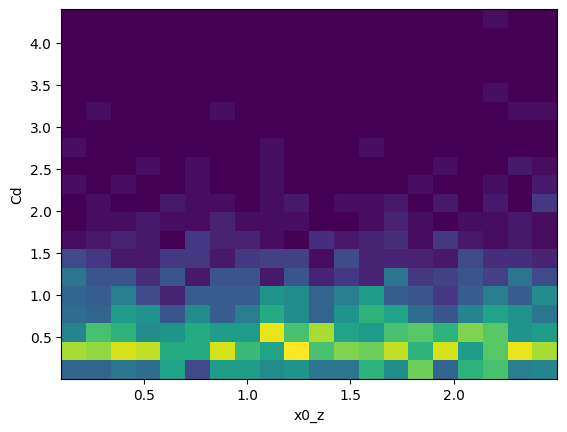

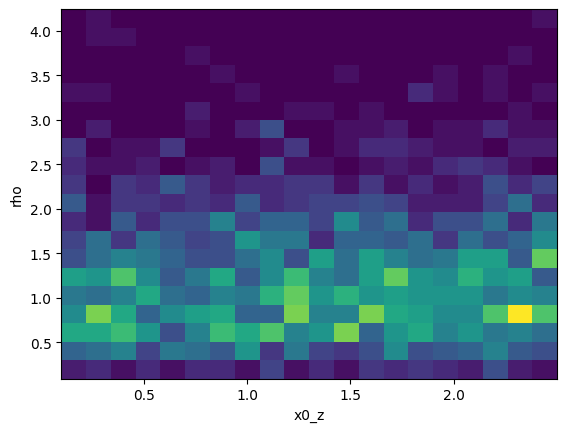

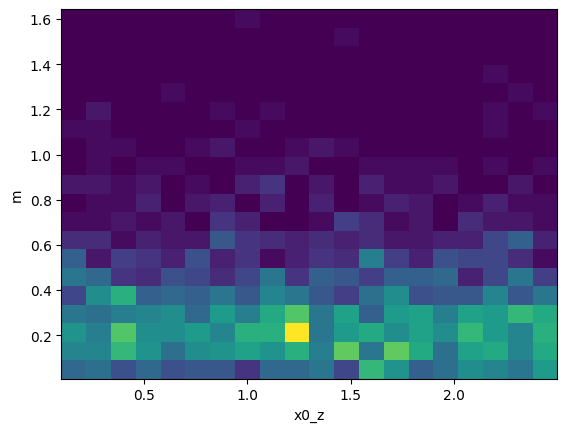

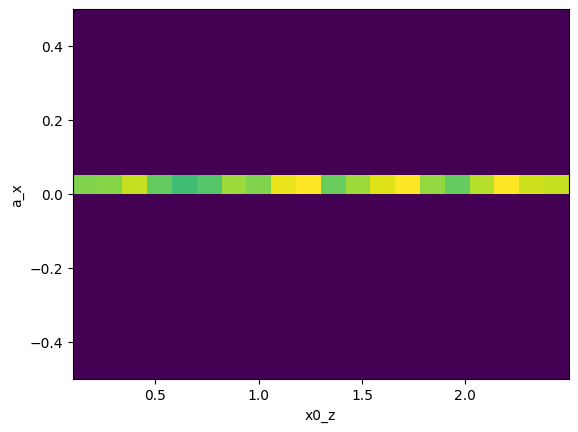

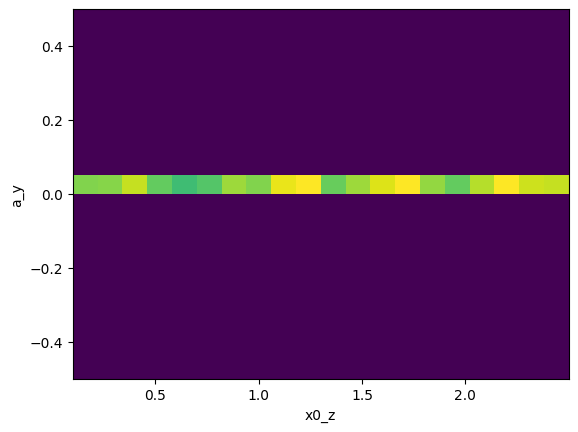

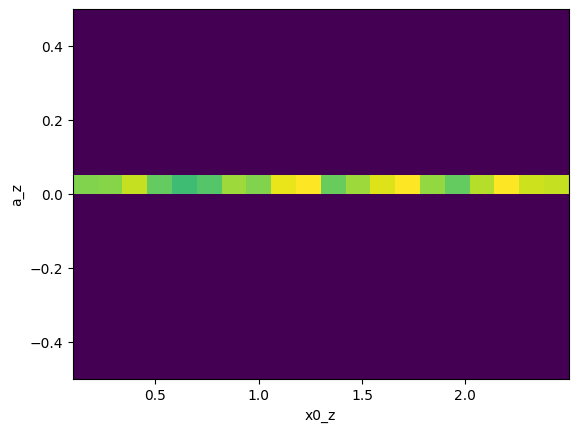

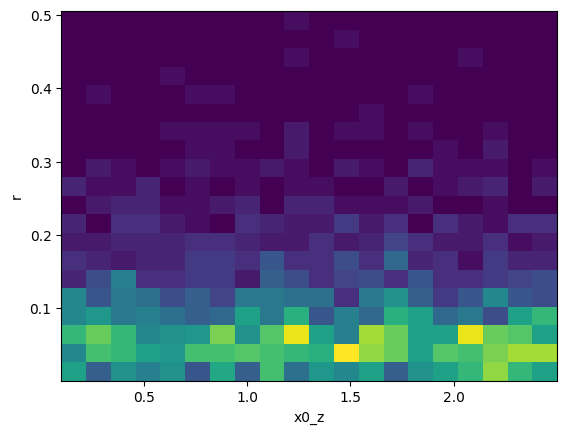

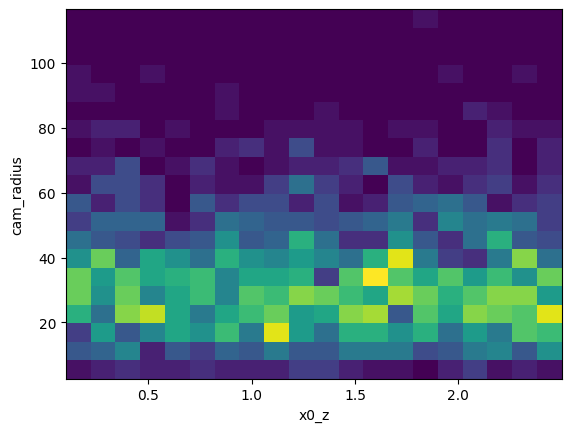

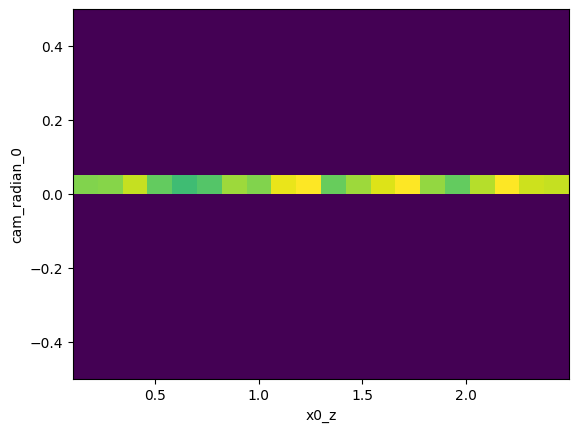

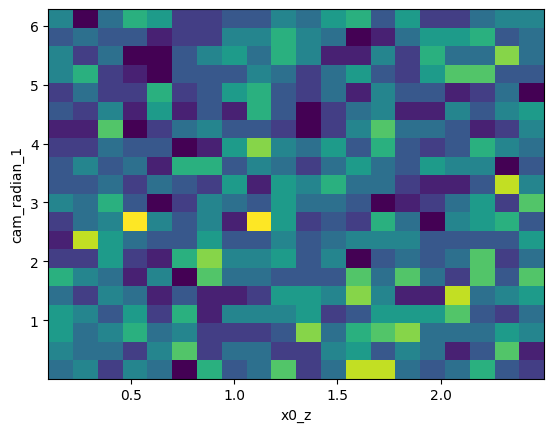

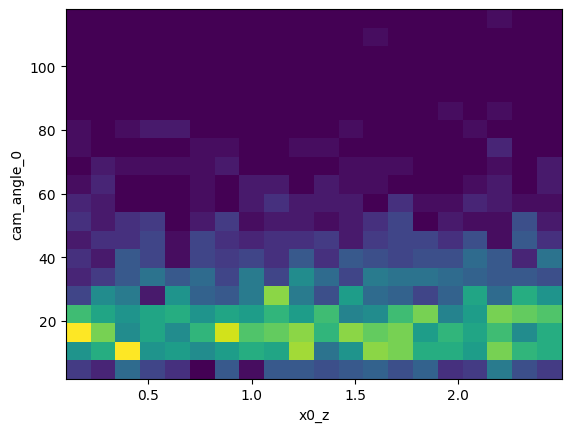

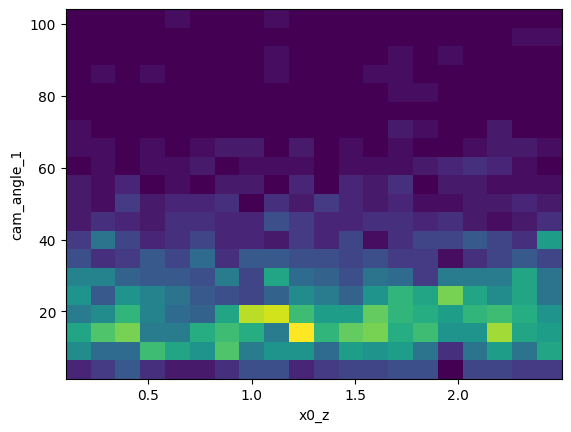

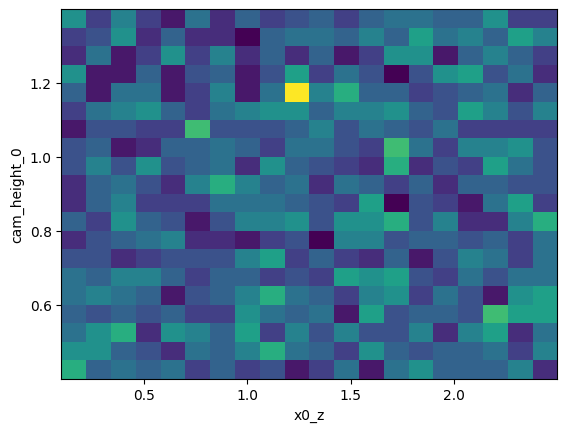

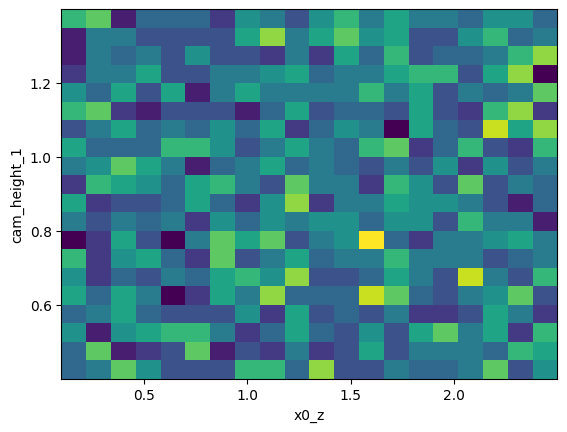

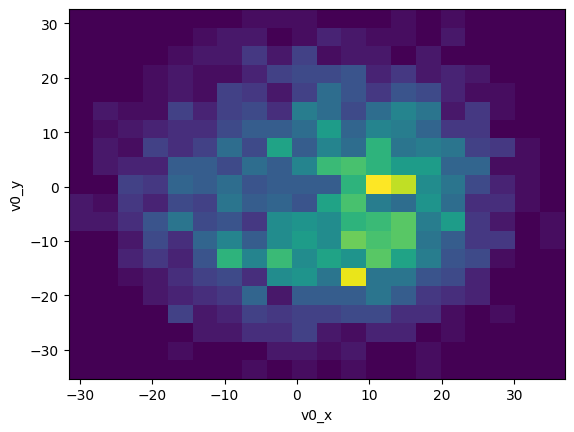

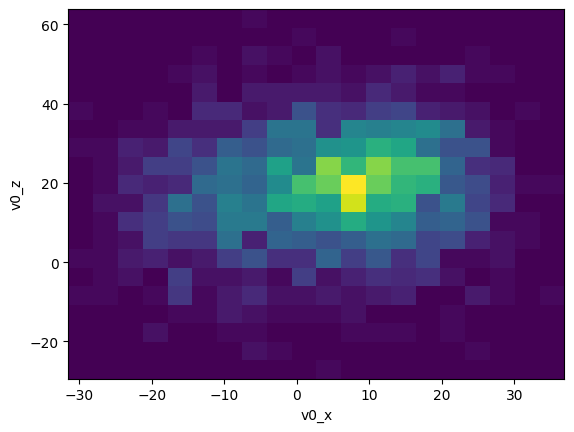

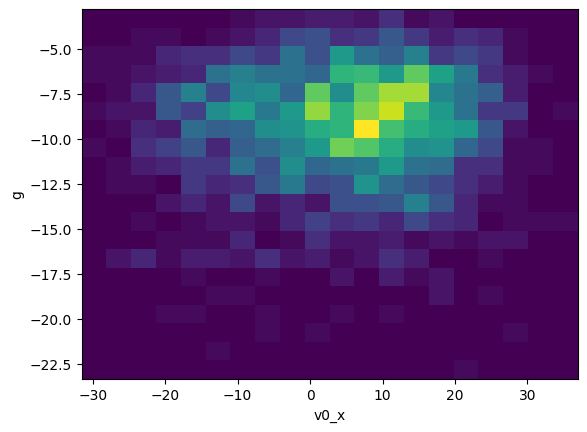

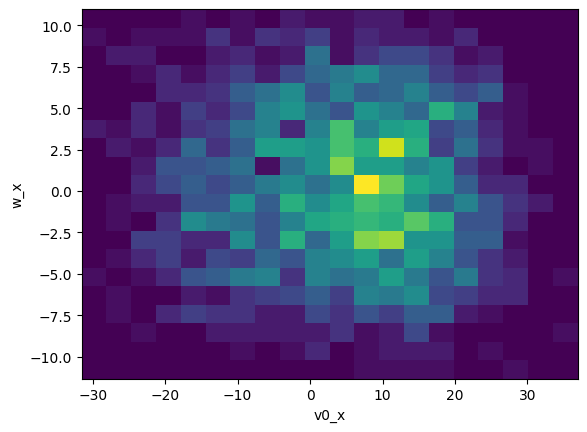

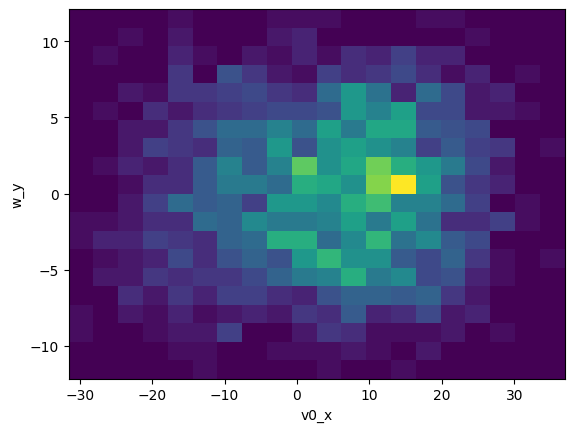

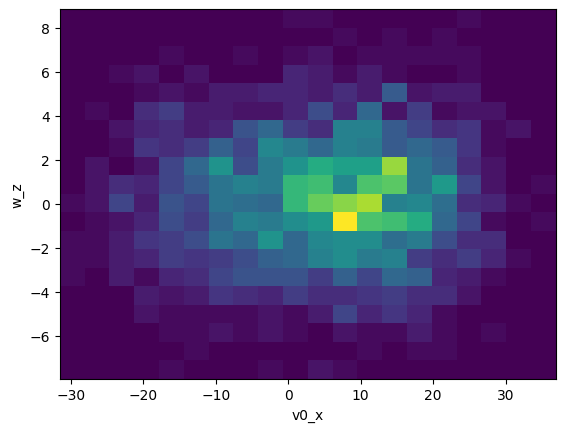

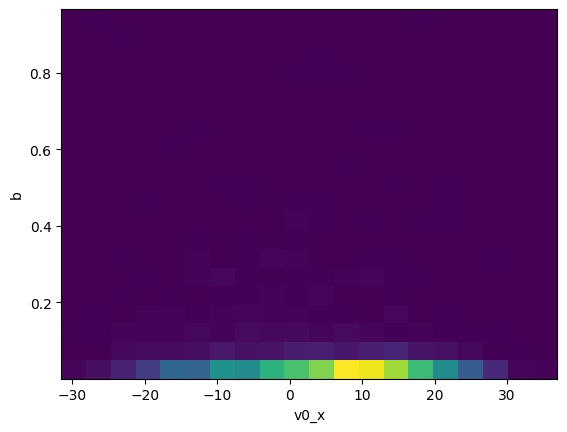

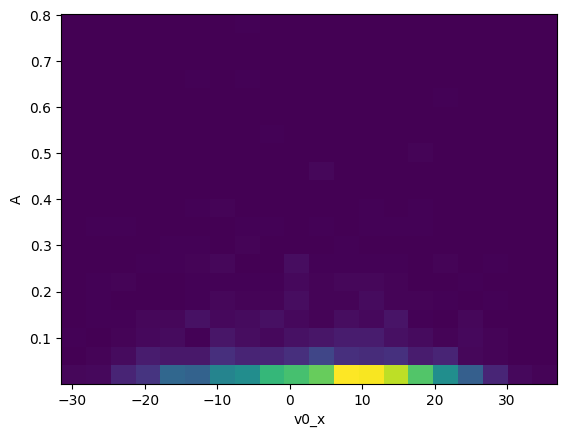

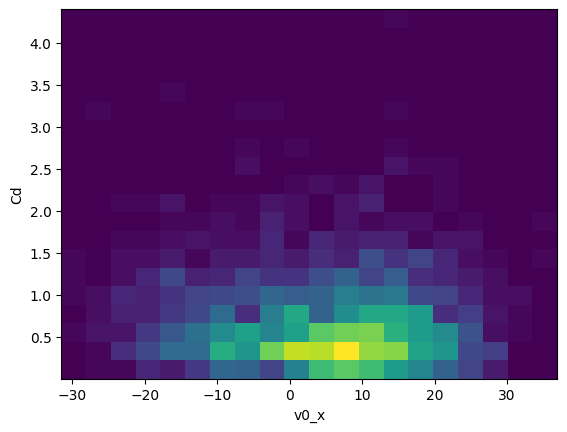

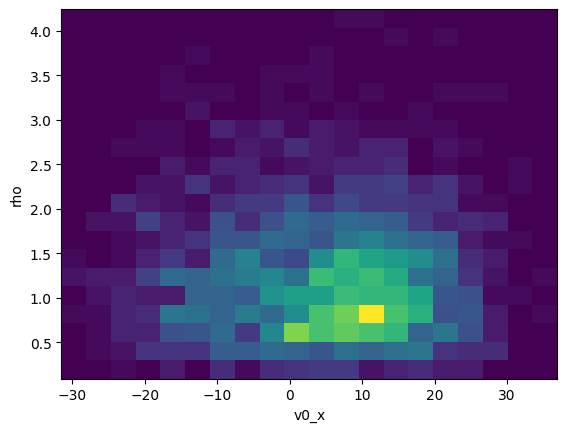

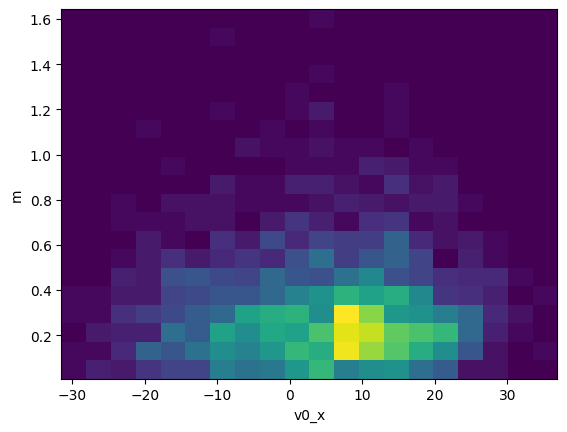

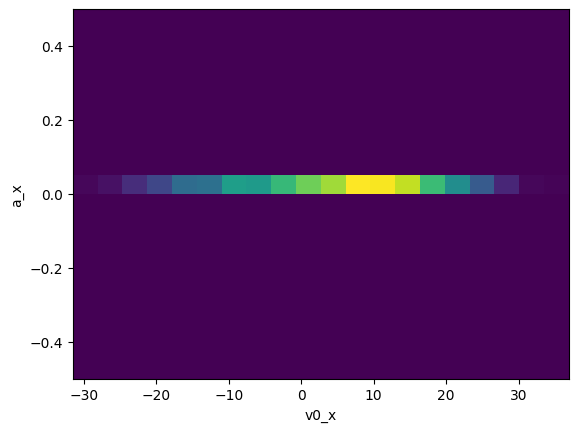

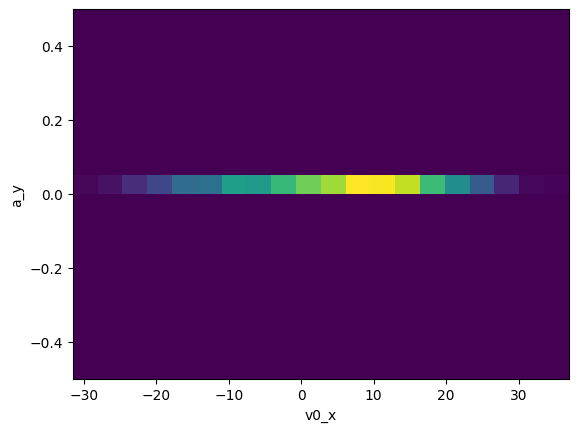

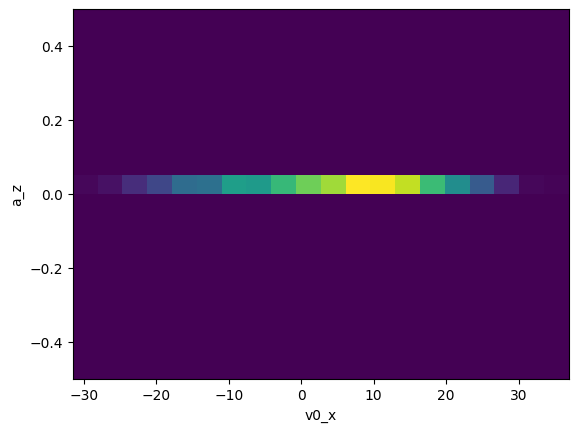

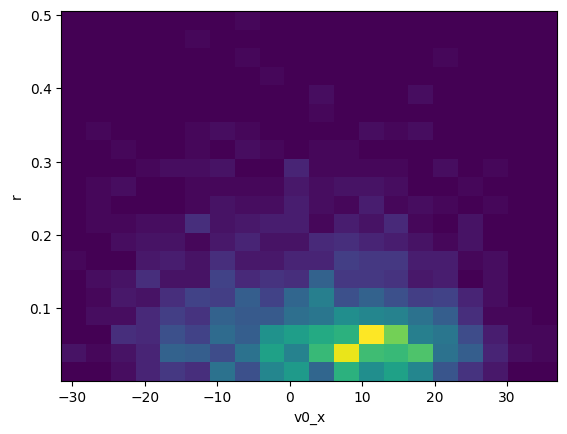

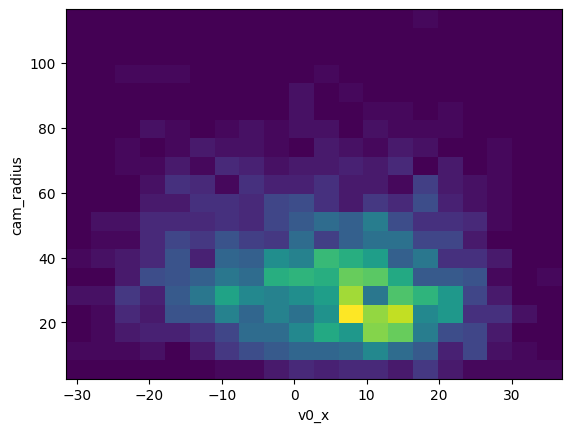

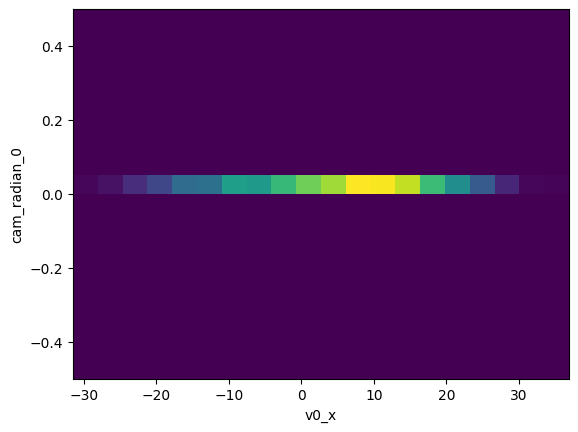

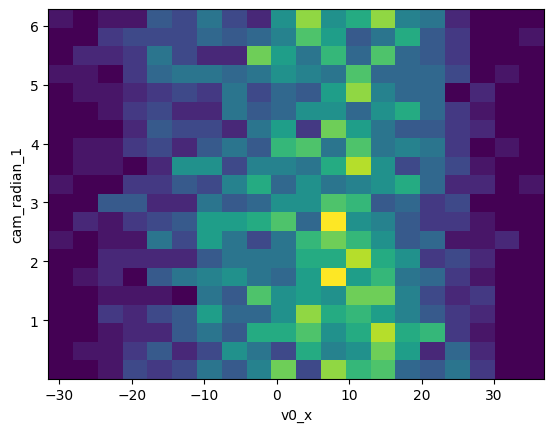

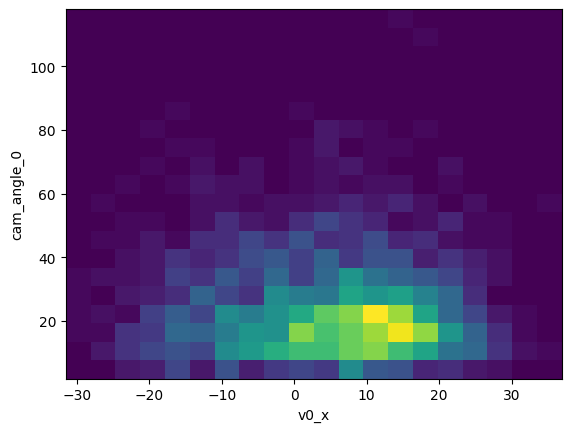

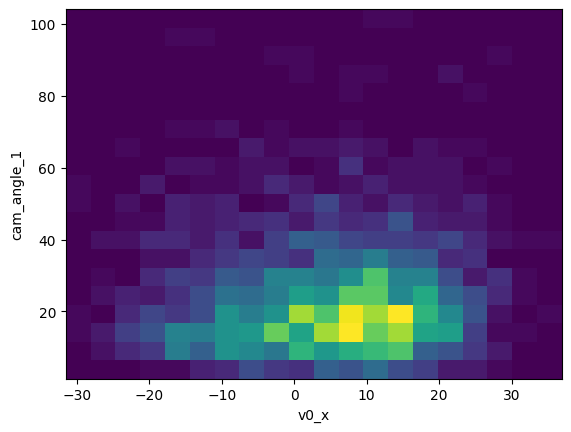

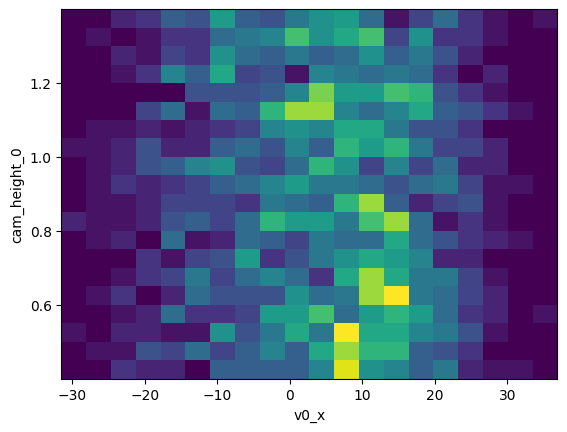

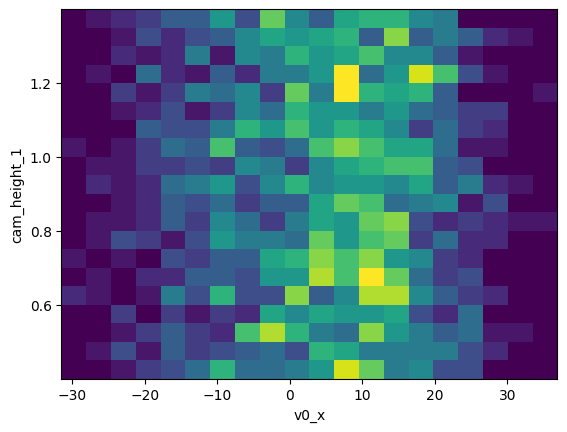

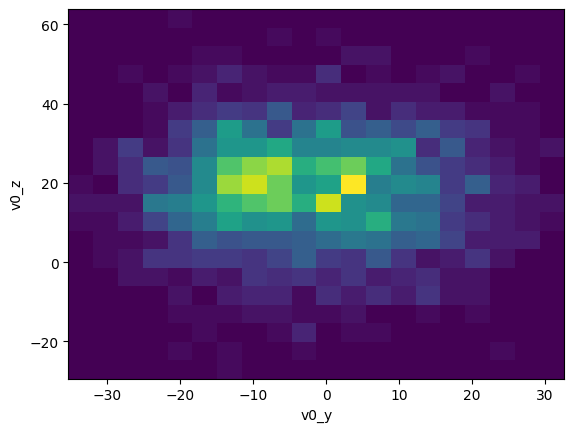

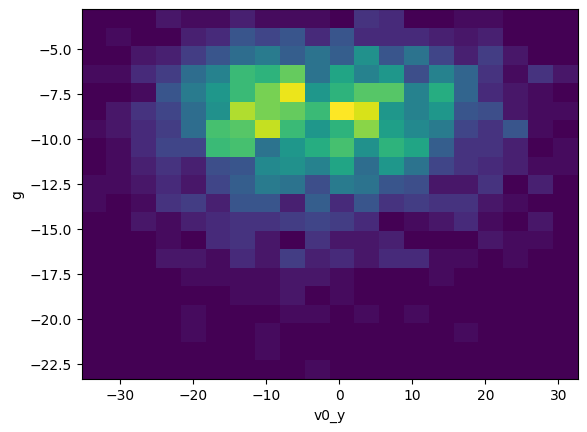

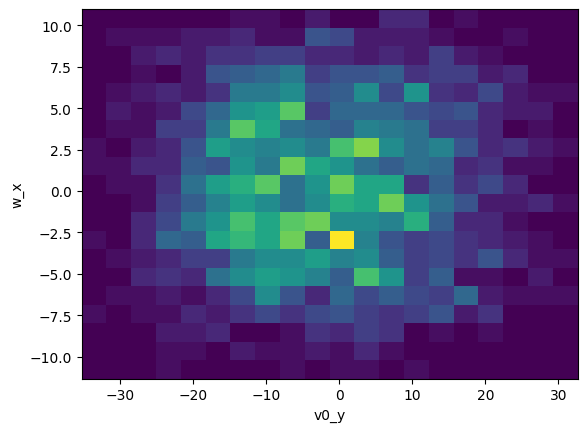

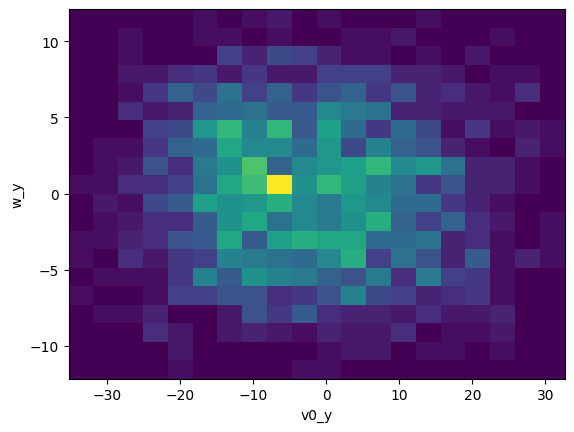

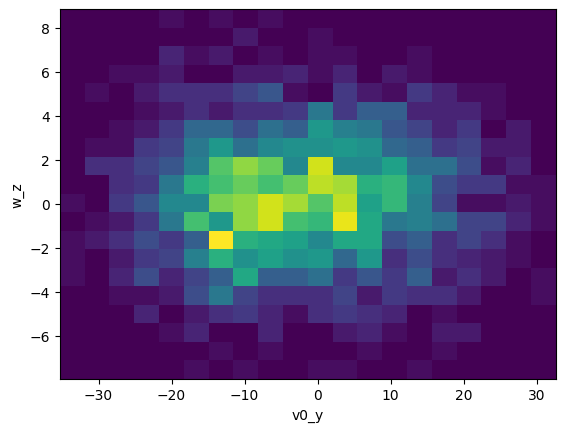

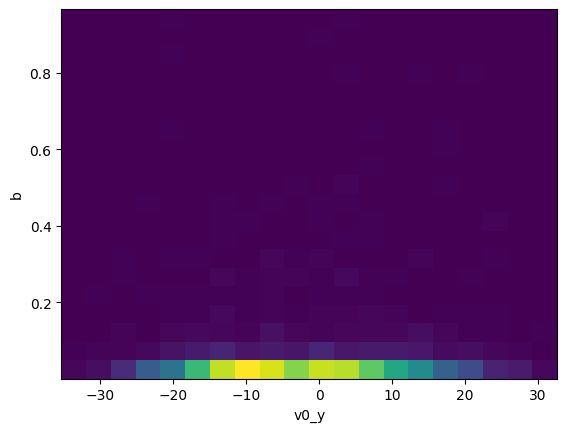

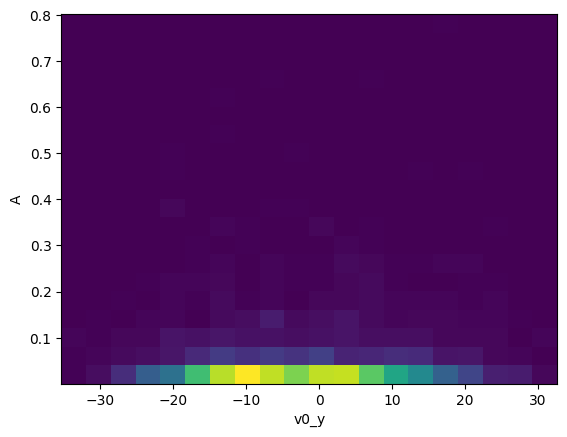

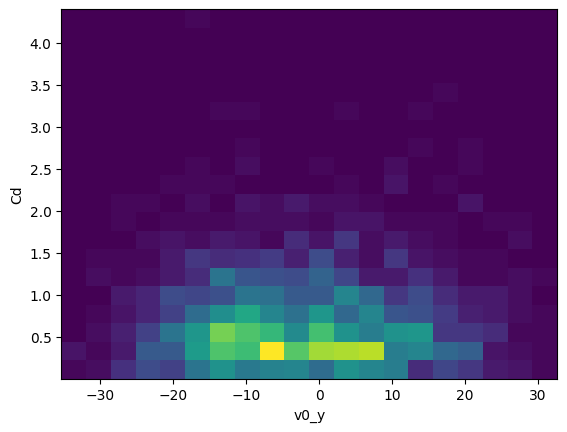

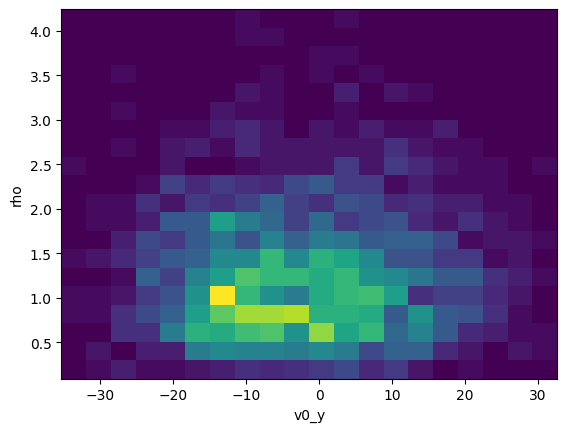

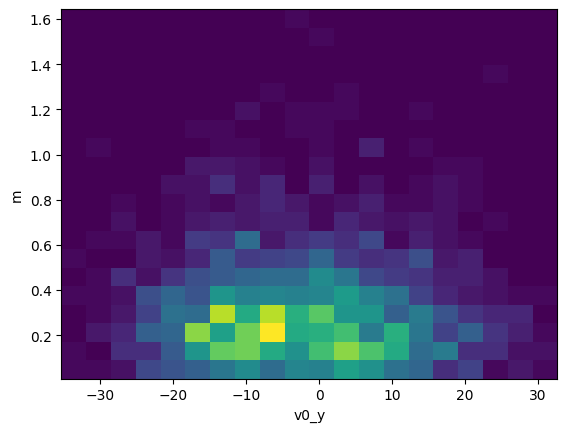

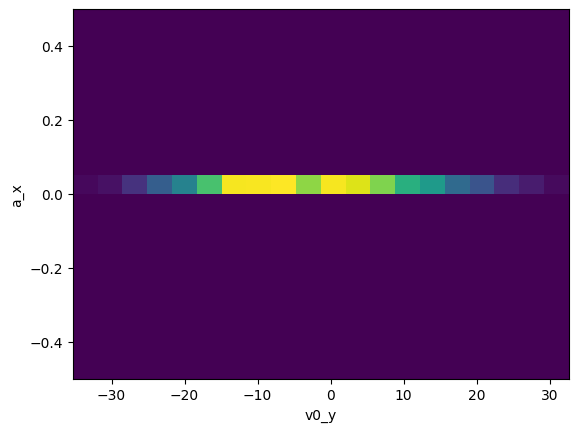

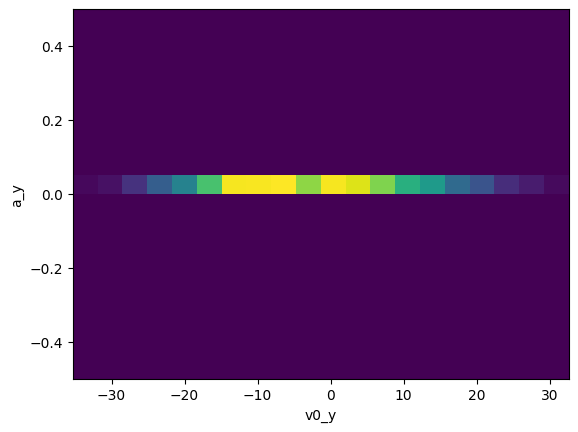

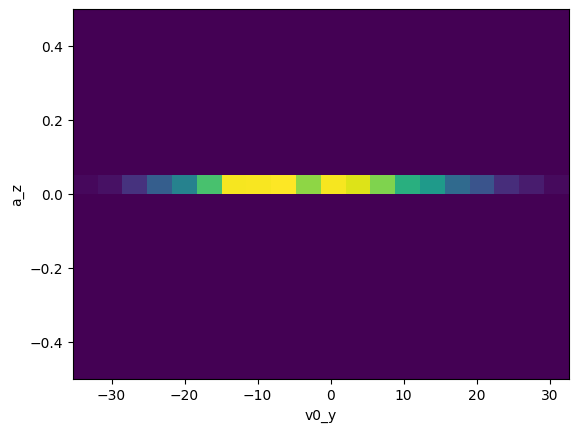

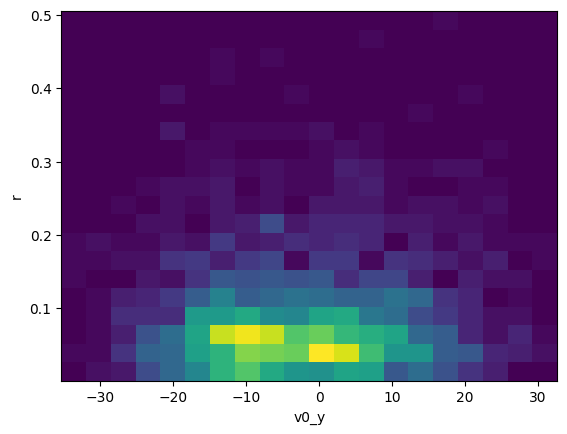

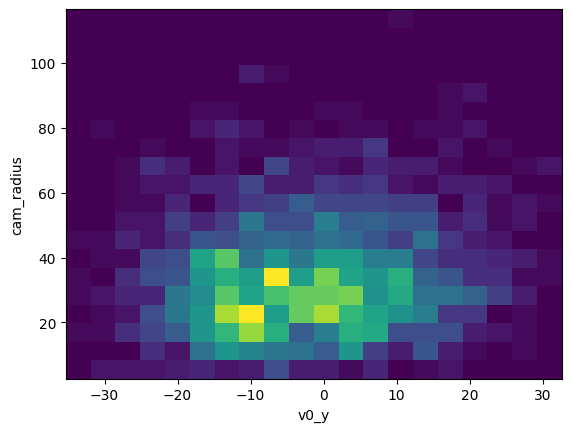

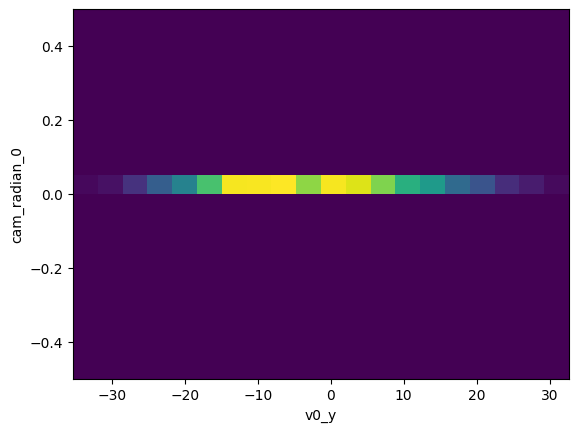

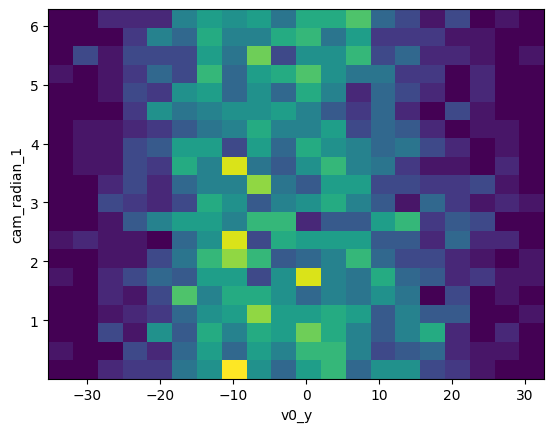

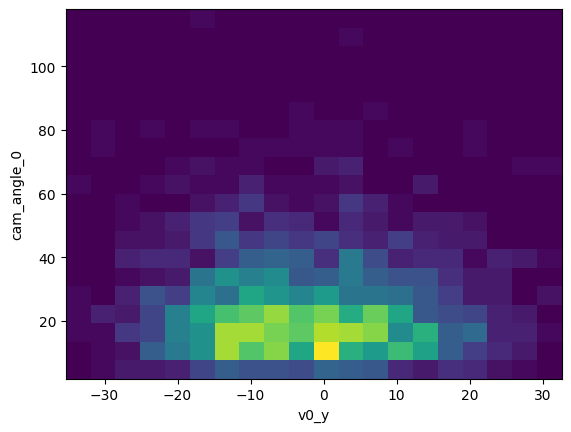

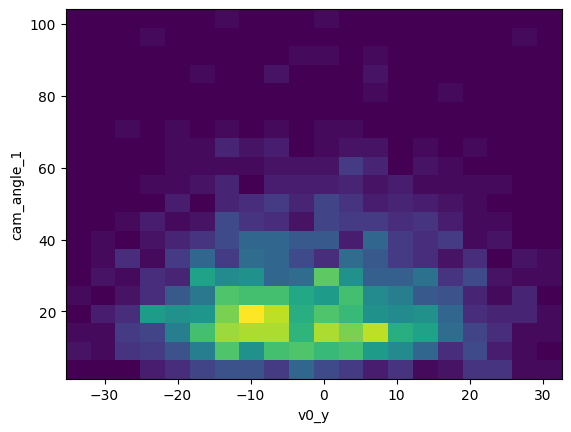

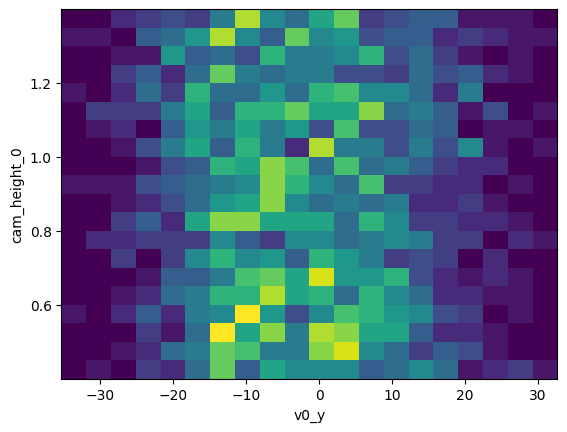

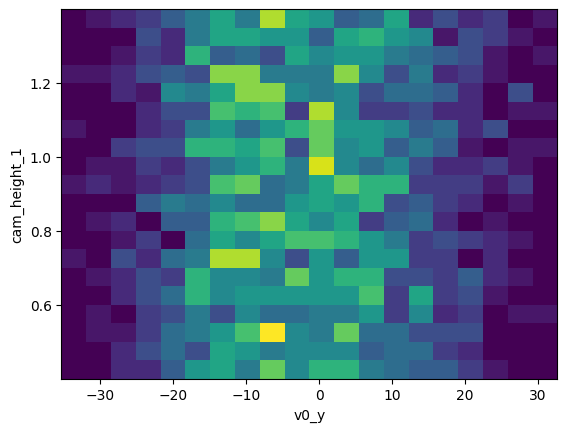

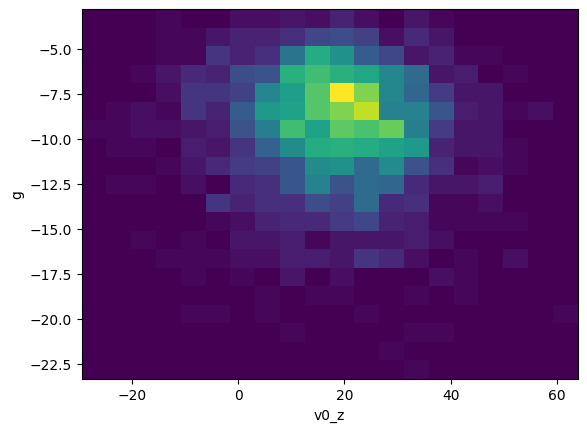

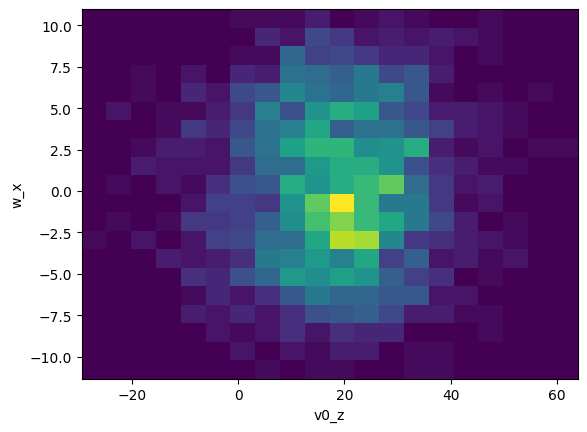

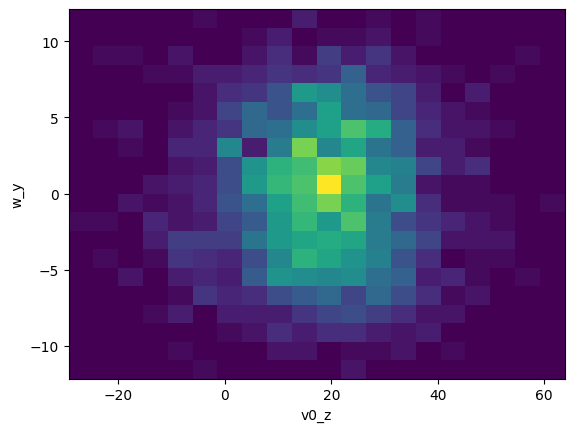

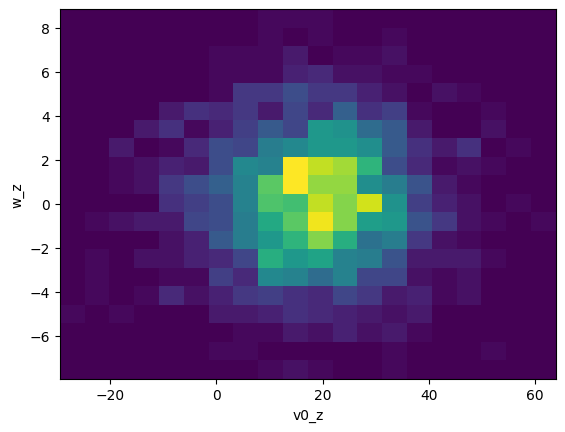

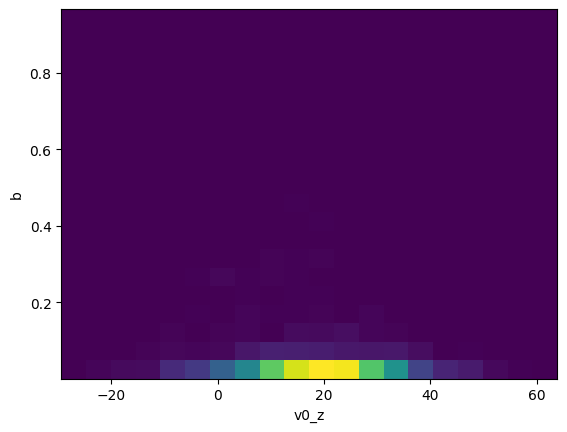

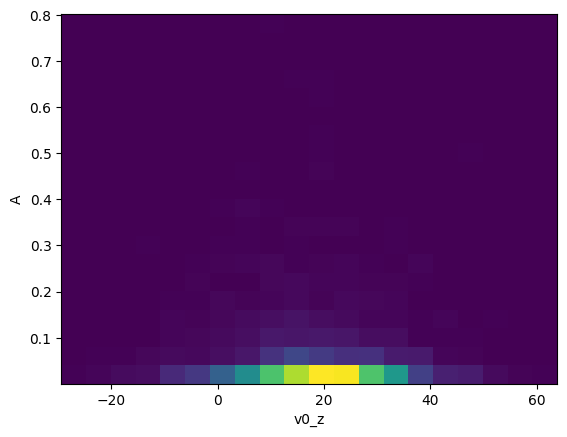

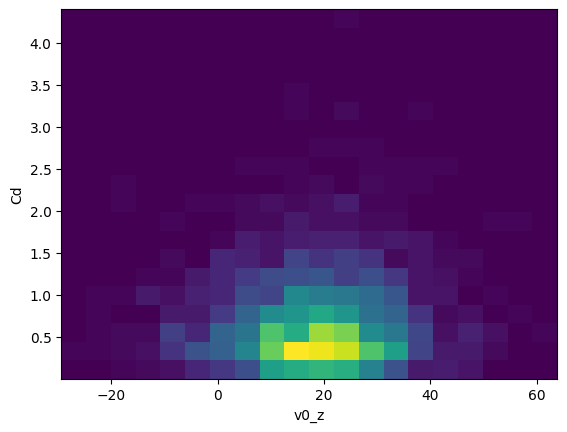

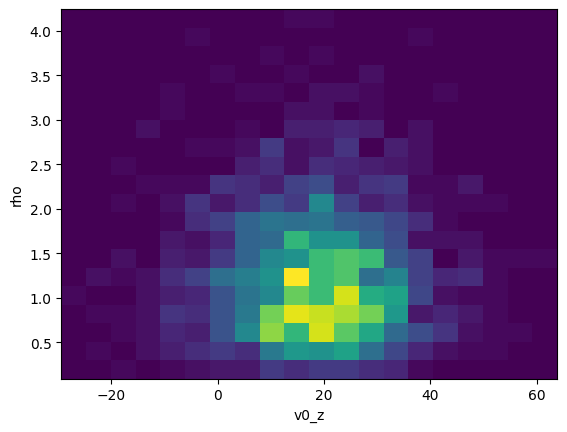

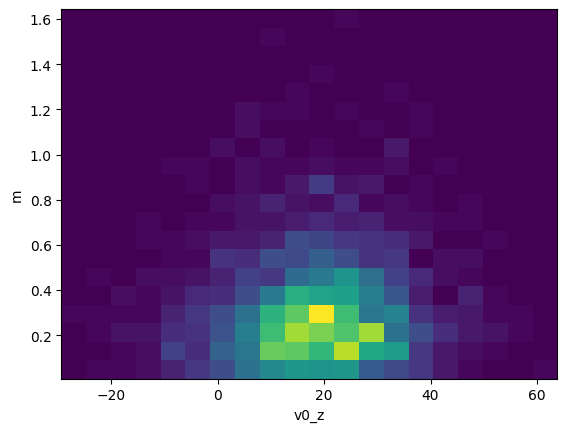

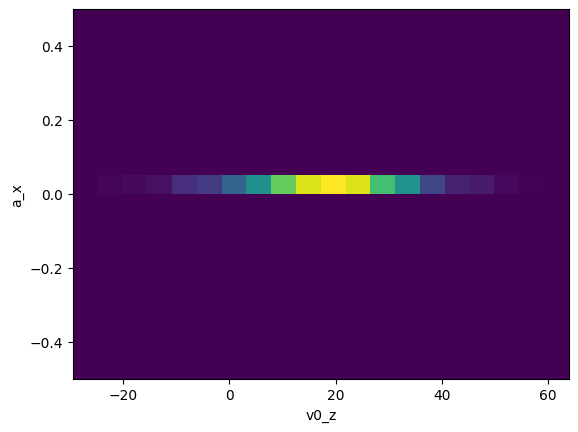

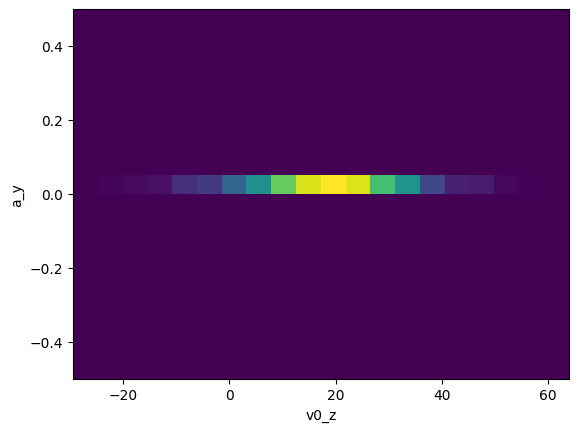

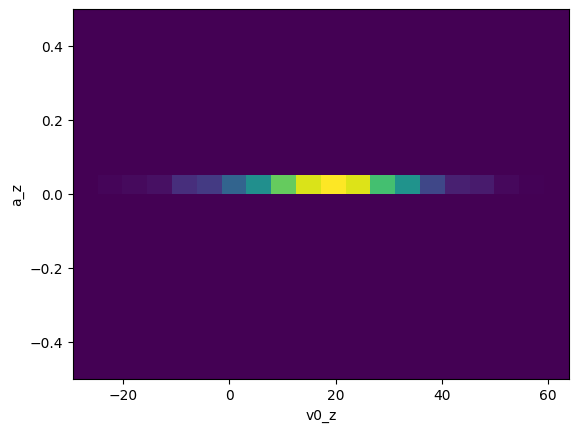

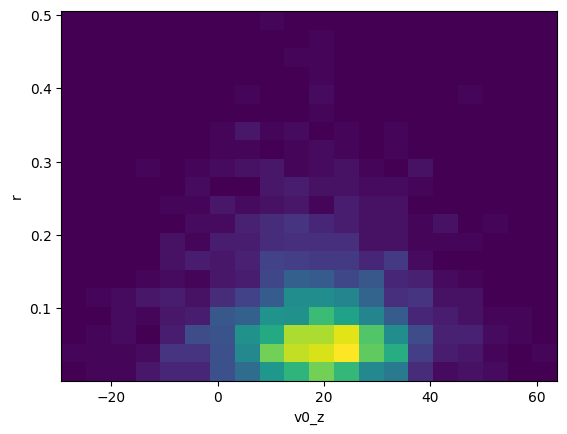

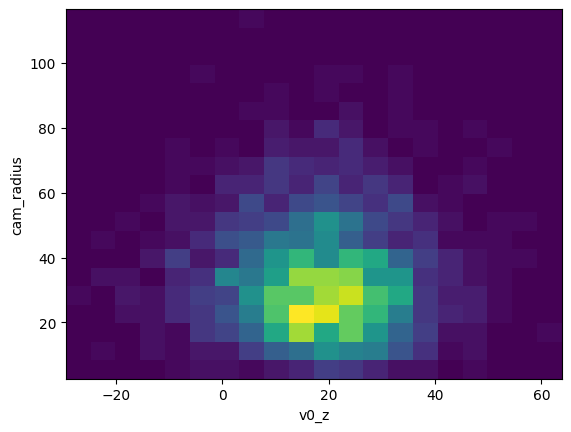

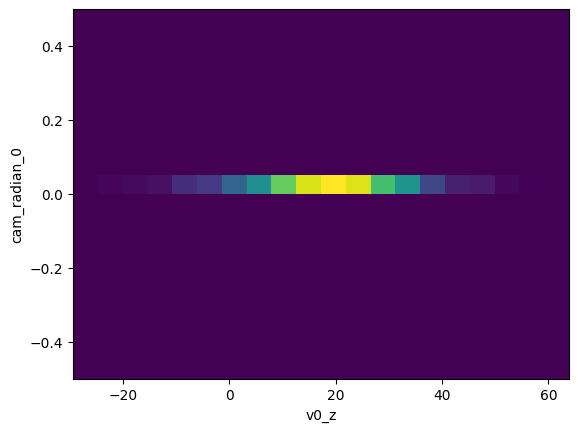

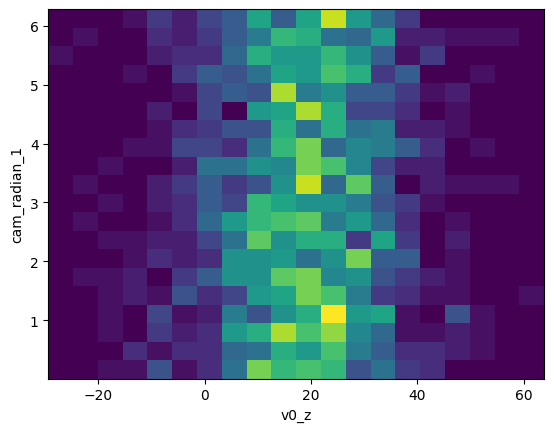

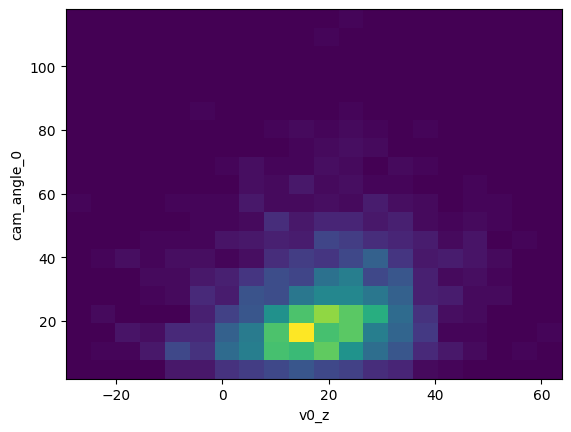

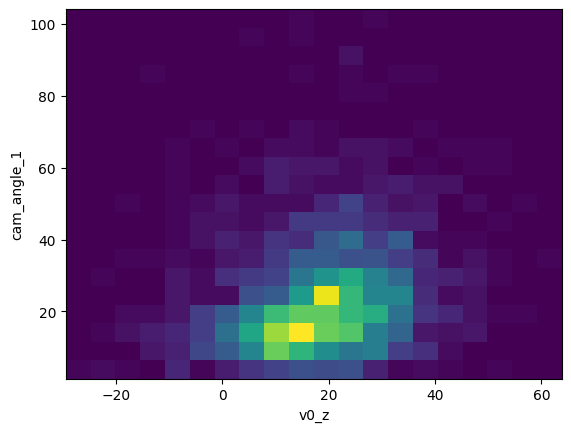

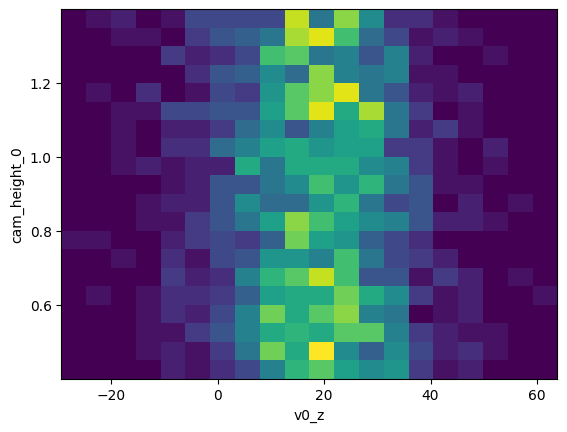

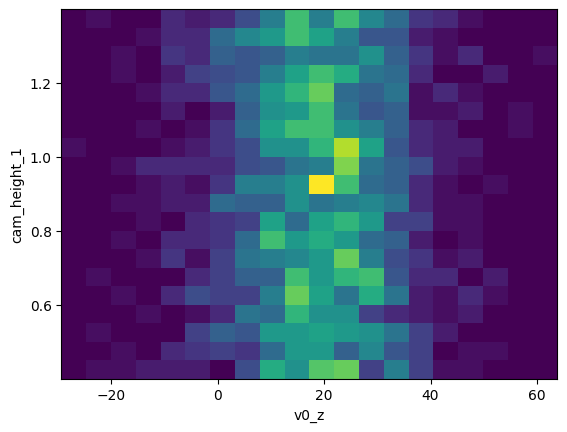

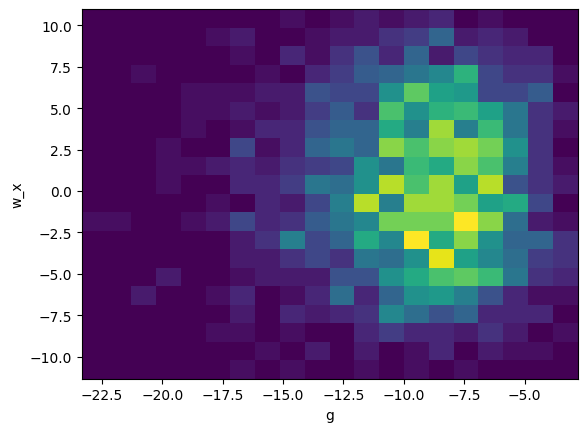

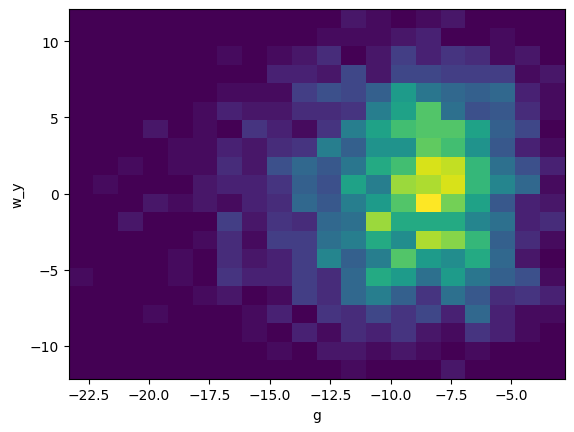

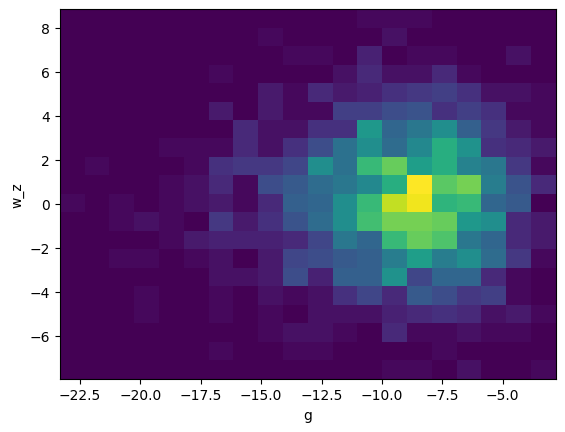

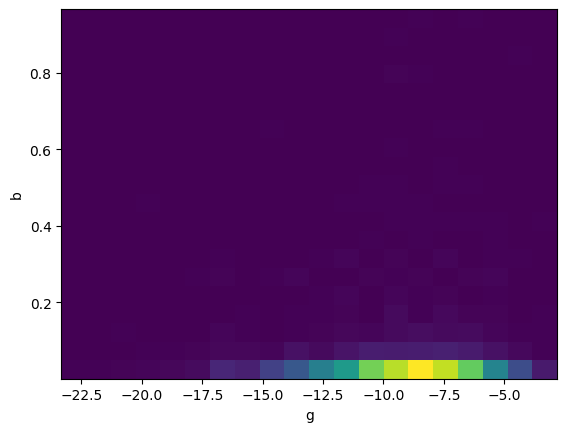

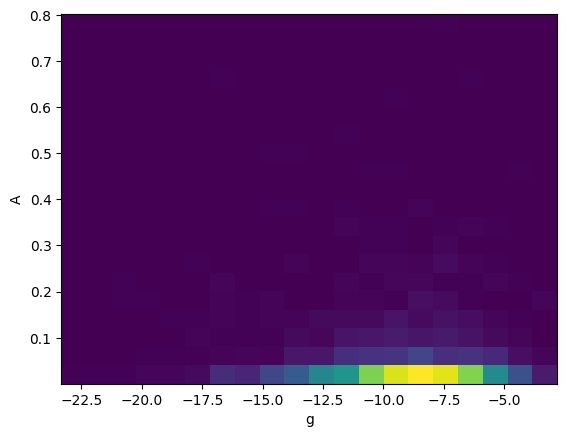

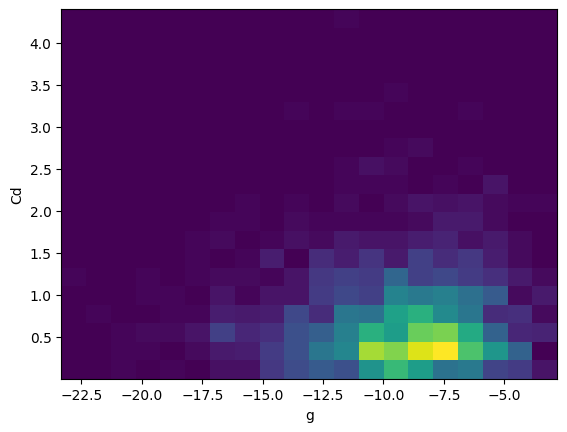

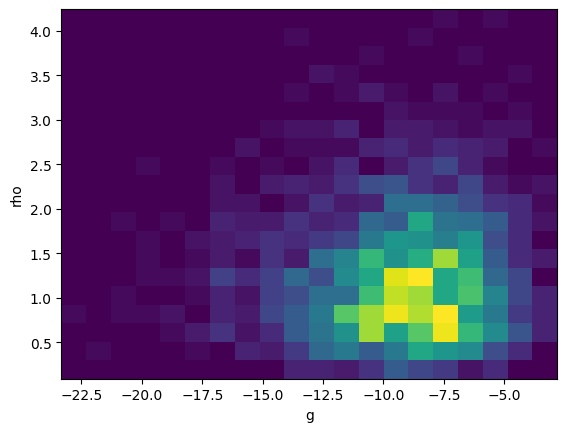

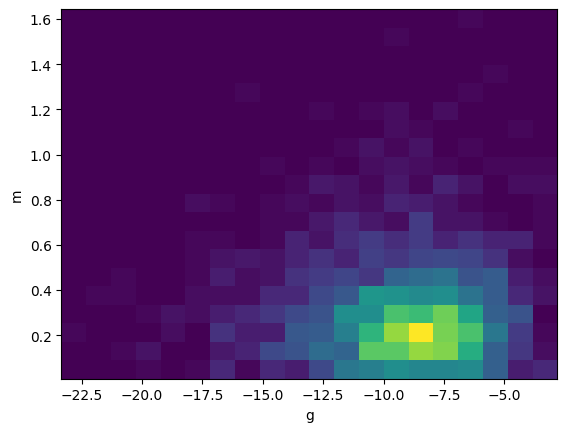

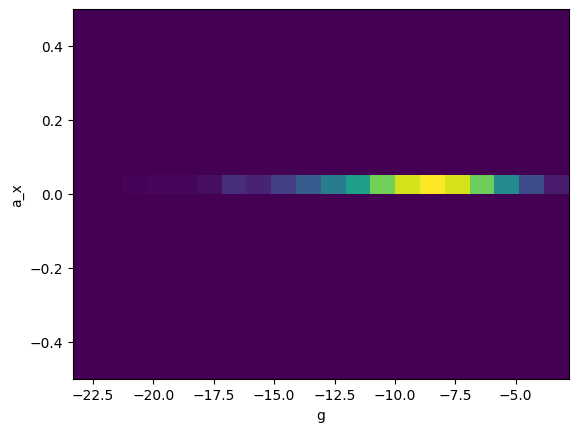

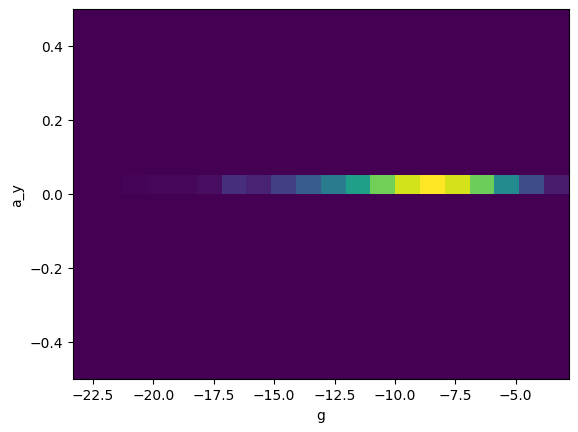

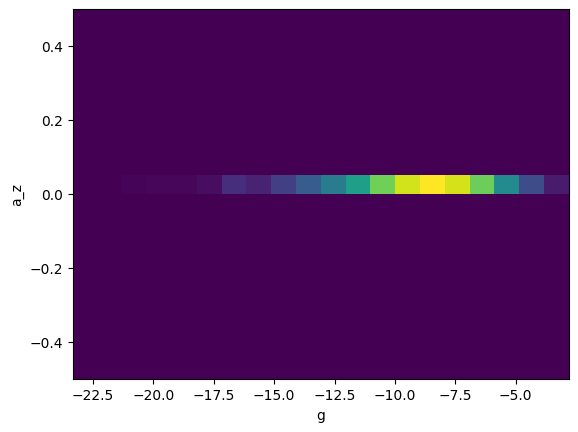

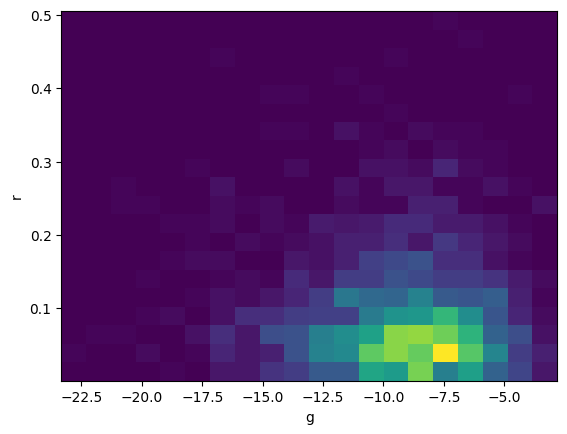

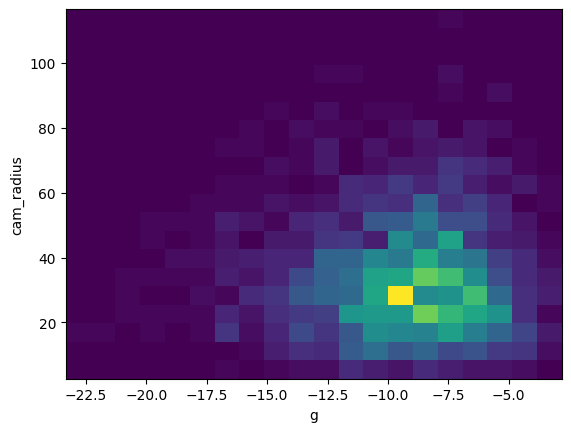

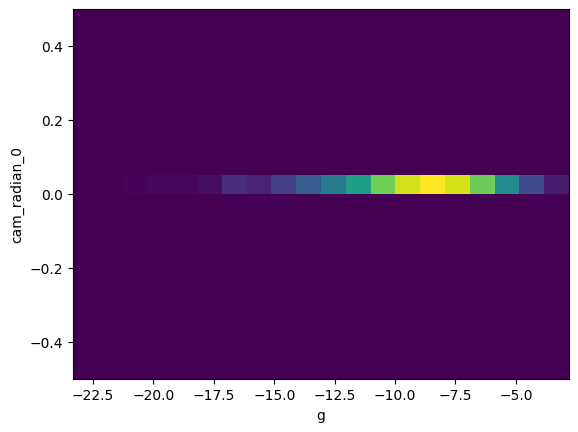

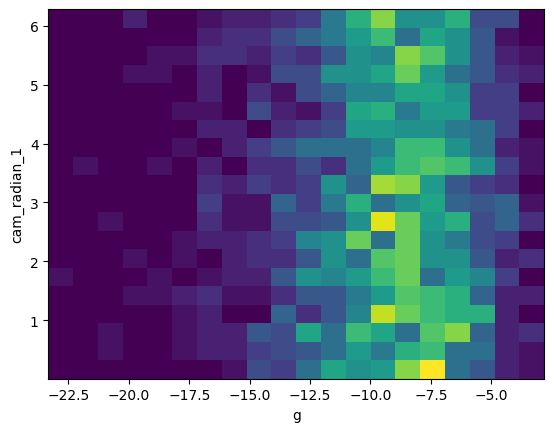

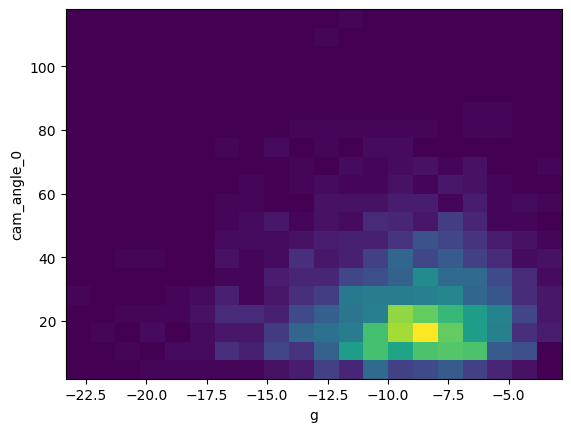

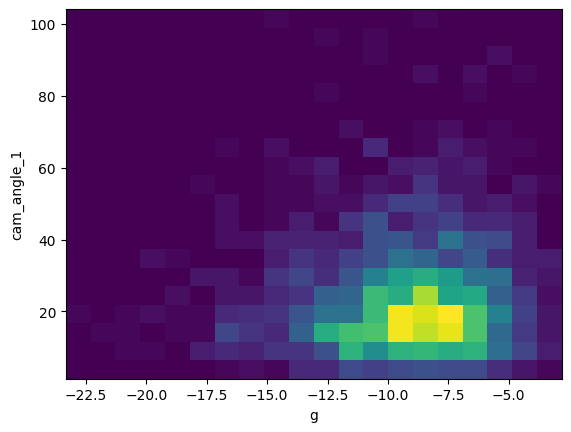

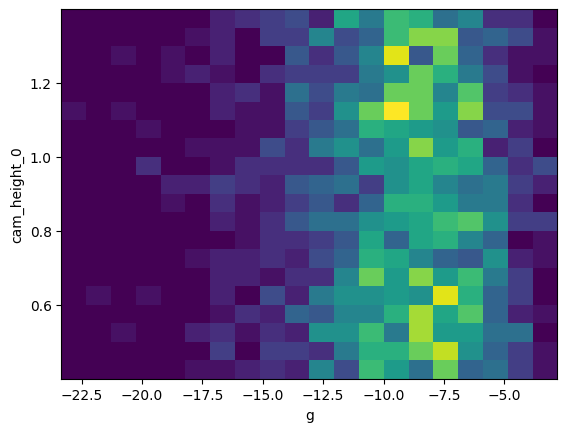

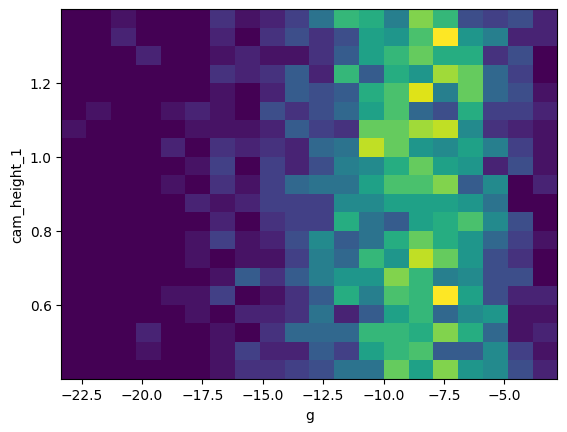

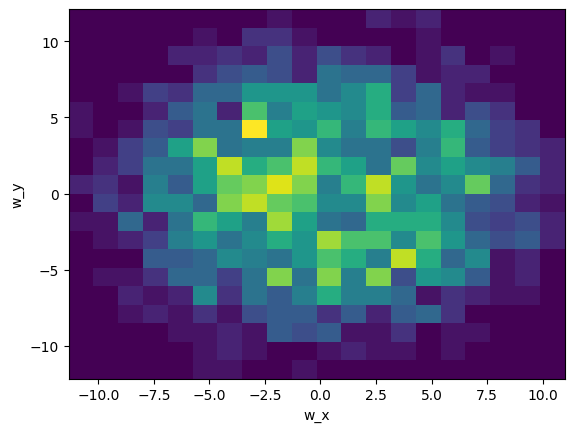

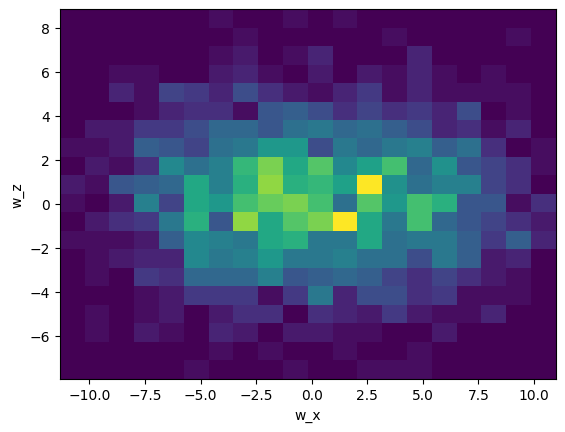

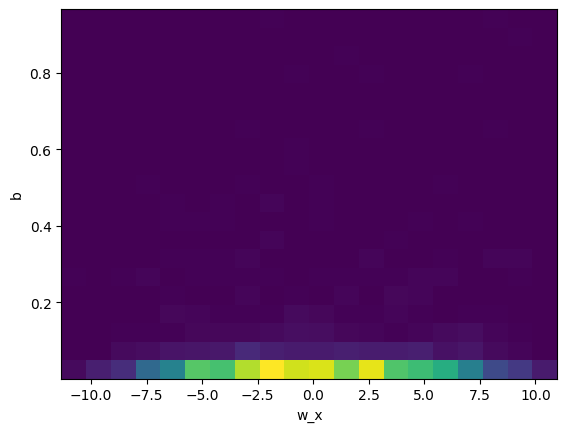

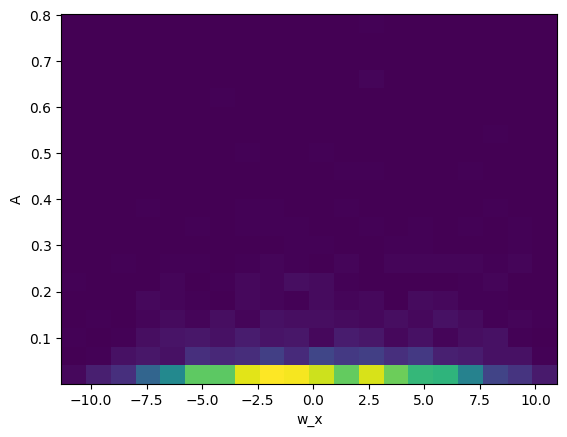

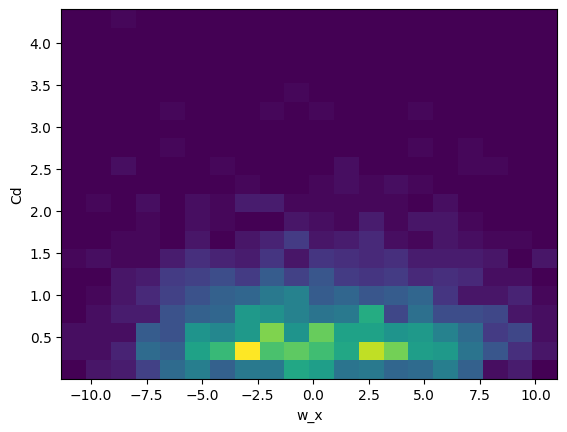

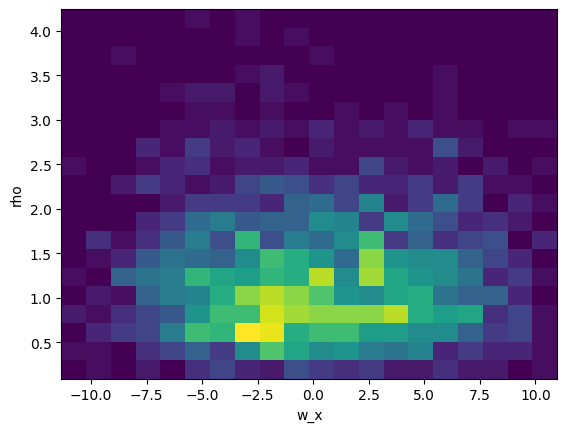

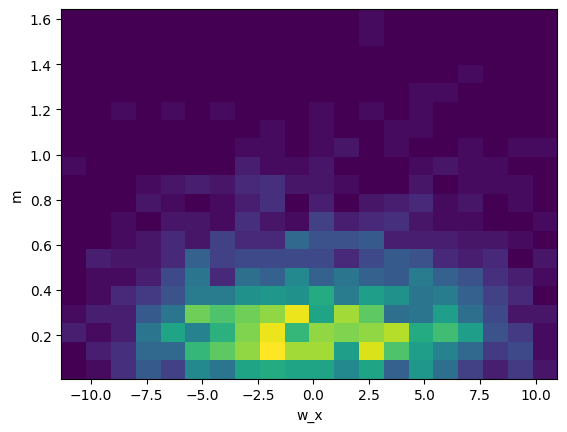

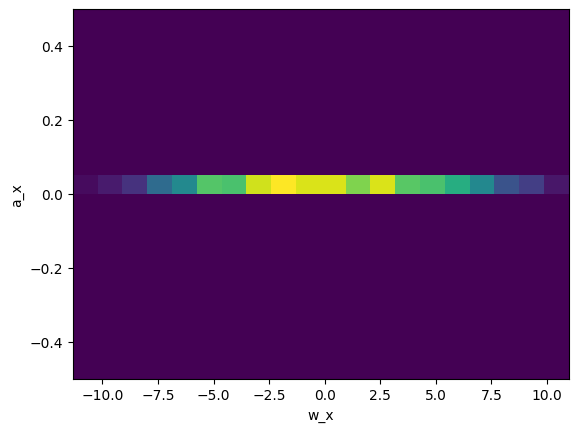

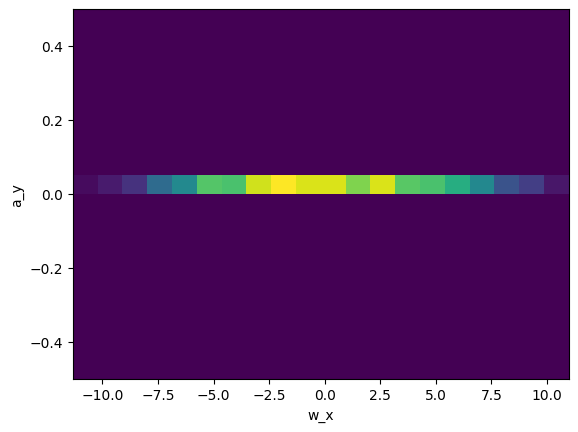

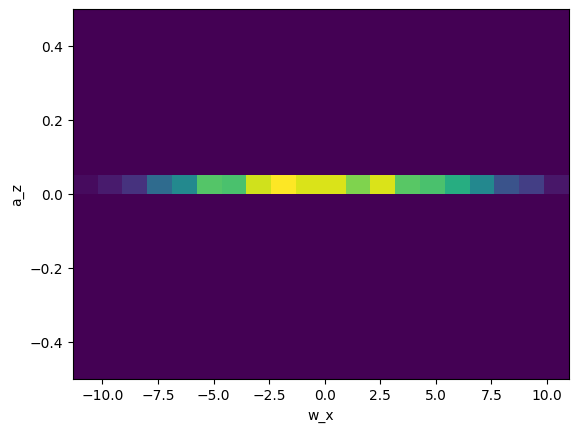

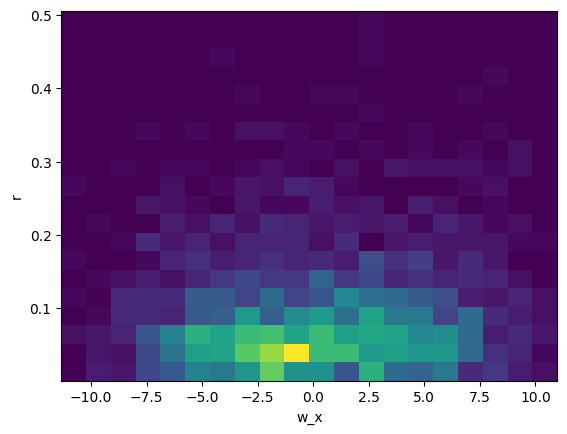

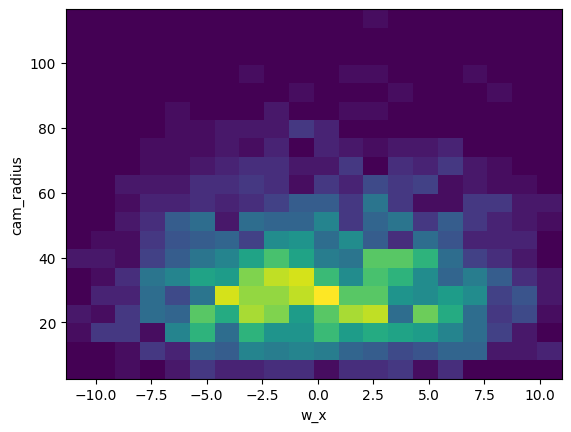

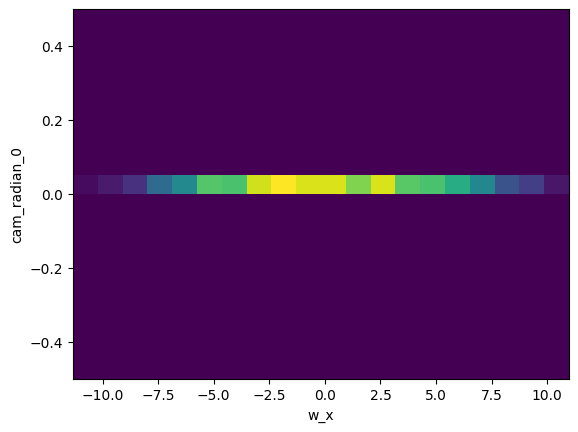

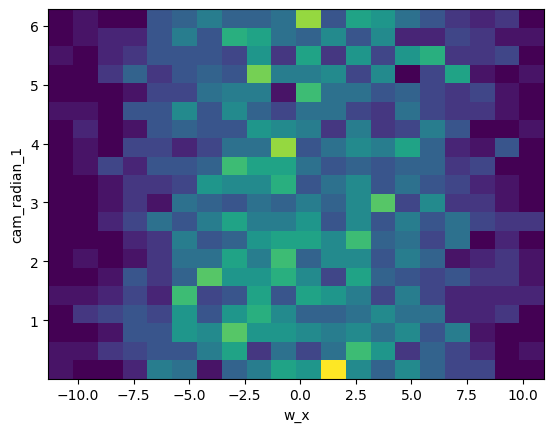

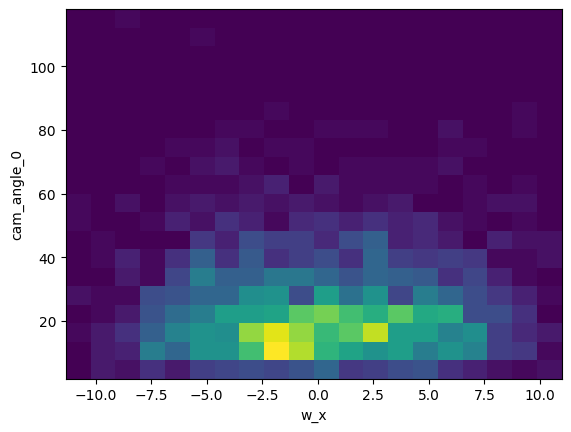

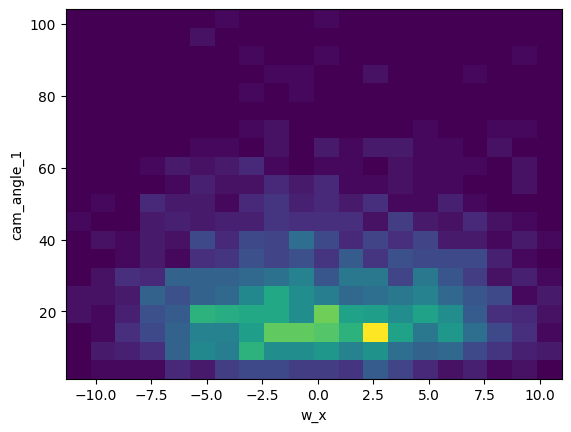

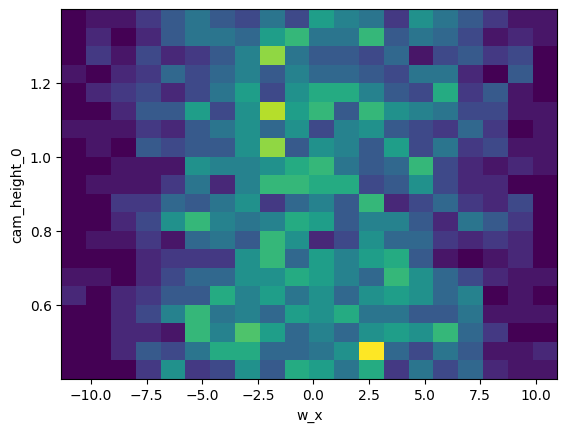

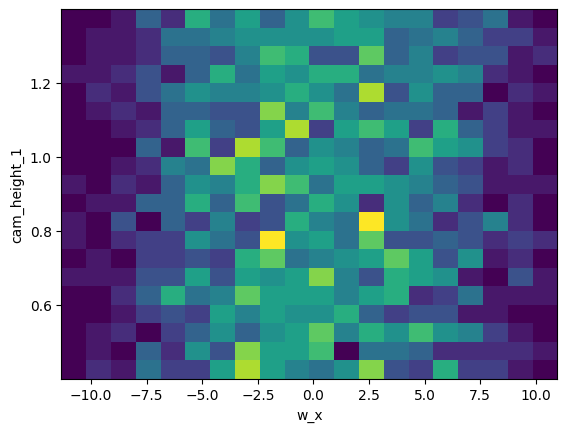

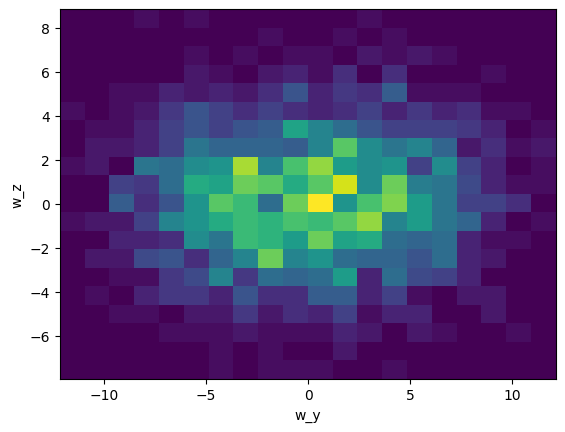

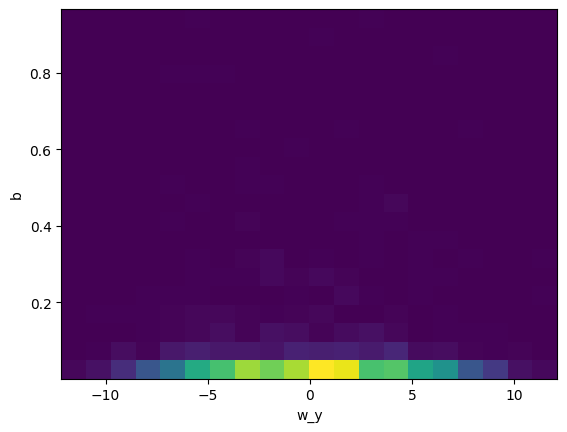

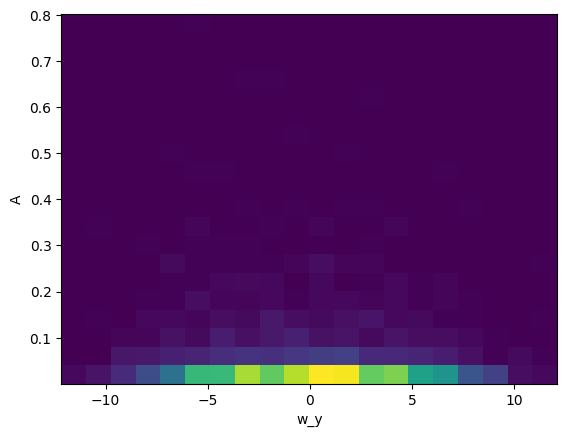

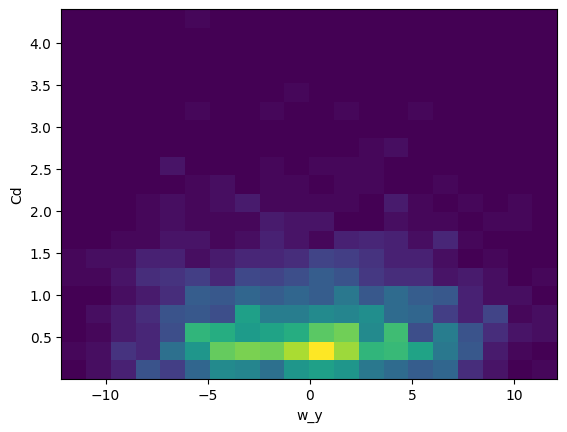

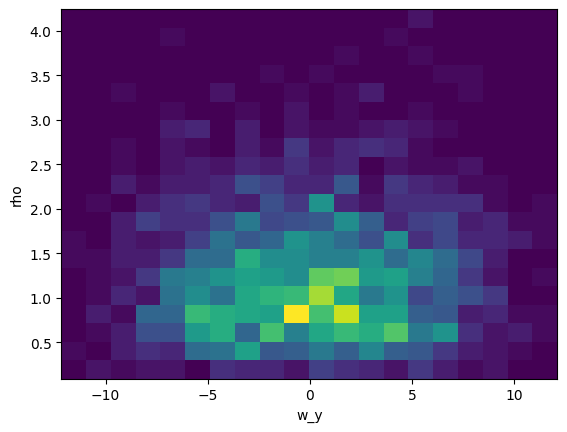

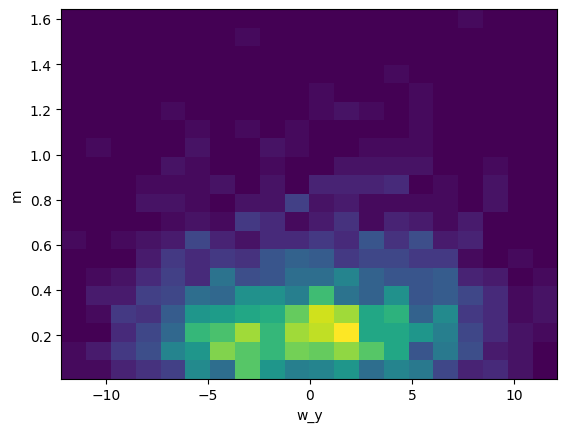

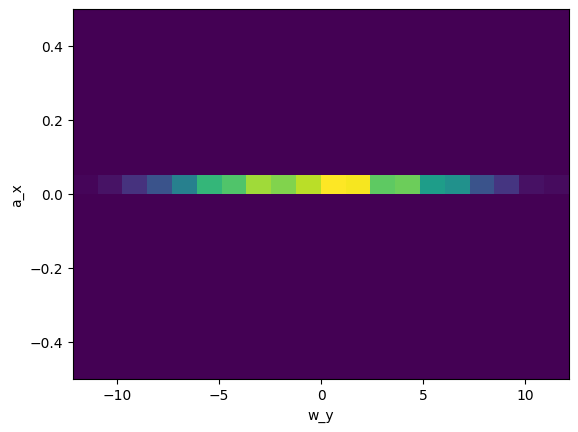

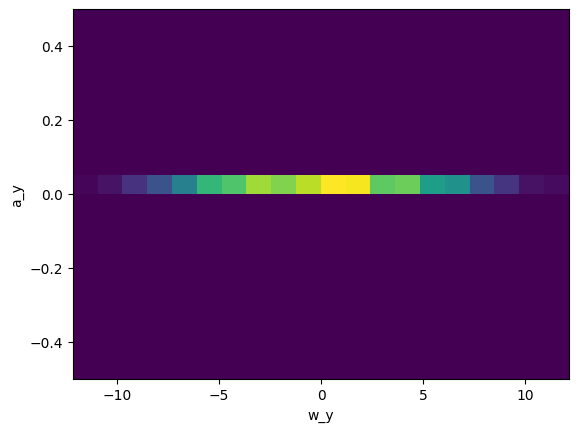

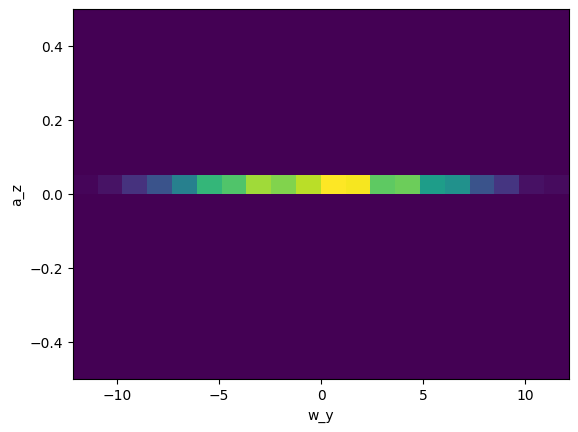

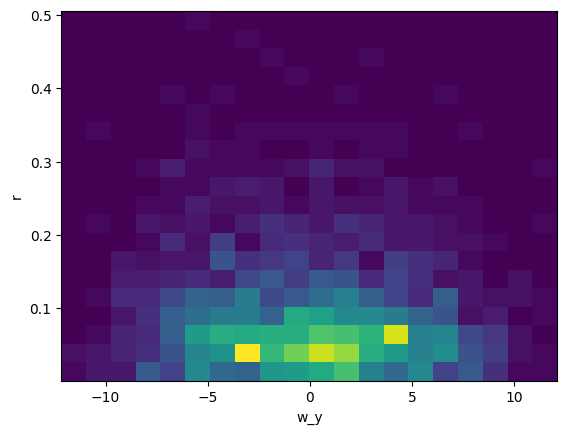

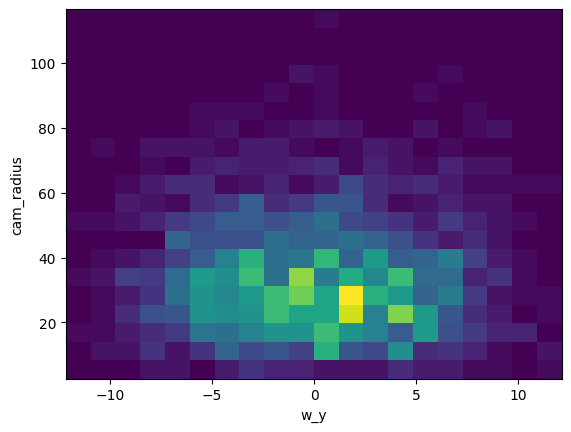

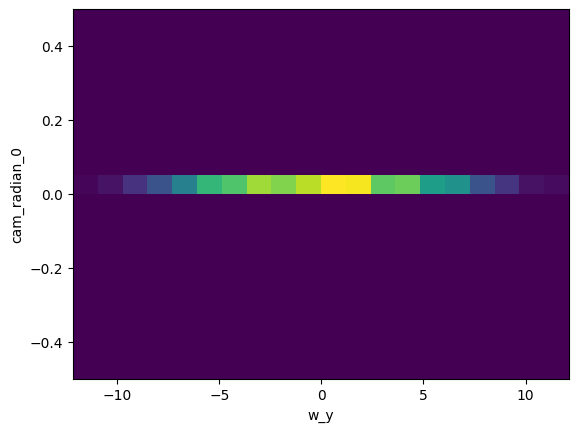

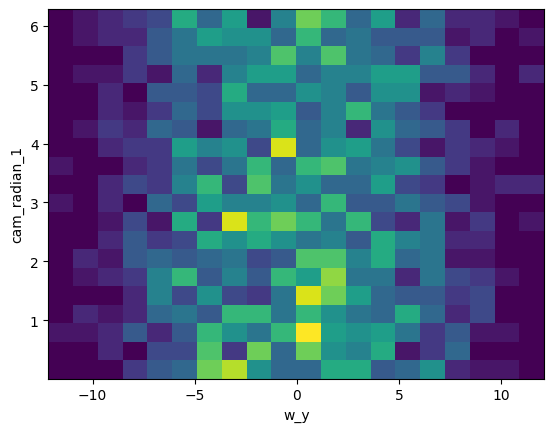

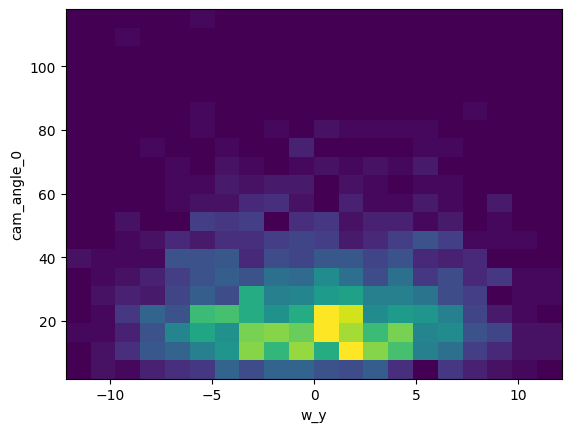

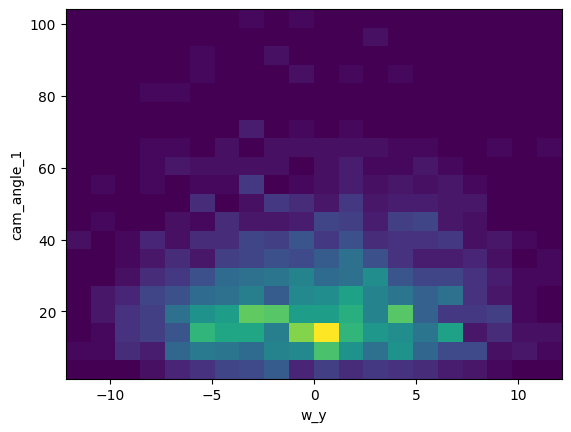

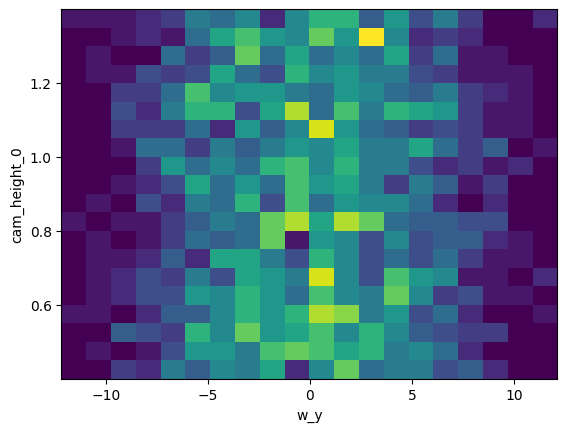

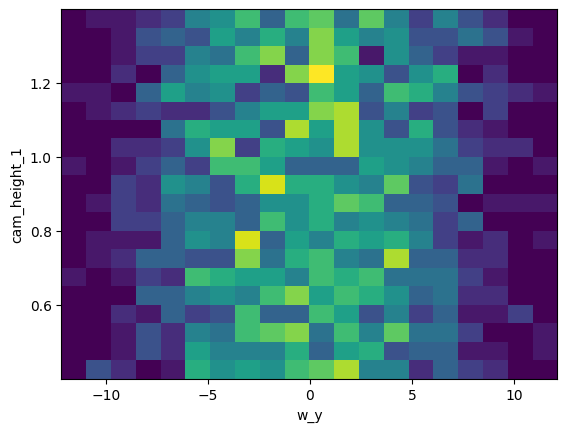

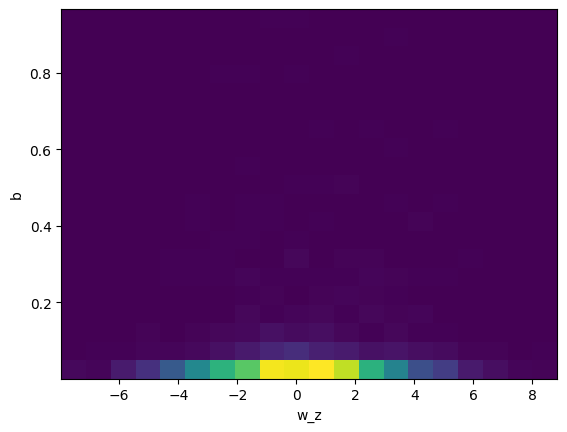

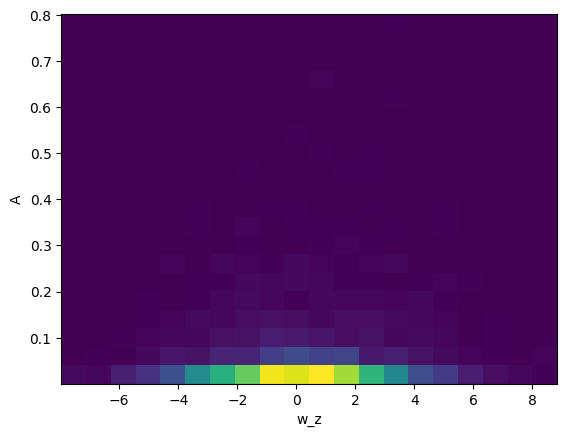

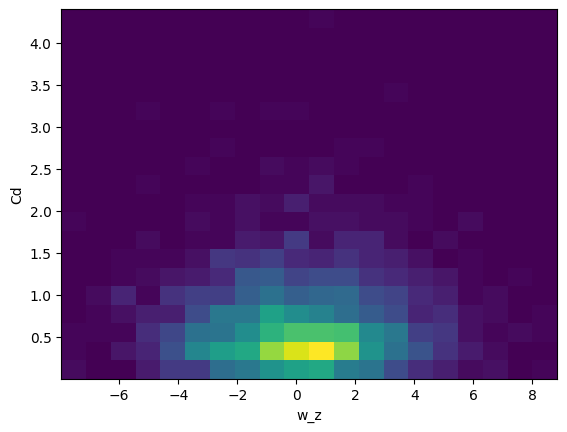

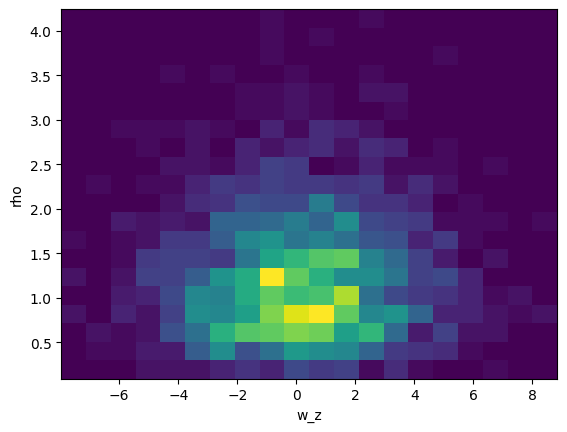

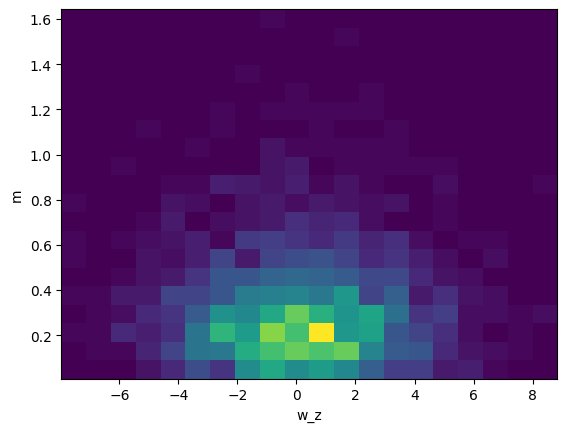

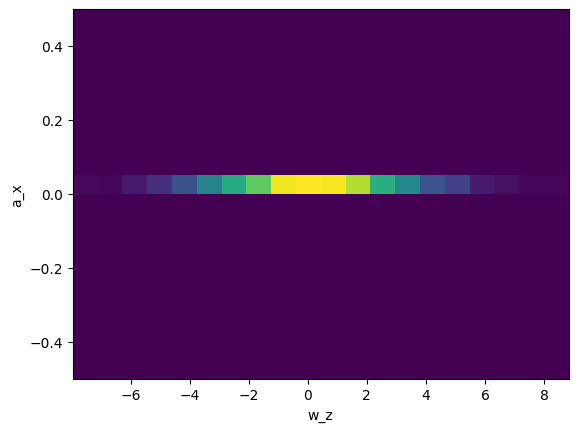

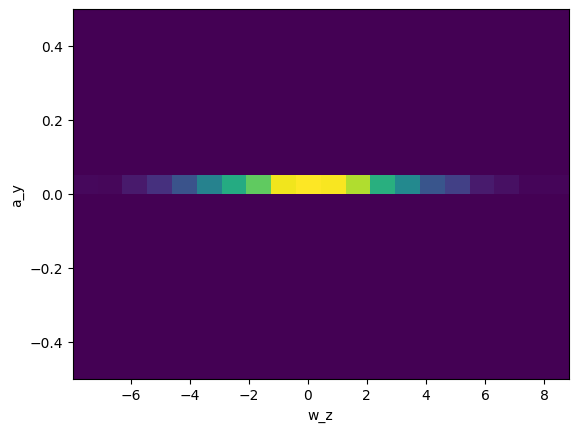

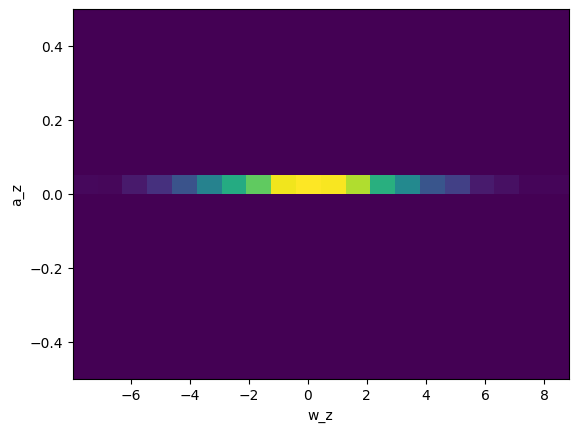

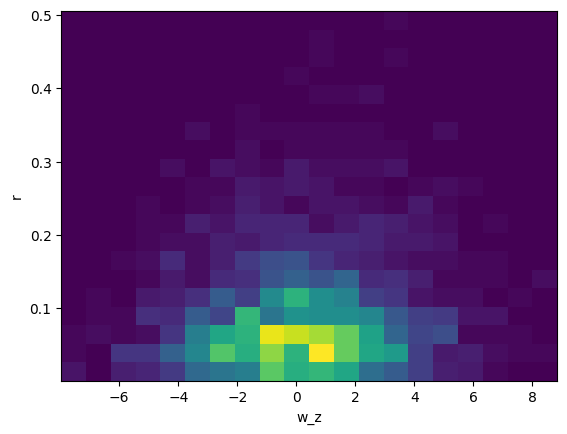

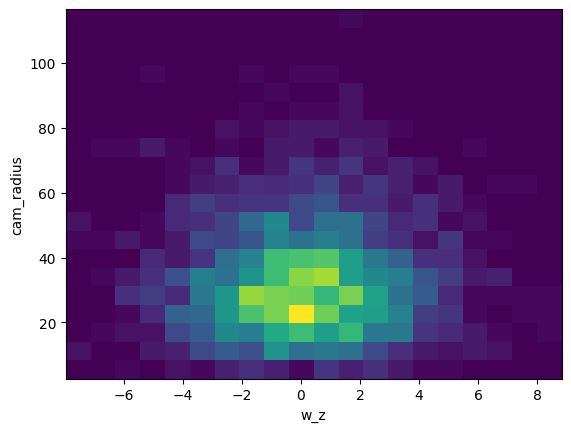

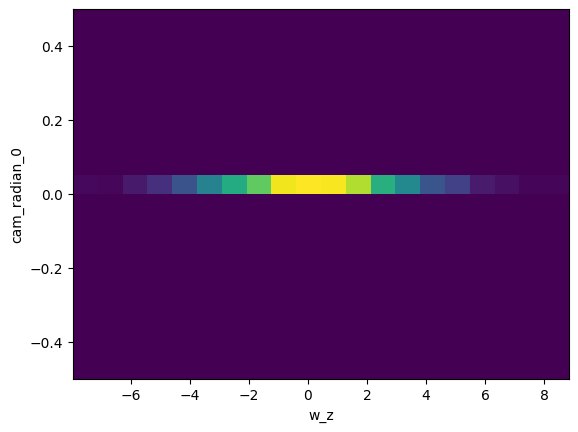

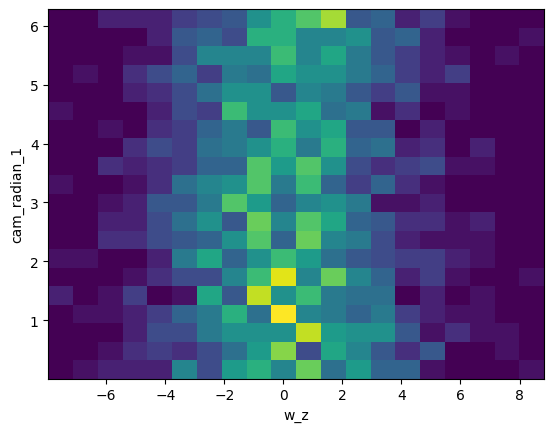

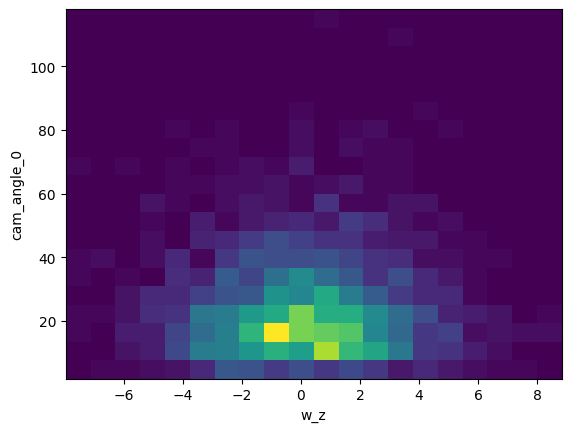

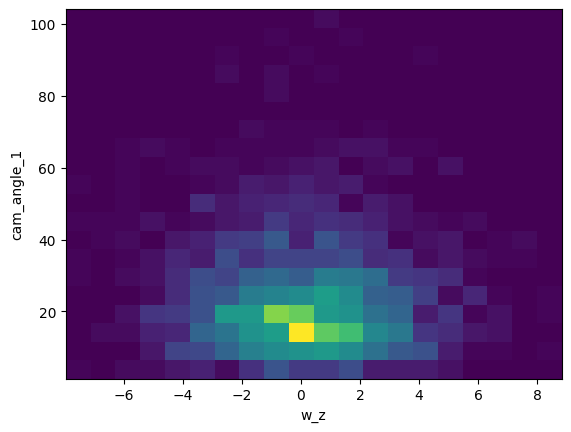

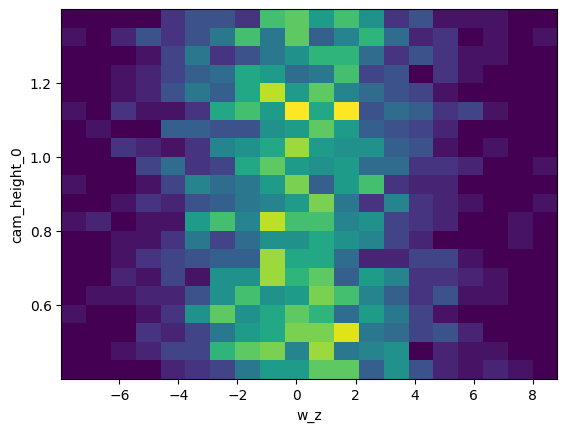

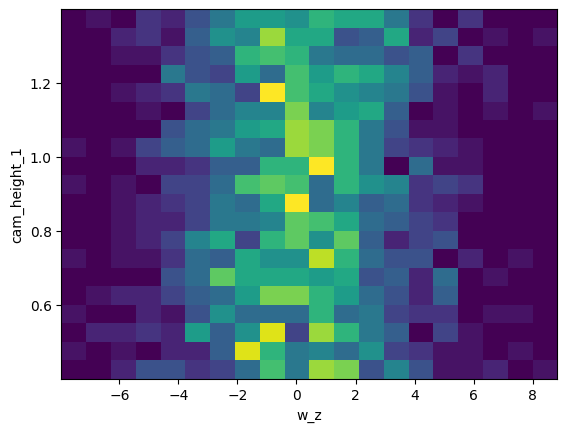

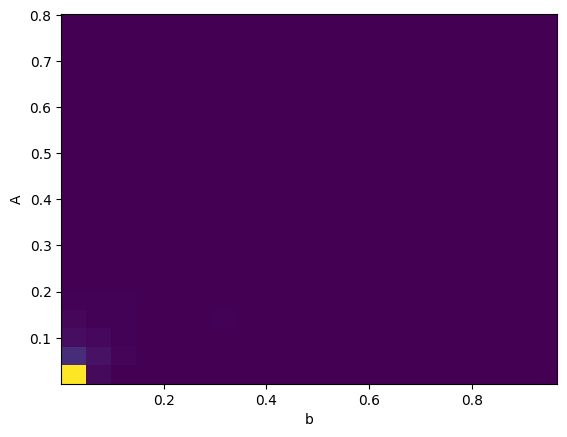

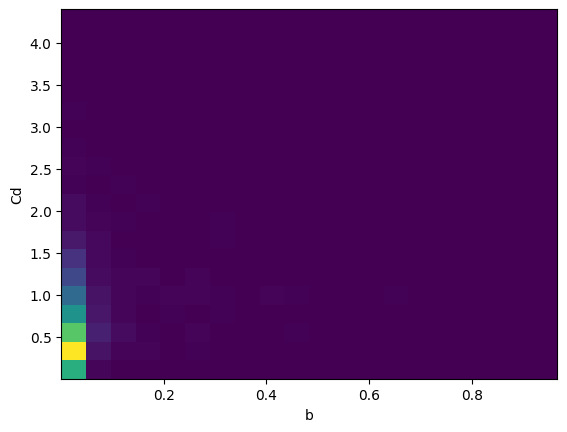

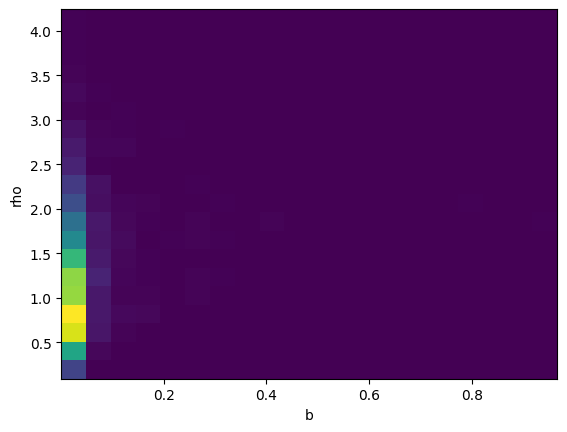

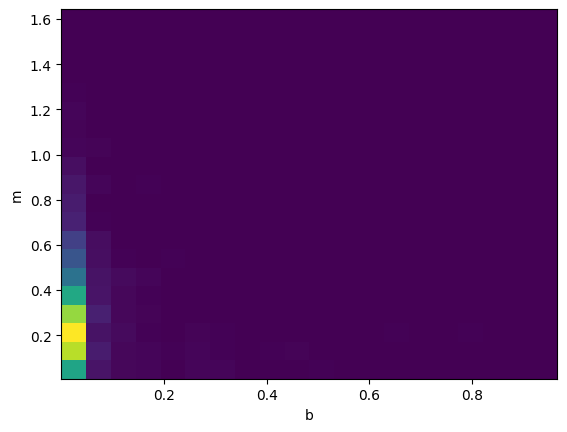

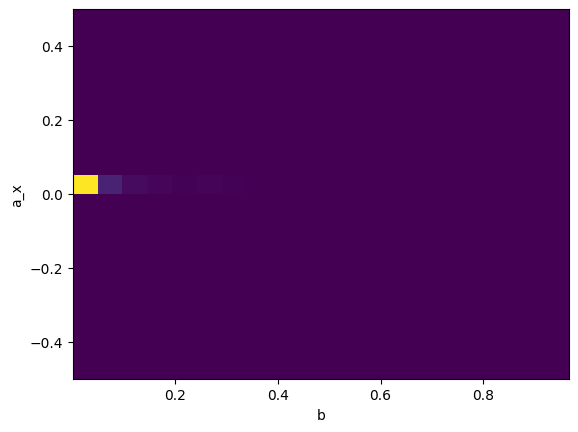

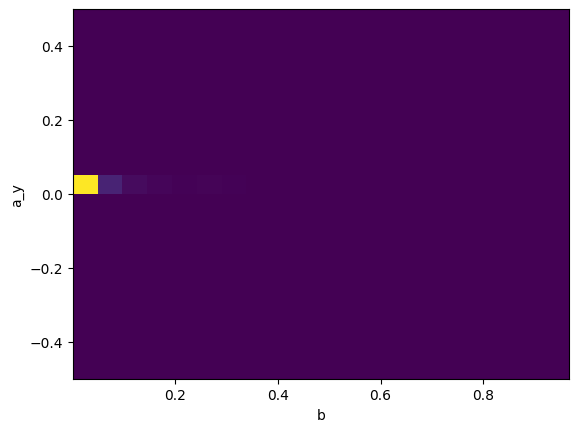

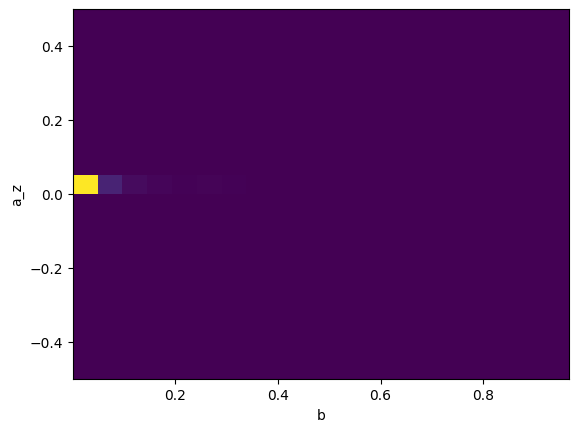

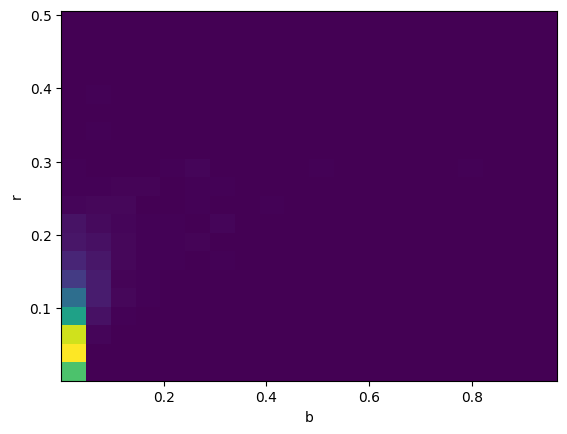

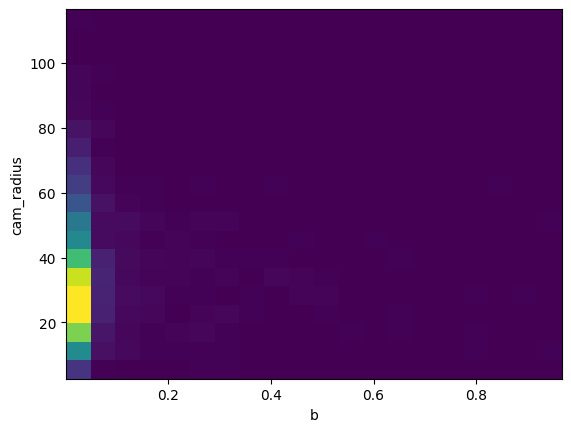

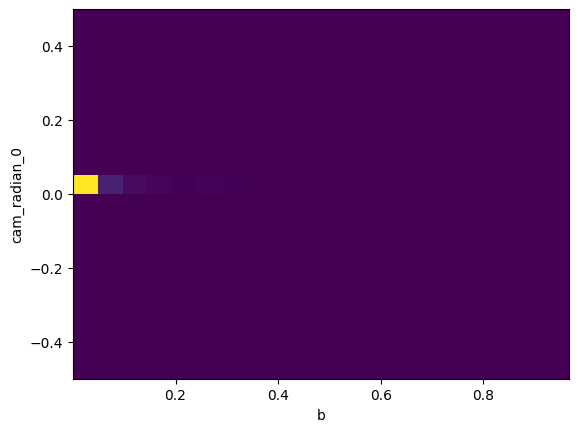

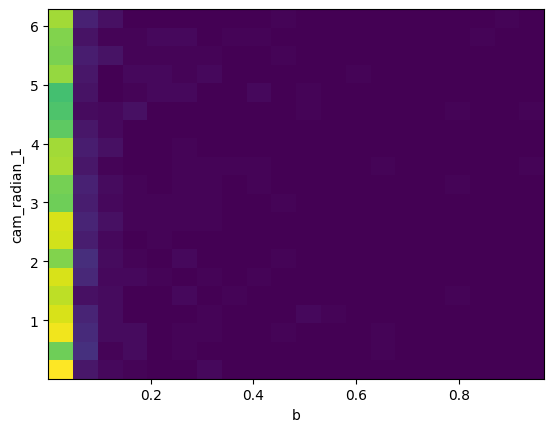

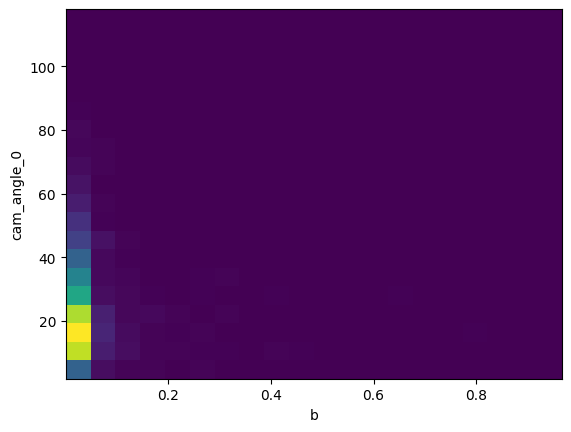

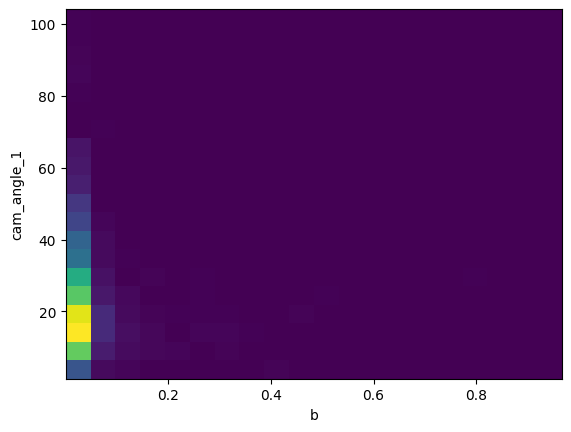

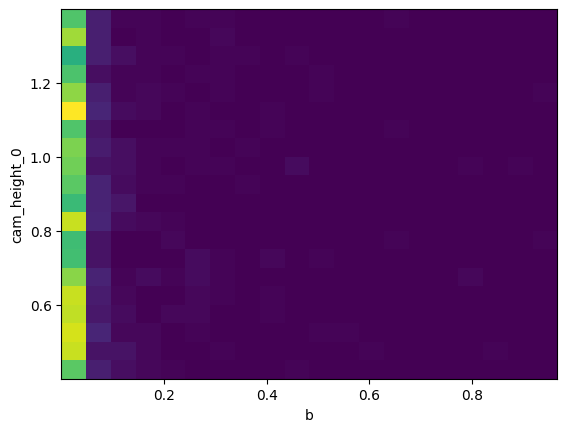

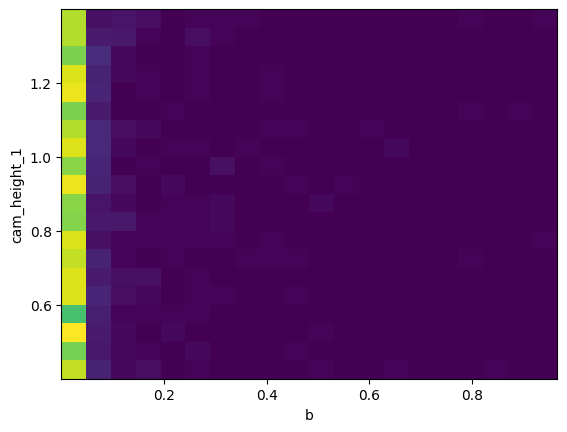

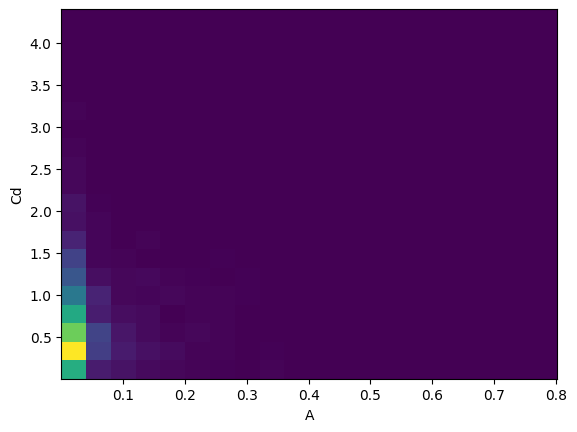

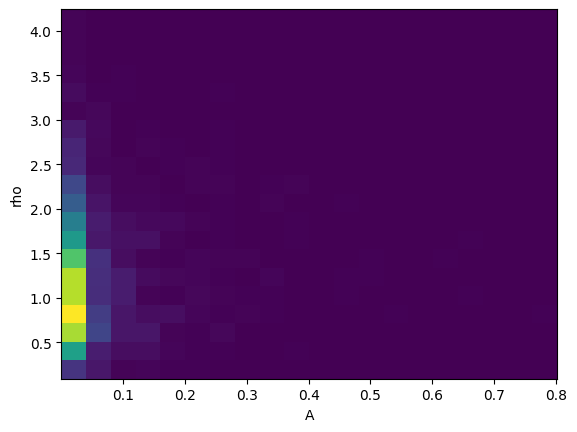

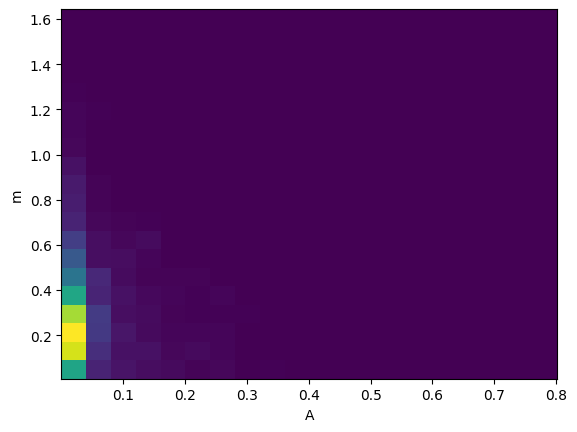

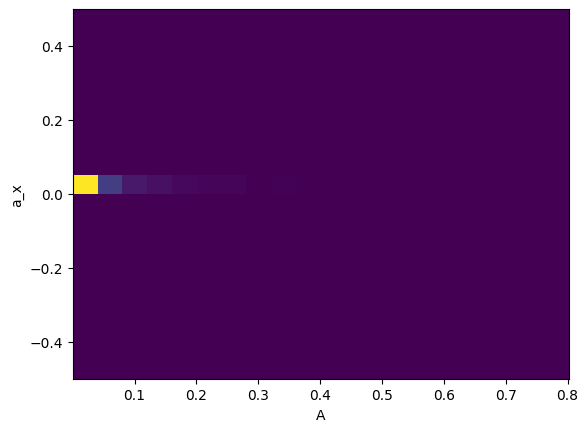

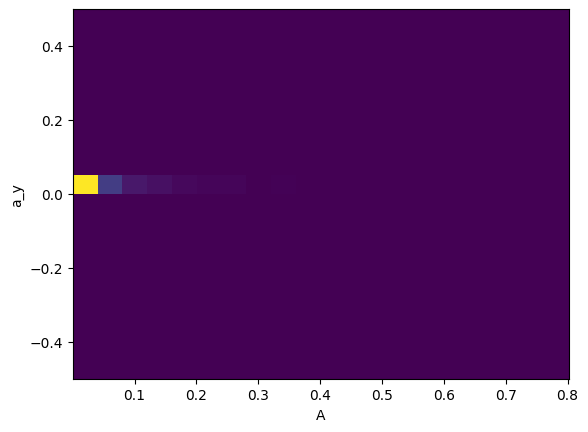

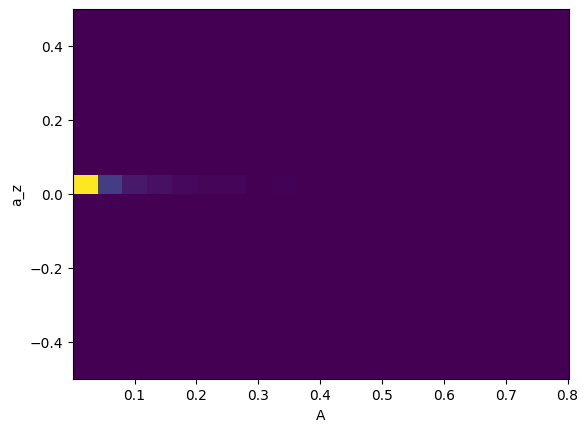

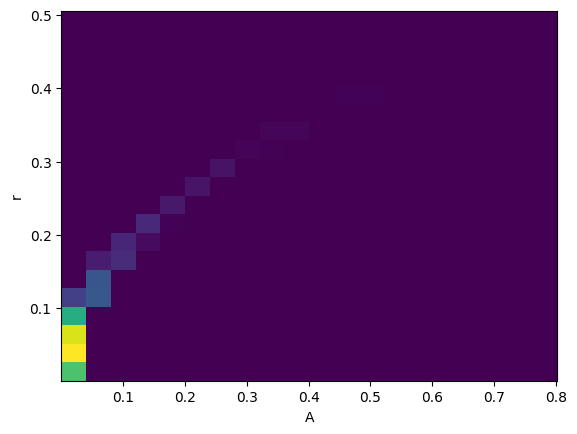

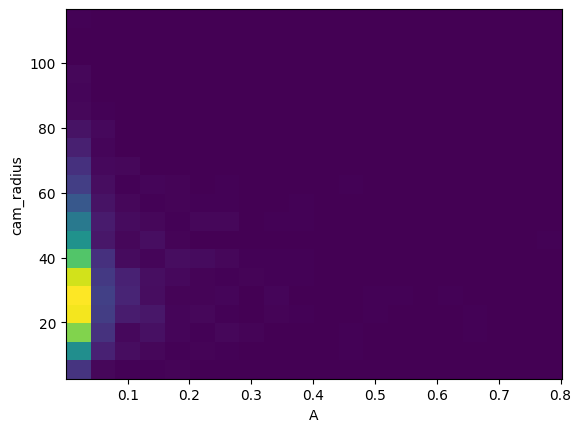

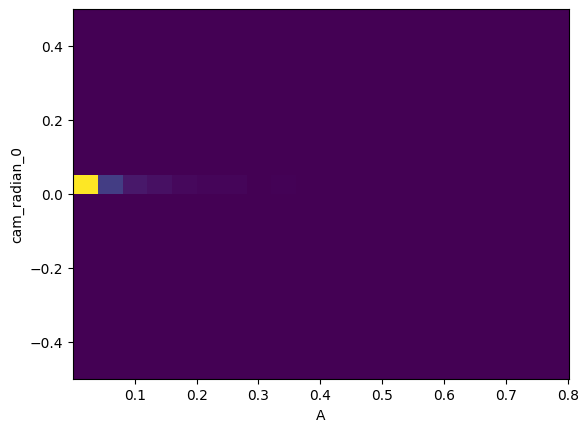

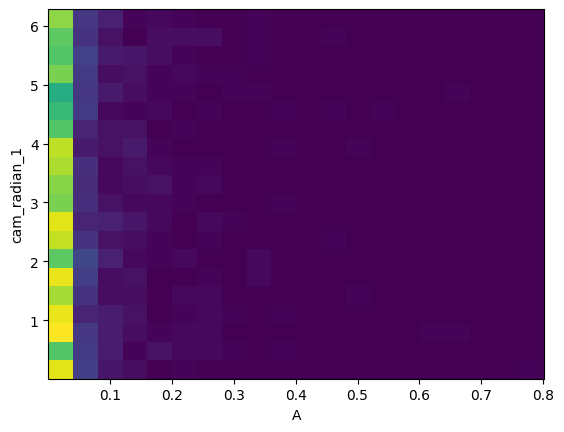

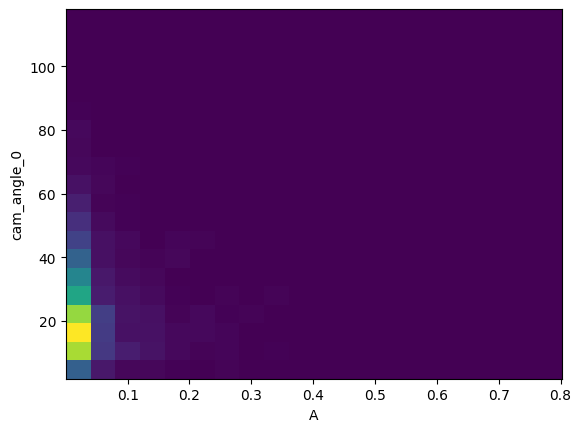

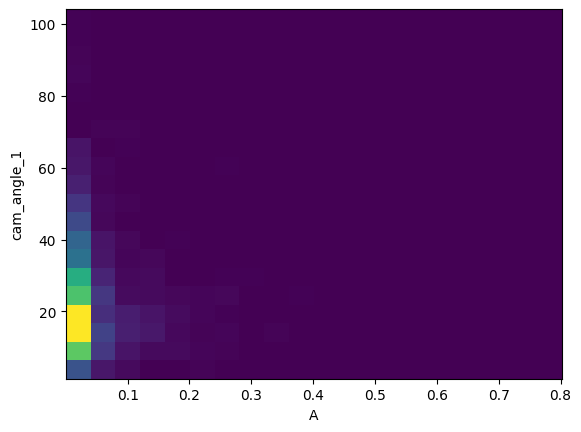

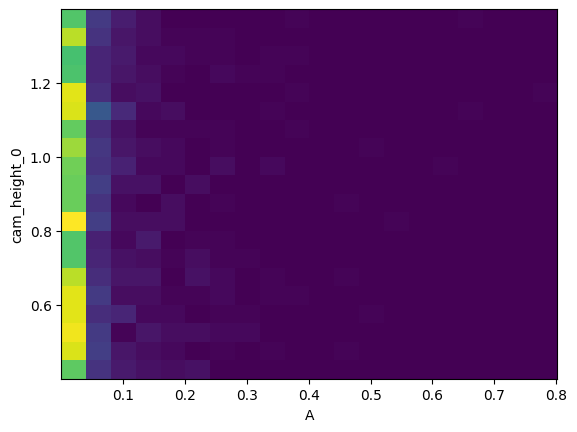

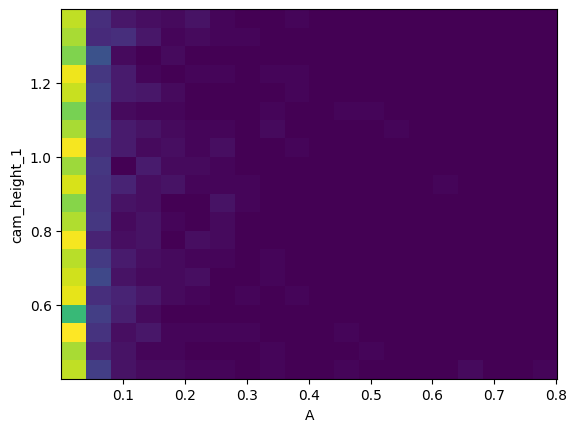

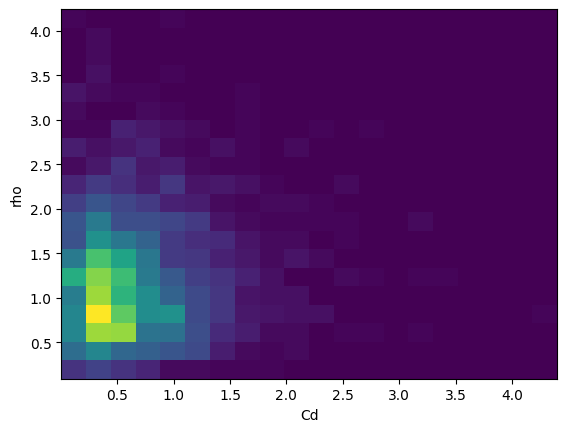

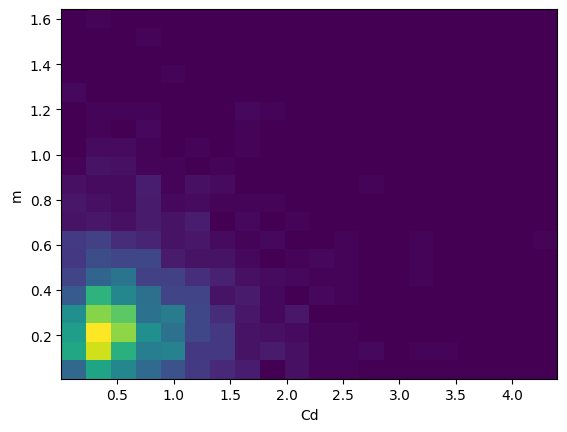

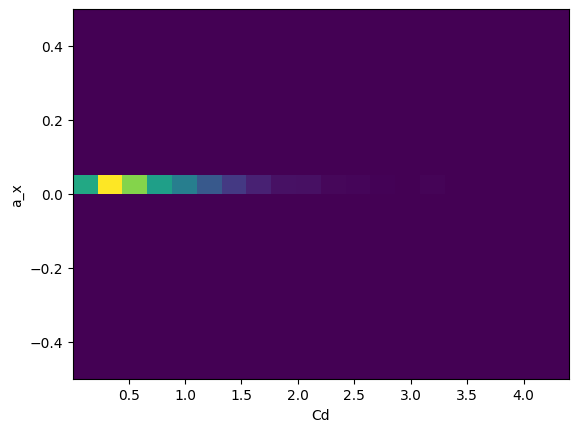

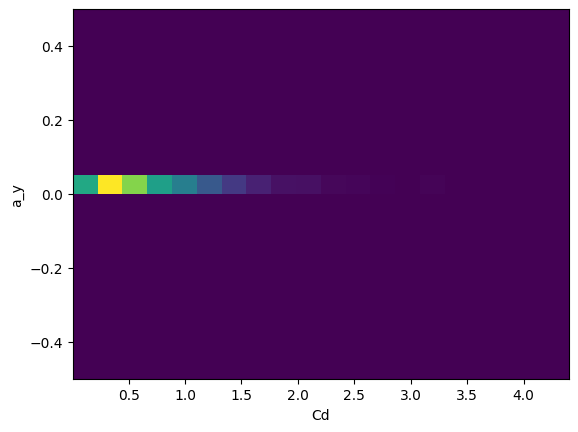

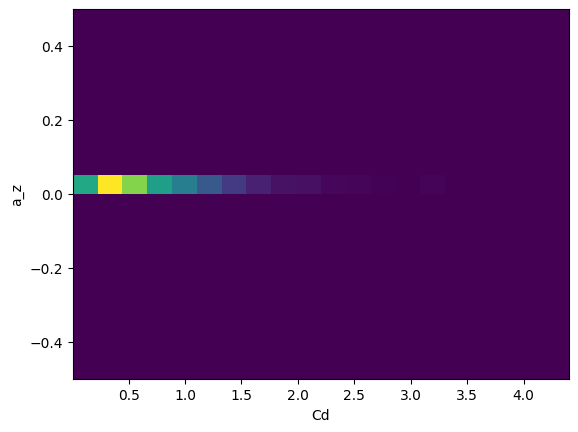

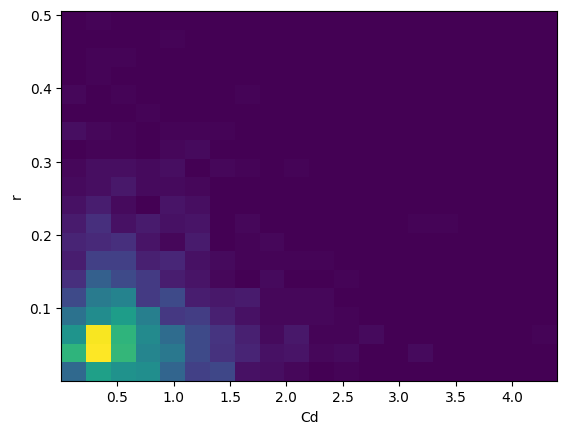

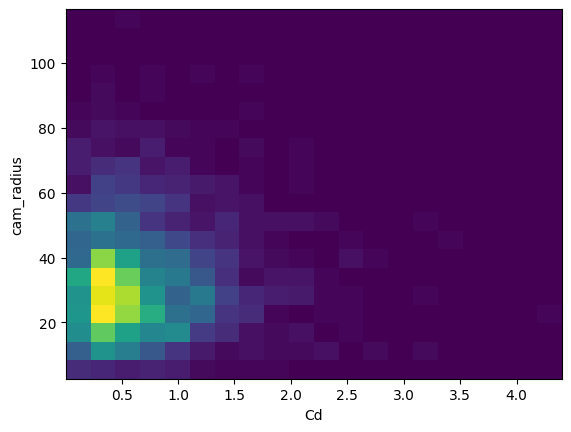

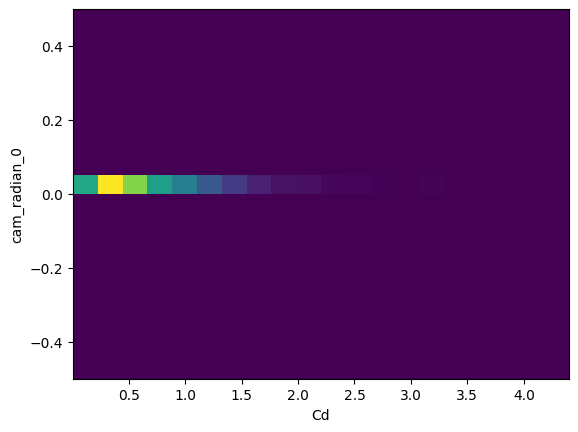

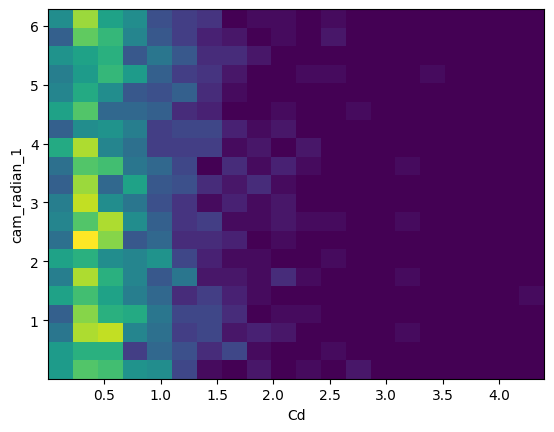

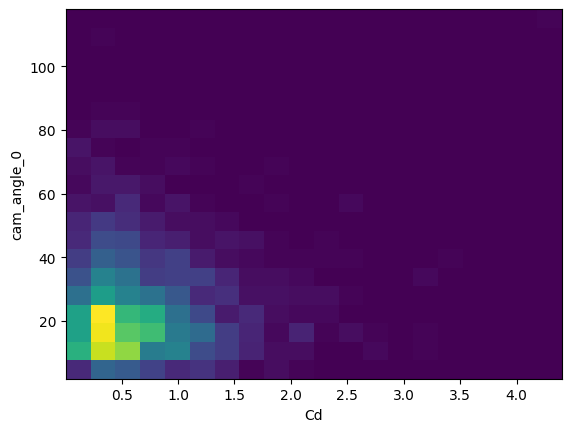

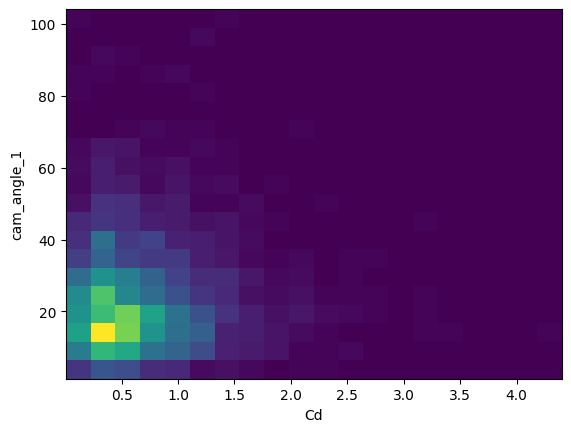

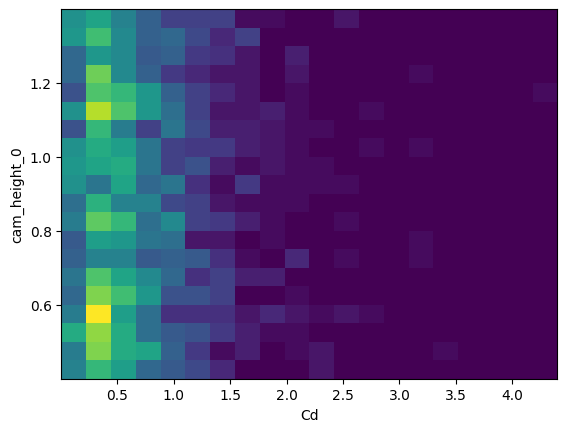

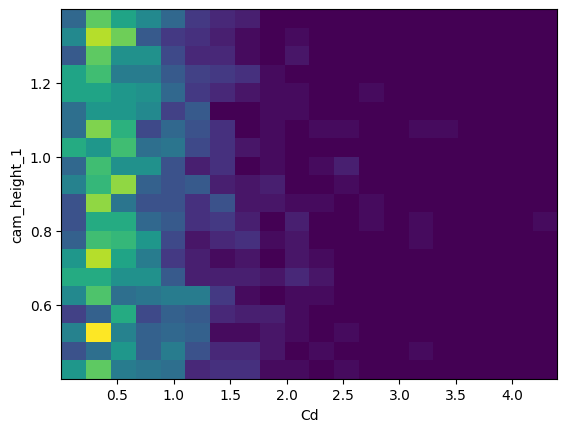

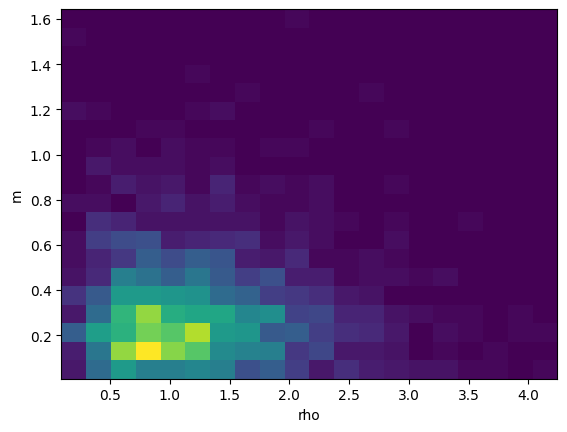

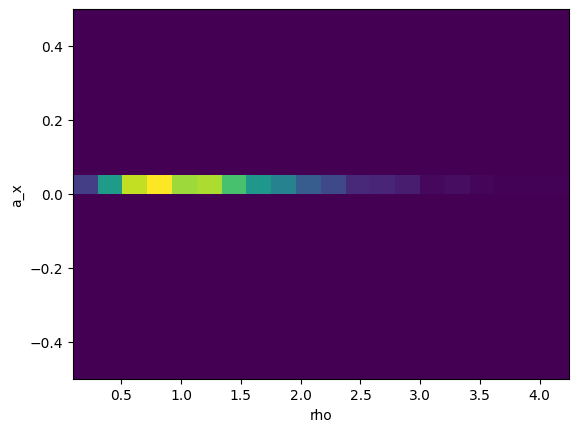

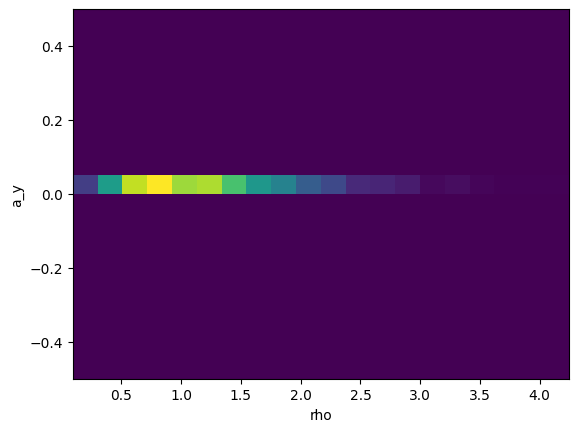

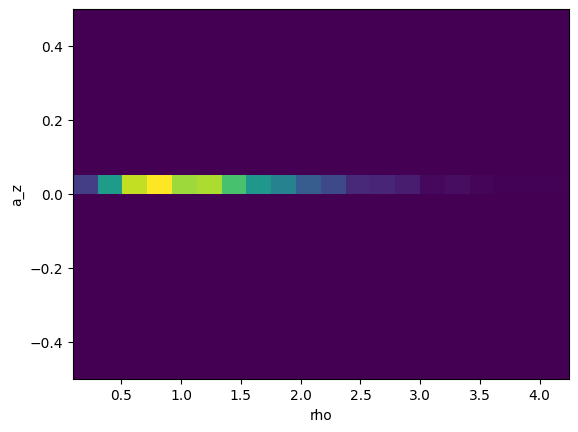

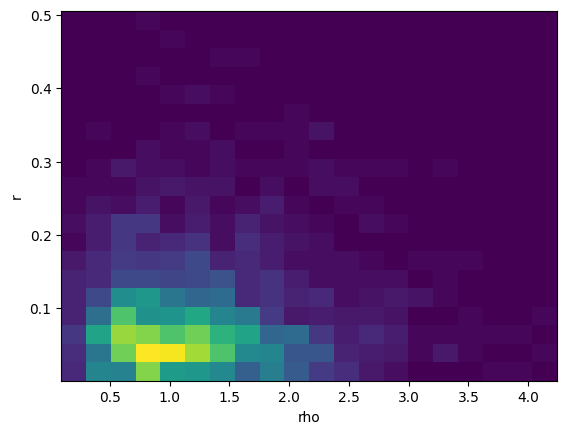

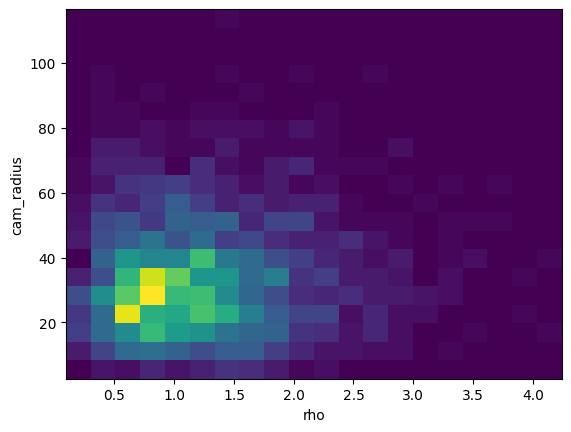

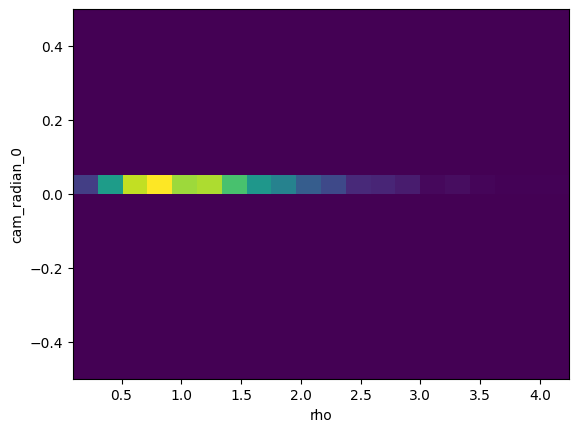

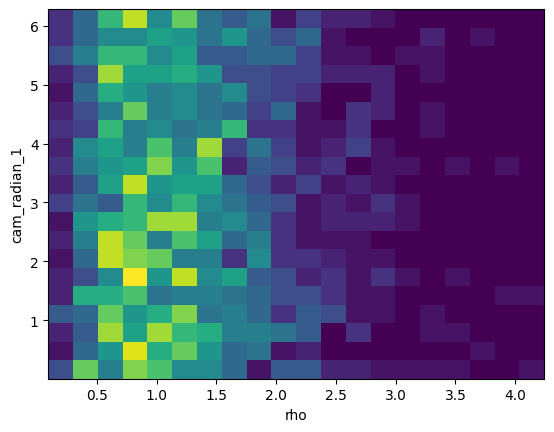

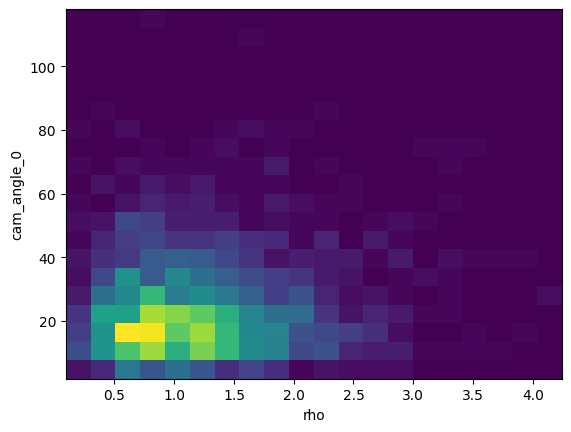

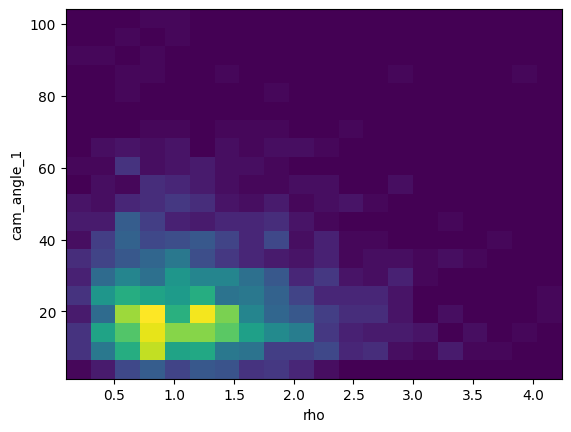

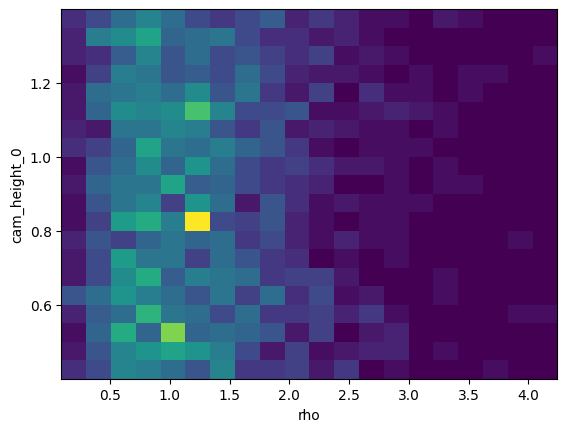

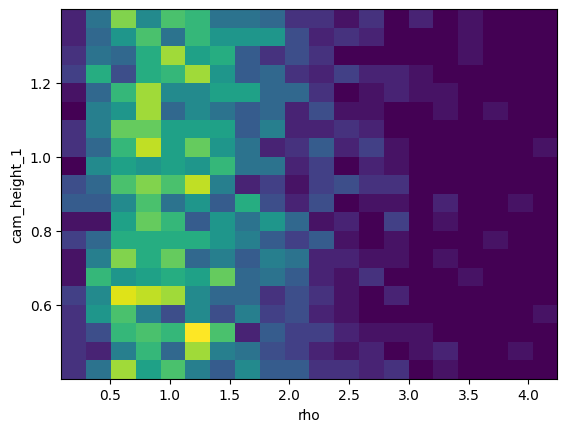

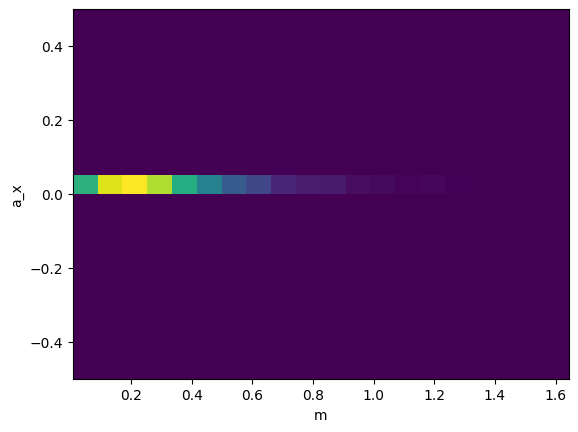

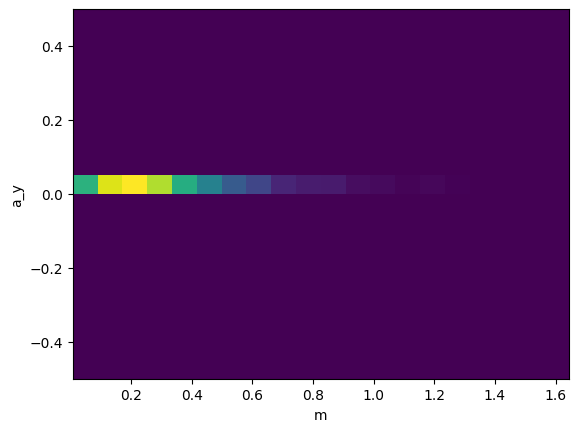

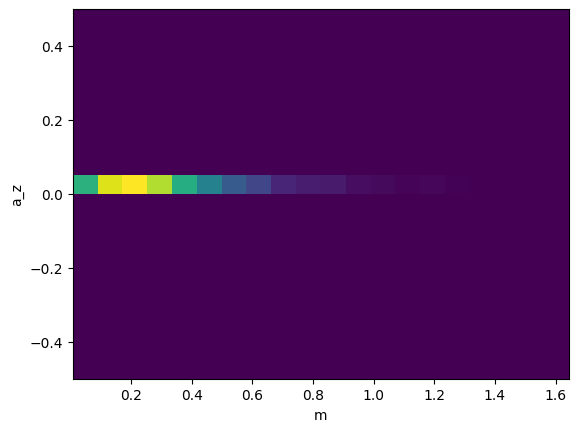

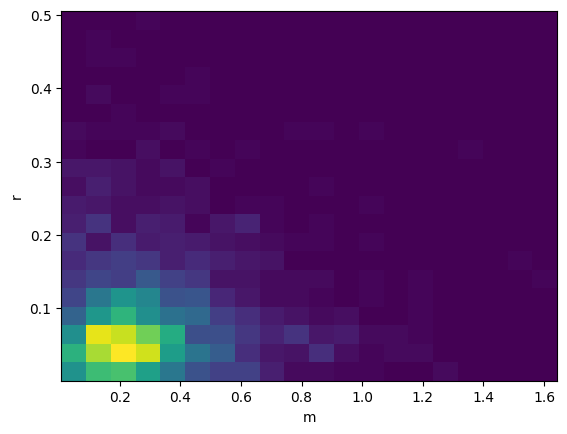

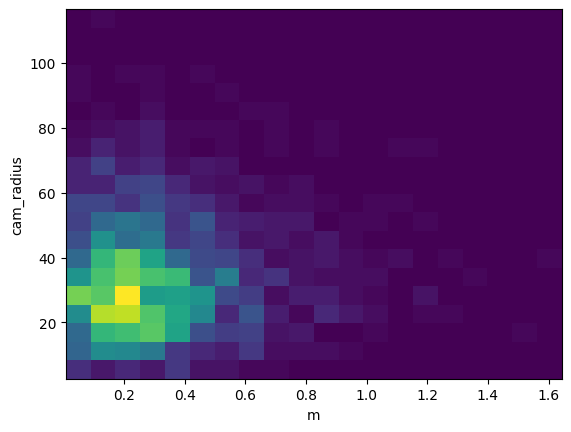

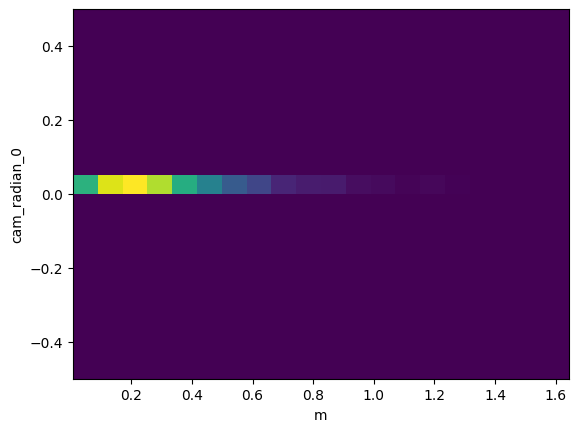

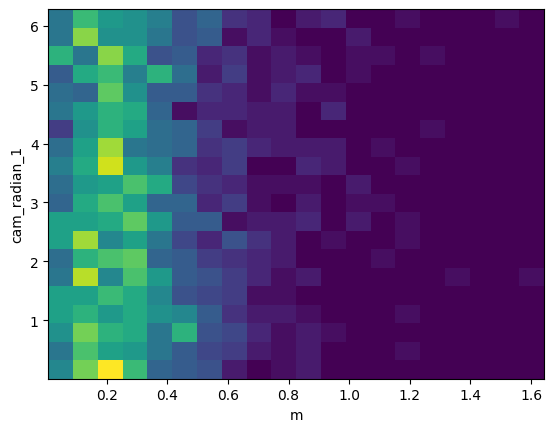

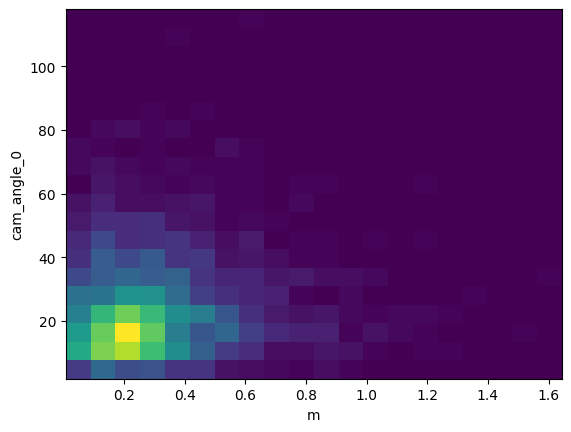

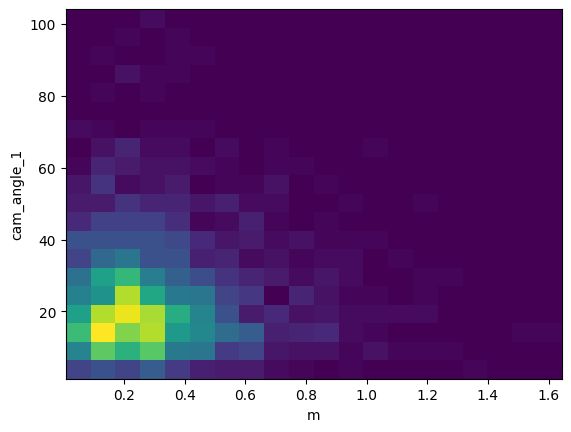

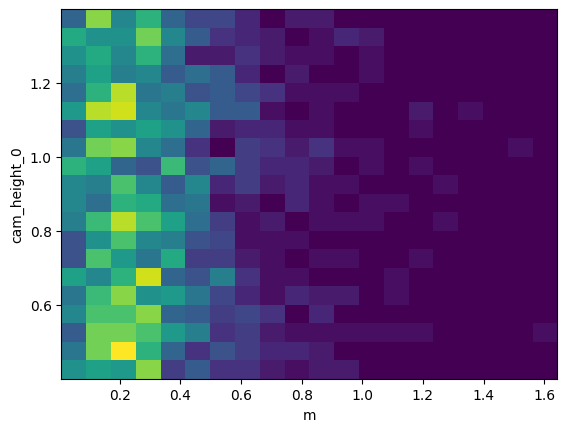

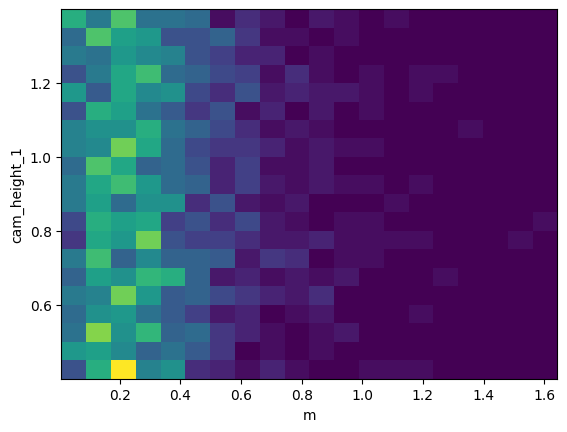

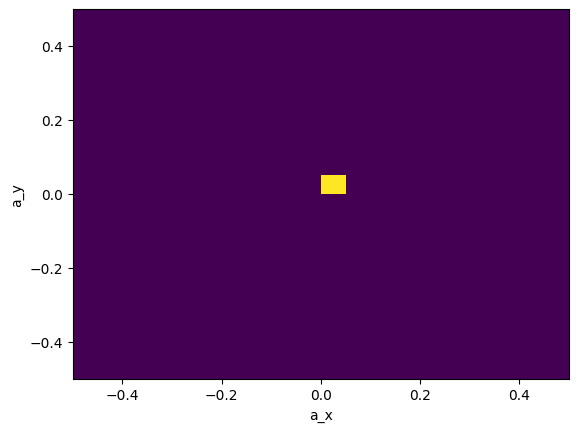

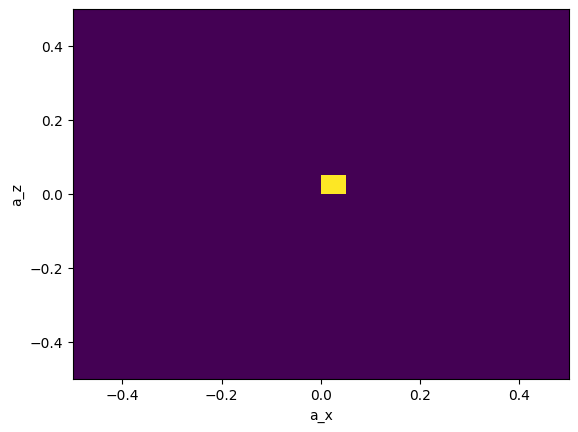

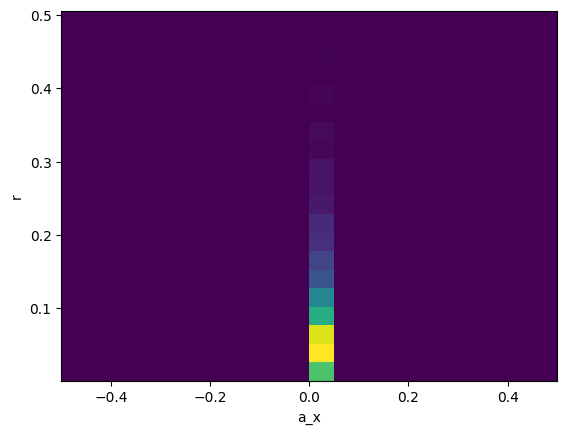

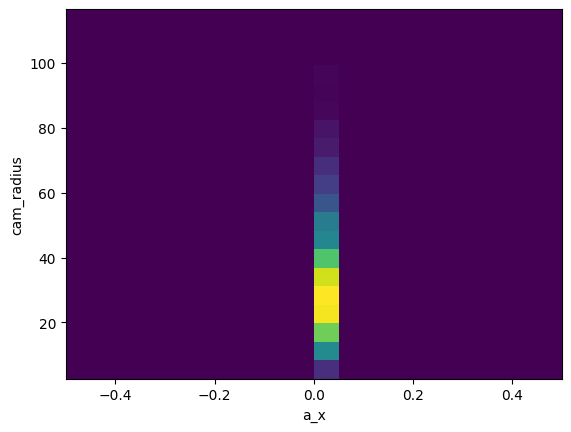

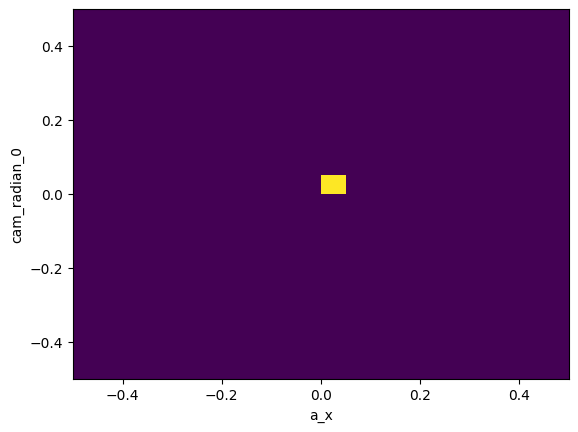

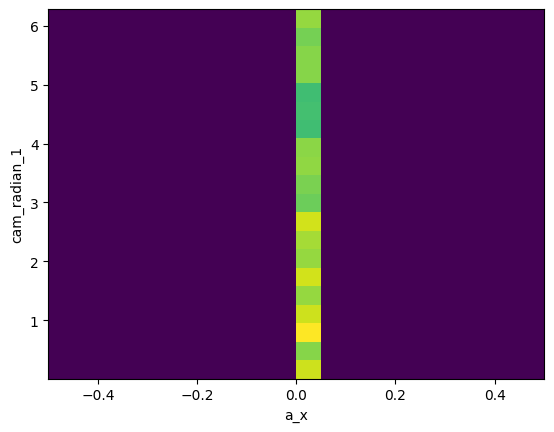

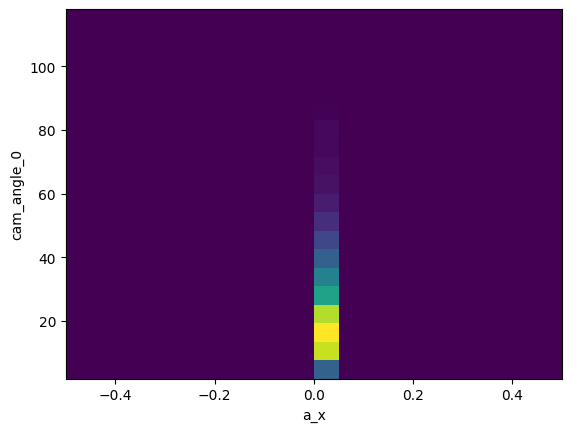

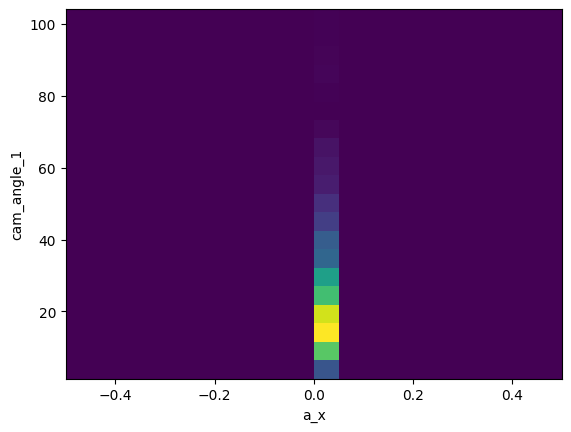

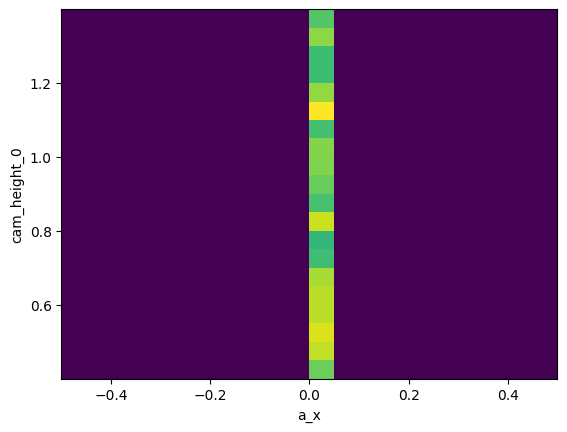

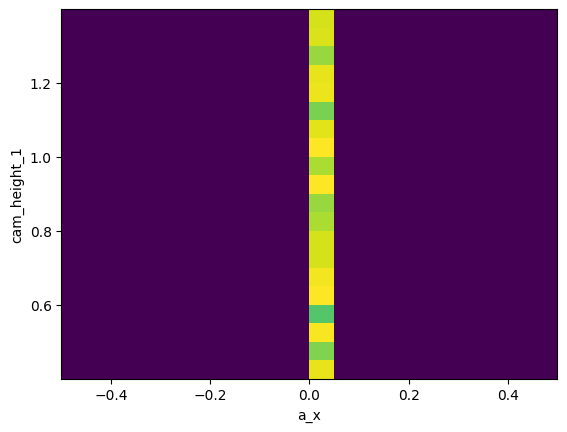

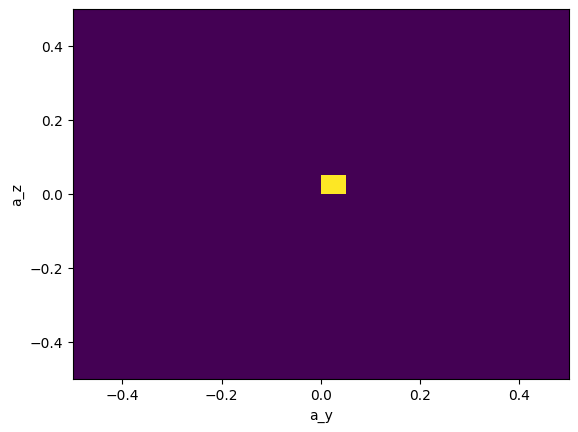

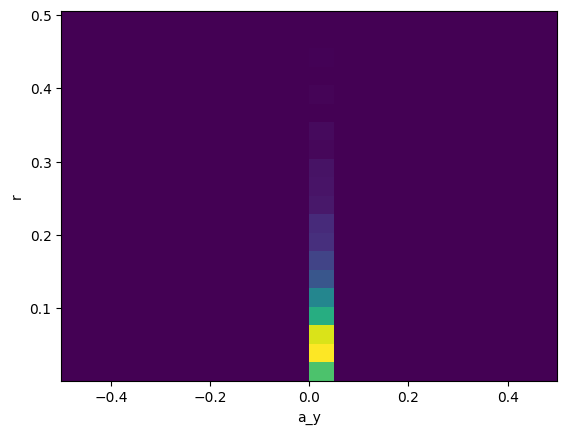

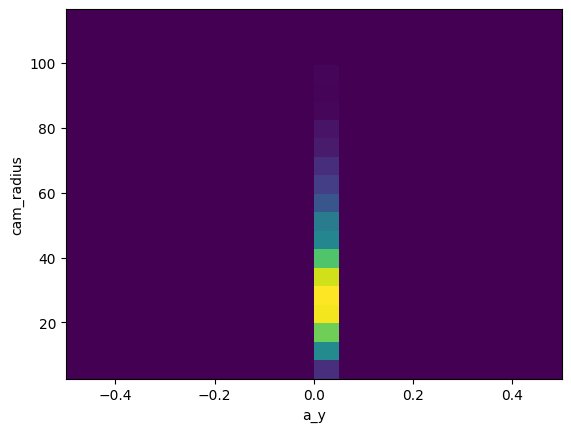

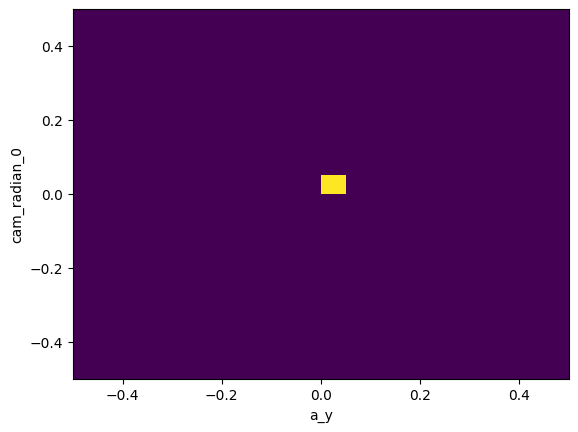

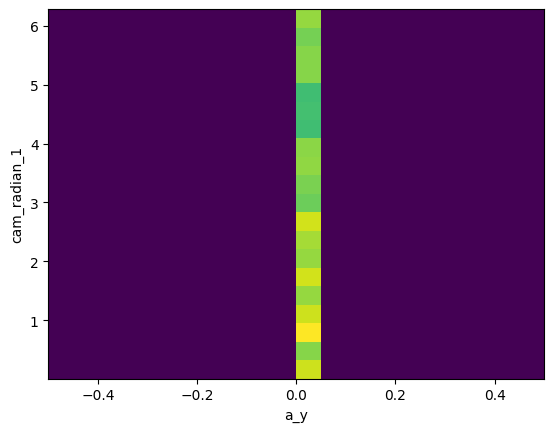

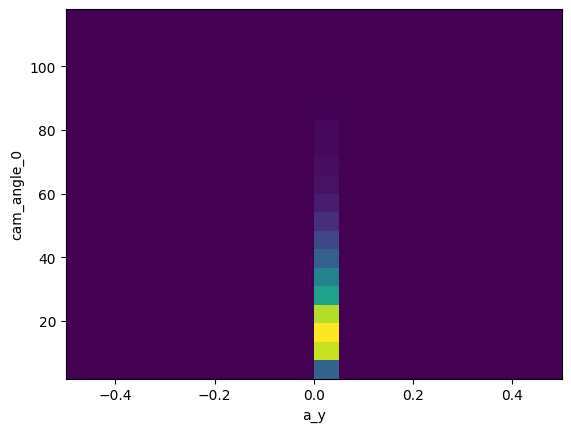

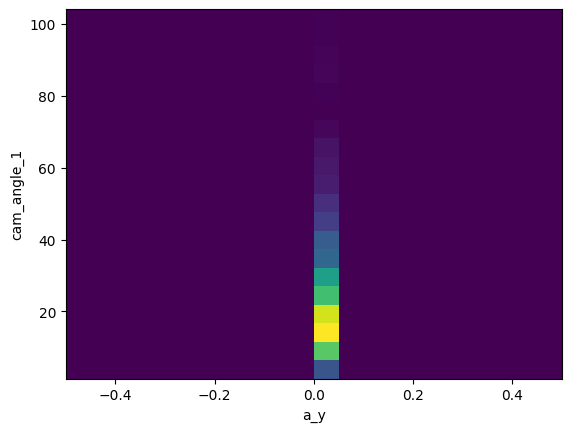

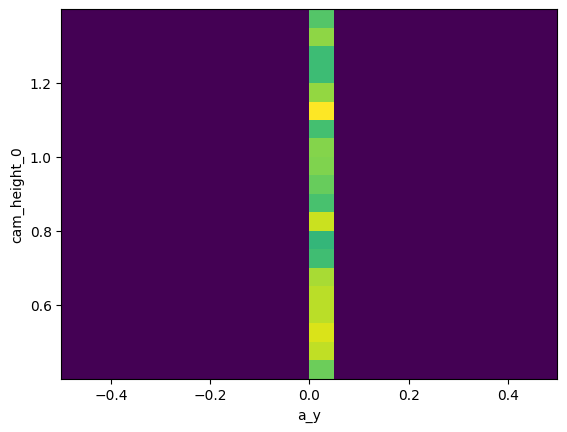

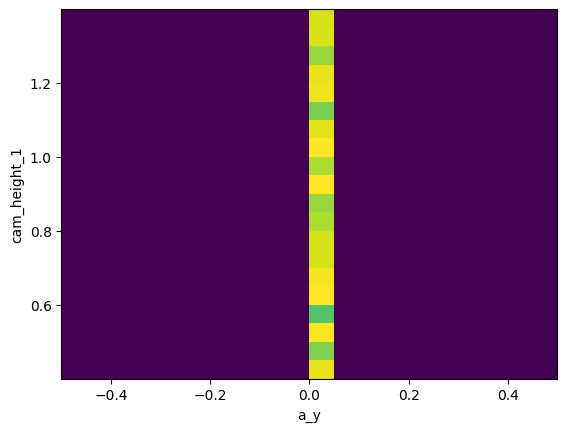

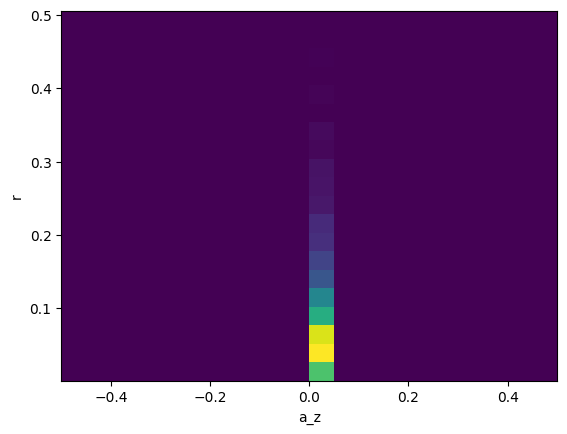

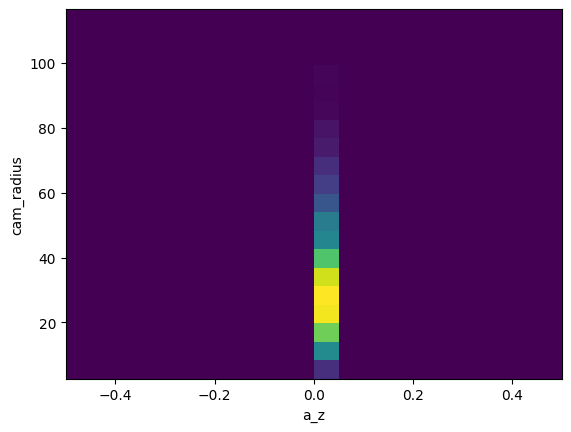

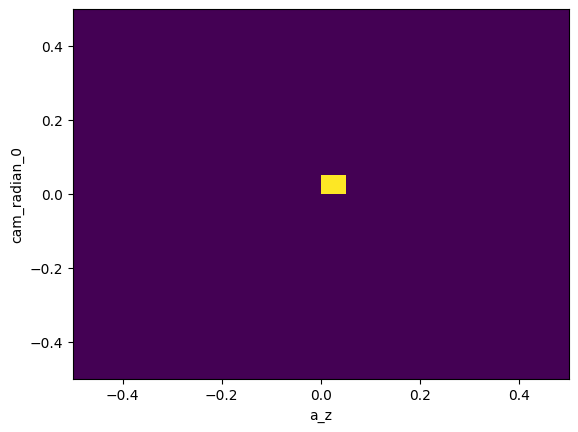

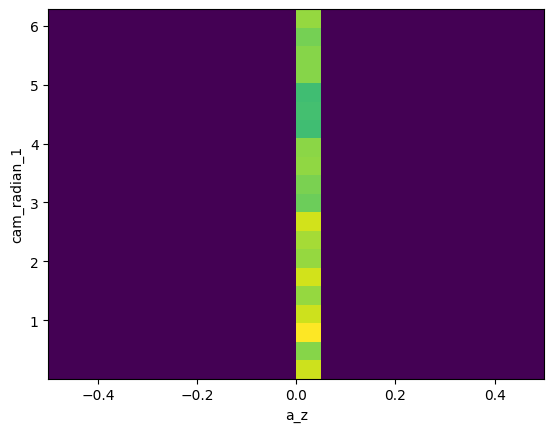

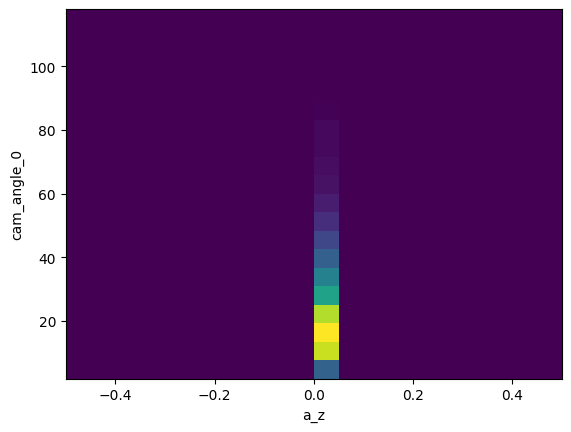

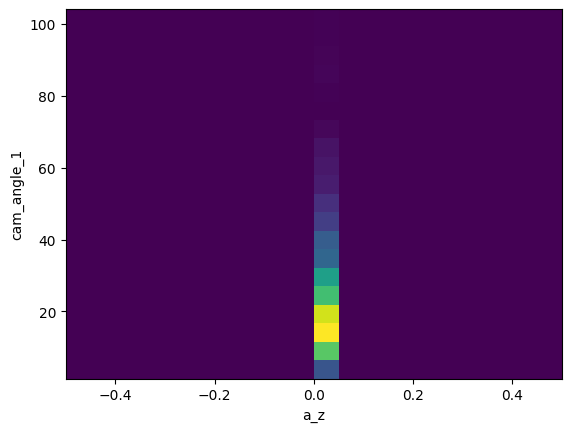

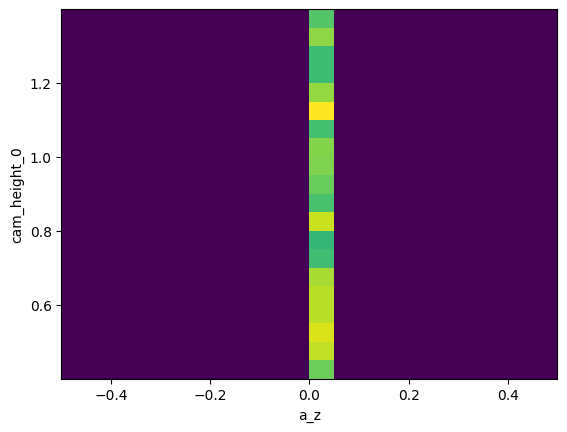

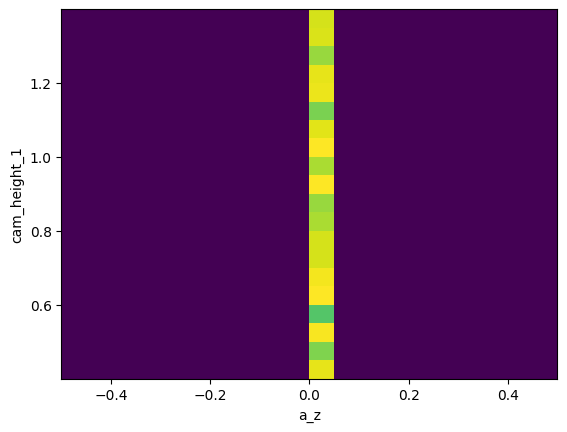

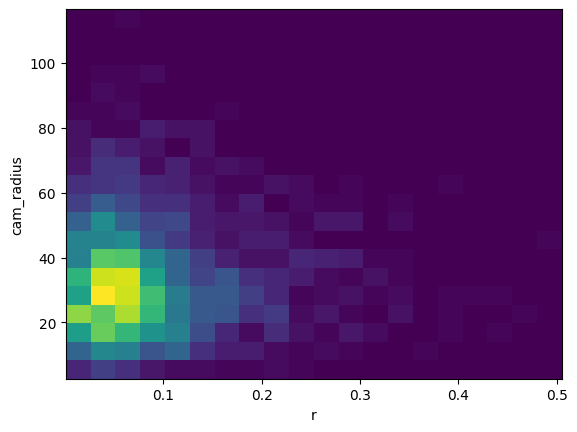

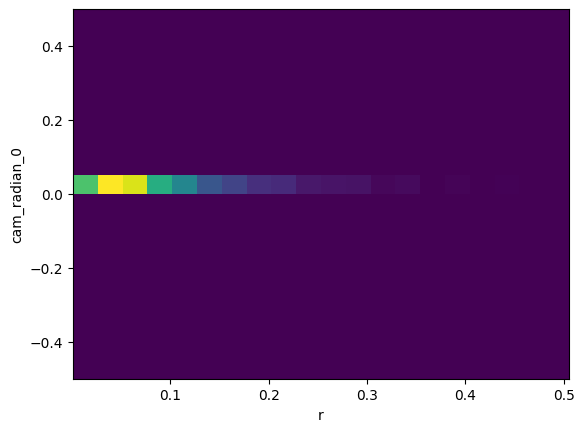

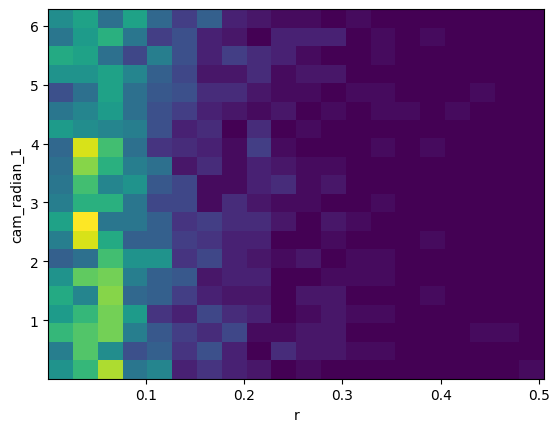

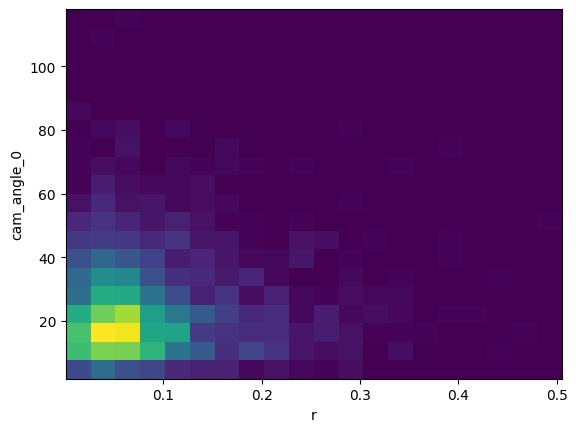

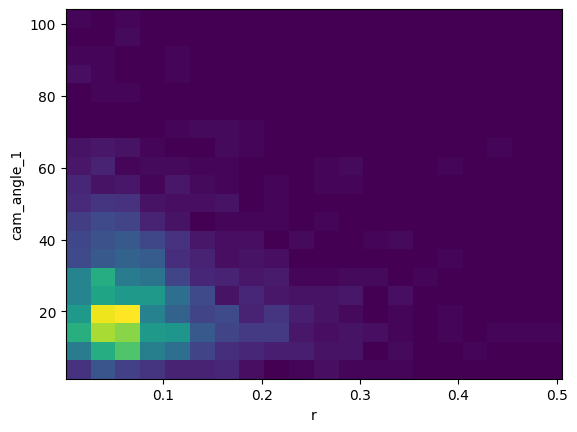

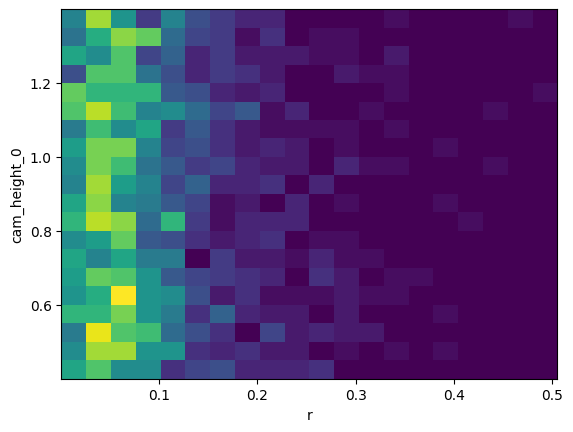

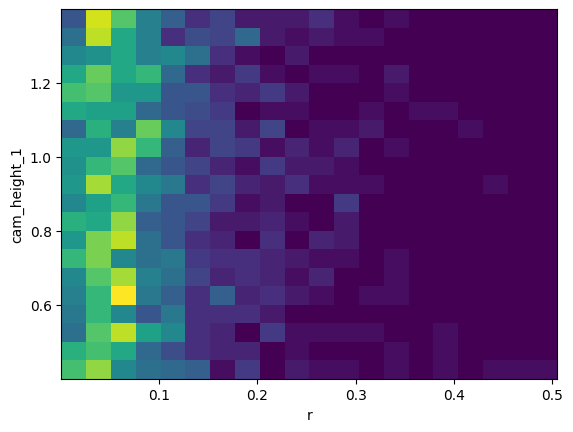

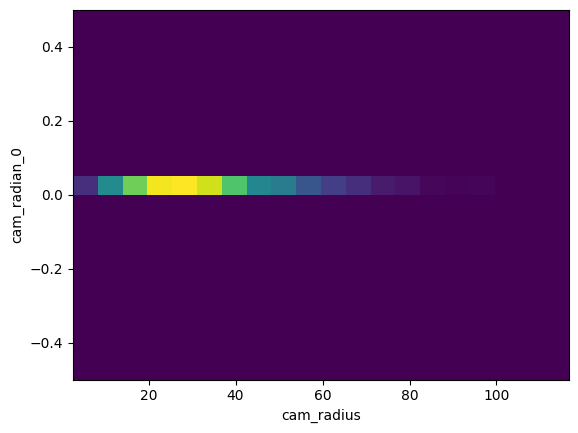

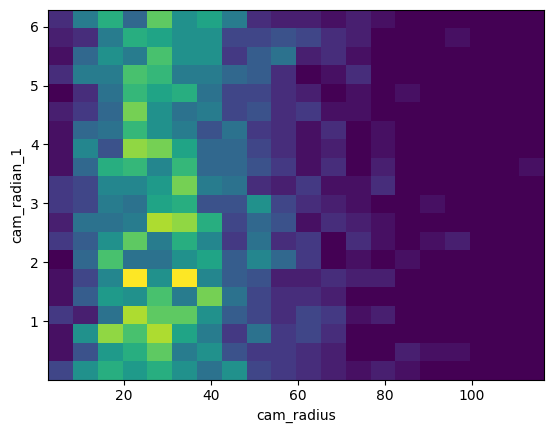

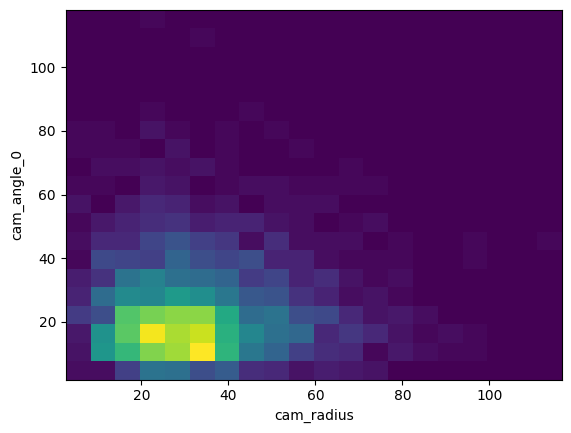

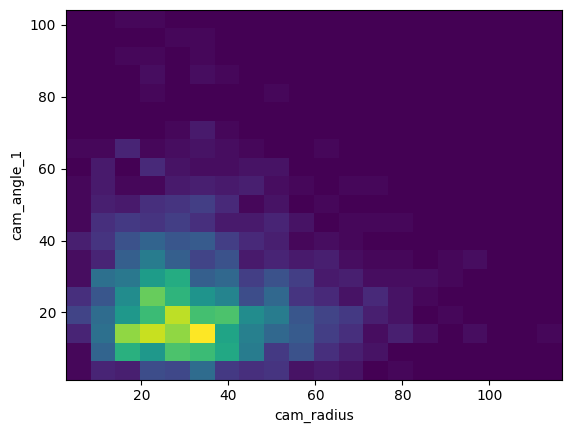

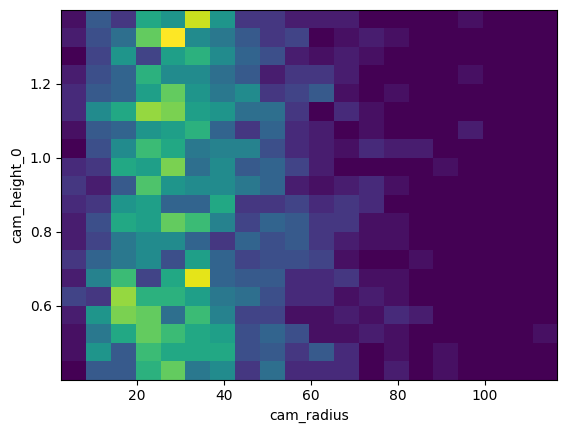

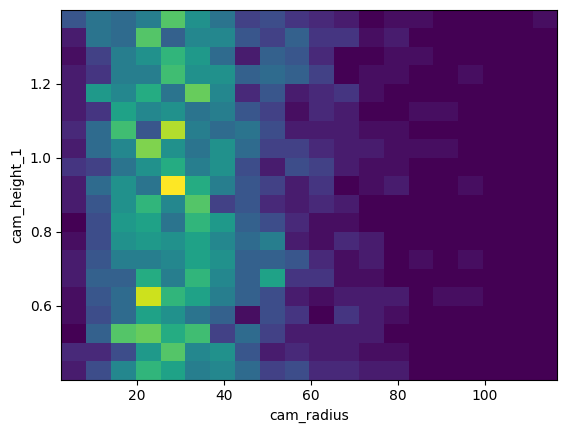

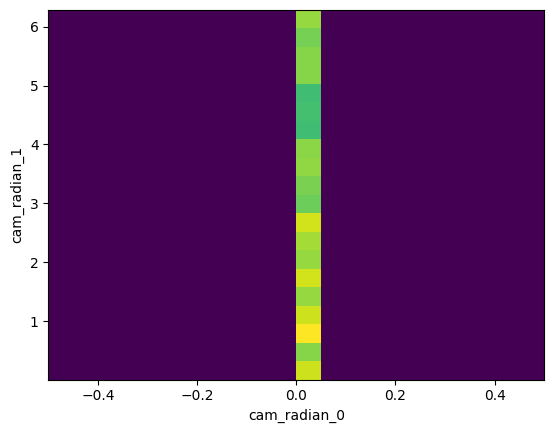

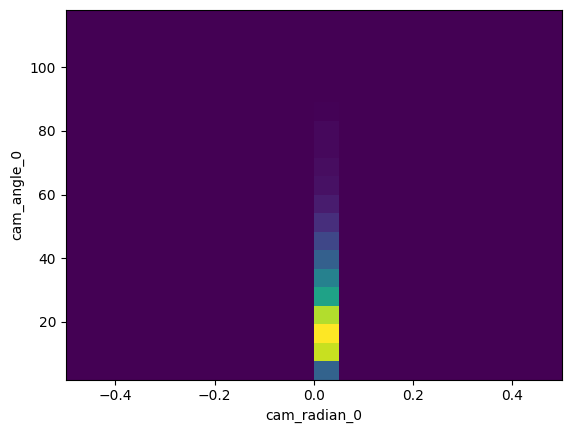

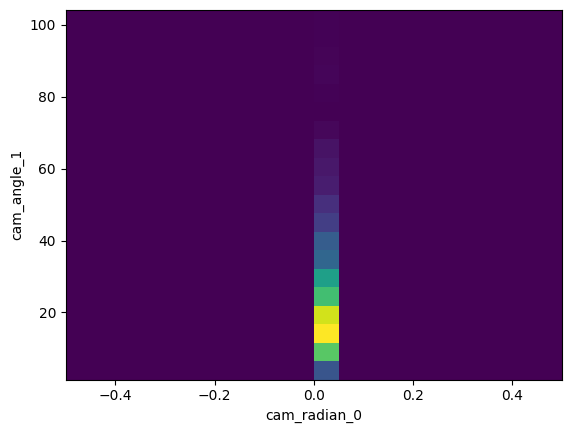

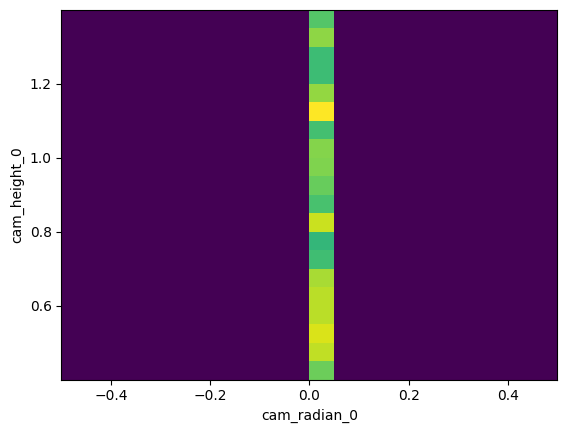

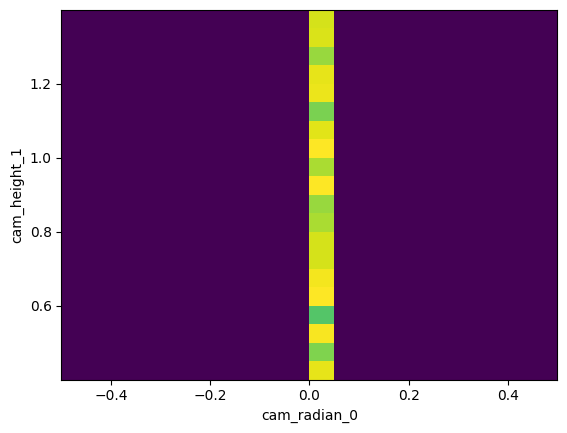

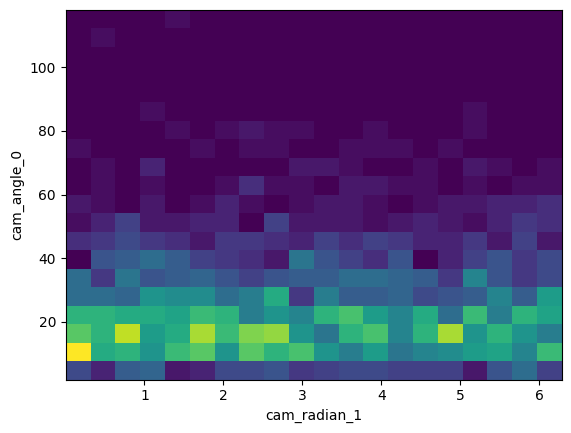

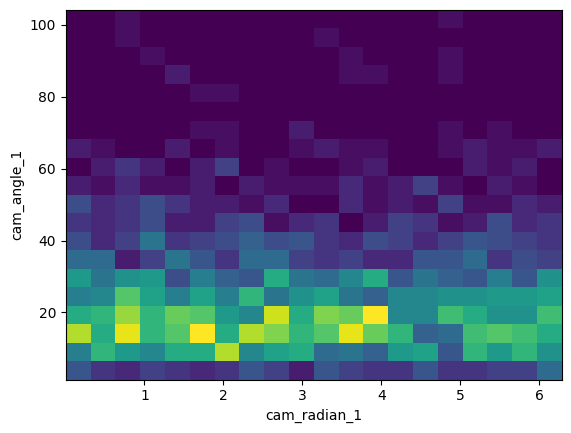

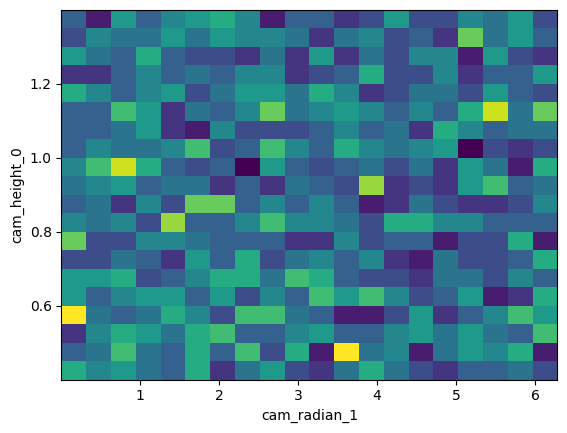

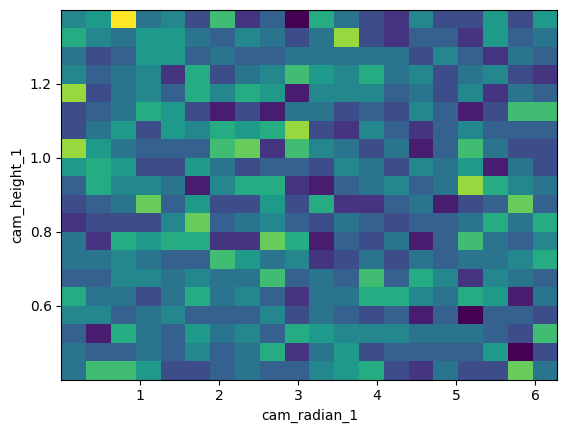

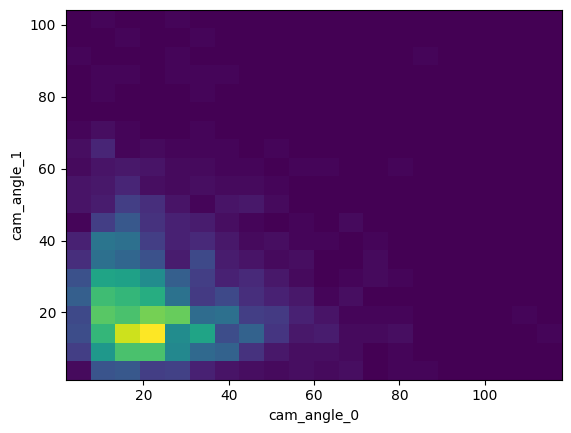

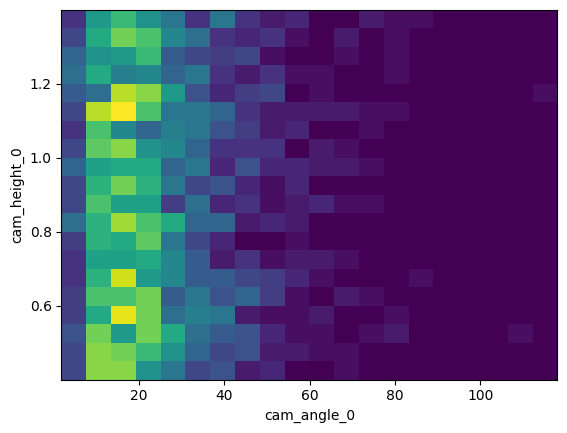

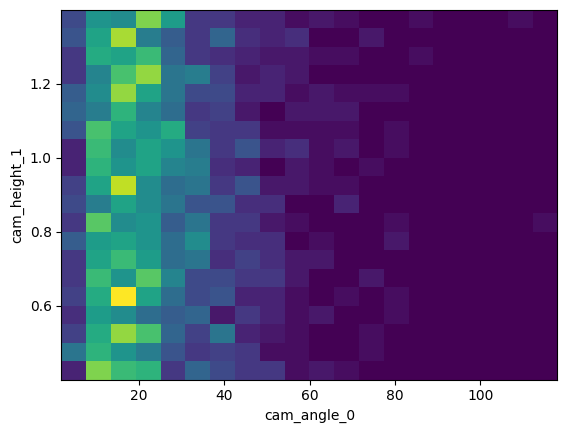

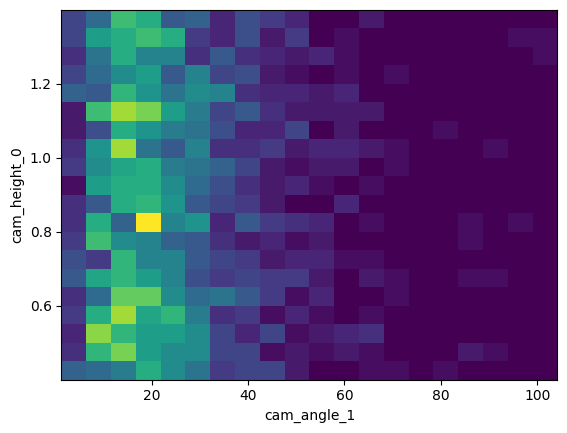

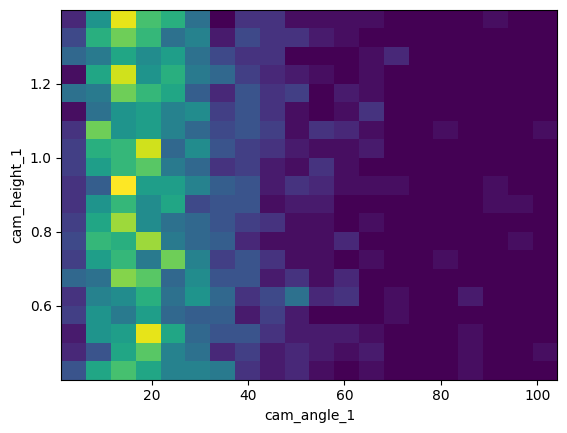

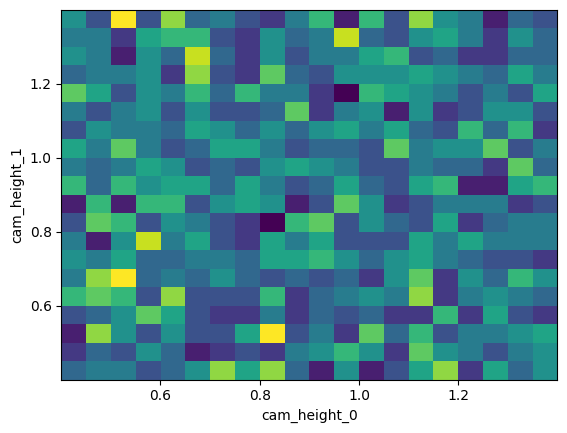

In [11]:
# plot 2d hist of all pairs

for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        plt.hist2d(df.iloc[:, i], df.iloc[:, j], bins=20)
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()

(0.0, 0.12)

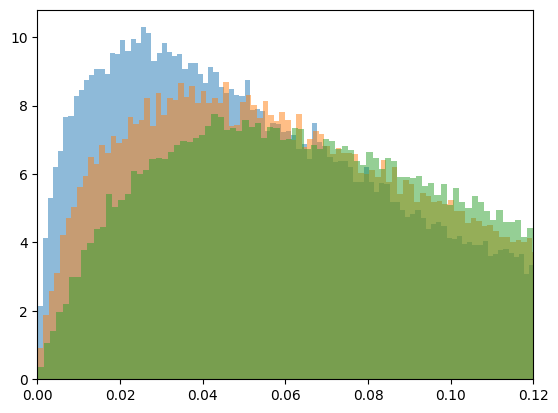

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# test different gamma functions

x = np.random.gamma(1.5, 0.05, 100000)
y = np.random.gamma(1.75, 0.05, 100000)
z = np.random.gamma(2, 0.05, 100000)

plt.hist(x, bins=500, density=True, alpha=0.5);
plt.hist(y, bins=500, density=True, alpha=0.5);
plt.hist(z, bins=500, density=True, alpha=0.5);
plt.xlim(0, 0.12)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
           1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   2.,   1.,   2.,   2.,   1.,   2.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   2.,   2.,   2.,   6.,  11.,  17.,  13.,   8.,
           2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0., 

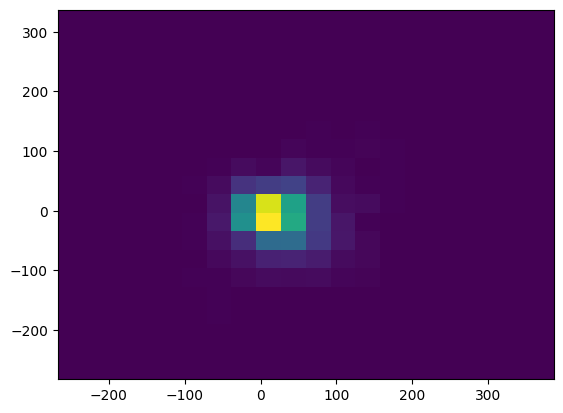

In [4]:
from bcnf.simulation.physics import calculate_point_of_impact
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bcnf.plots.data.data_to_df import data_to_df

df = data_to_df('preliminary_data_4s')

# for each parameter tuple in df, calculate point of impact and plot in a 2d histogram

pois = []

counter = 0

for i in range(df.shape[0]):
    #print(counter)
    counter += 1
    x0_x = df['x0_x'][i]
    x0_y = df['x0_y'][i]
    x0_z = df['x0_z'][i]

    x0 = np.array([x0_x, x0_y, x0_z])

    v0_x = df['v0_x'][i]
    v0_y = df['v0_y'][i]
    v0_z = df['v0_z'][i]

    v0 = np.array([v0_x, v0_y, v0_z])

    w_x = df['w_x'][i]
    w_y = df['w_y'][i]
    w_z = df['w_z'][i]

    w = np.array([w_x, w_y, w_z])

    a_x = df['a_x'][i]
    a_y = df['a_y'][i]
    a_z = df['a_z'][i]

    a = np.array([a_x, a_y, a_z])

    g = df['g'][i]

    g = np.array([0, 0, g])

    rho = df['rho'][i]
    m = df['m'][i]
    b = df['b'][i]
    r = df['r'][i]

    dt = 0.1

    poi = calculate_point_of_impact(x0, v0, g, w, b, m, rho, r, a, dt)

    if poi[0] == 999:
        continue
    else:
        pois.append(poi)
    

    
plt.hist2d([poi[0] for poi in pois], [poi[1] for poi in pois], bins=20)

    


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-100.        ,  -95.91836735,  -91.83673469,  -87.75510204,
         -83.67346939,  -79.59183673,  -75.51020408,  -71.42857143,
         -67.34693878,  -63.26530612,  -59.18367347,  -55.10204082,
         -51.02040816,  -46.93877551,  -42.85714286,  -38.7755102 ,
         -34.69387755,  -30.6122449 ,  -26.53061224,  -22.44897959,
         -18.36734694,  -14.28571429,  -10.20408163,   -6.12244898,
          -2.04081633,    2.04081633,    6.12244898,   10.20408163,
          14.28571429,   18.36734694,   22.44897959,   26.53061224,
          30.6122449 ,   34.69387755,   38.7755102 ,   42.85714286,
          46.93877551,   51.02040816,   55.10204082,   59.18367347,
          63.26530612,   67.34693878,   71.42857143,   75.51020408,
   

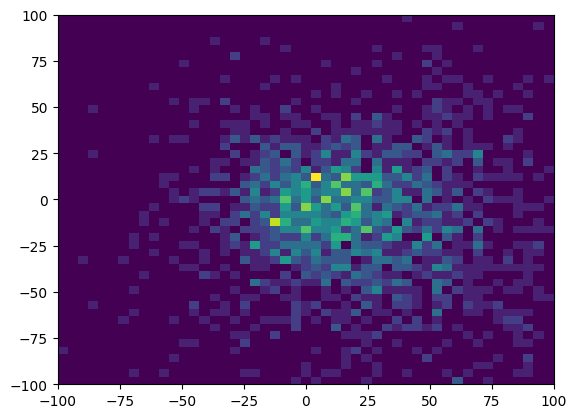

In [7]:
plt.hist2d([poi[0] for poi in pois], [poi[1] for poi in pois], bins=[np.linspace(-100, 100, 50), np.linspace(-100, 100, 50)])